<a href="https://colab.research.google.com/github/omanofx/entregable_1/blob/Proyecto_final_Omar_Fernandez/Proyecto_final_Omar_Fernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alumno: Omar Fernández**

Curso: Data Science

Comisión: 46275

Profesores: Francisco Azzollini / Daniel Galeano

Tutor: Luciano Lisachi

Fecha: Agosto 2023

---





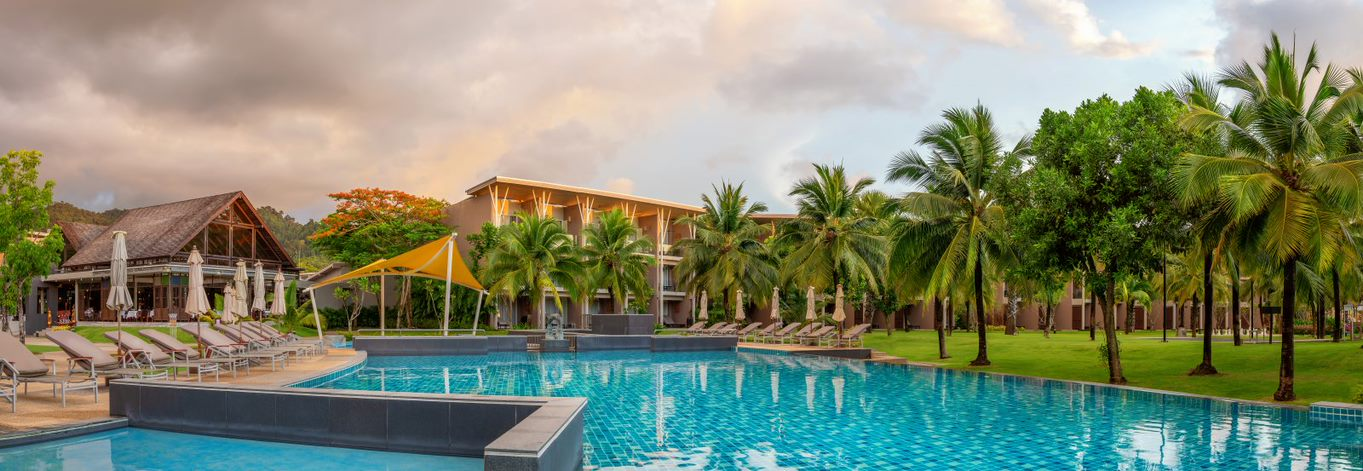

# **Proyecto final: Reservas de hoteles**


---





# Tabla de contenido

1.   Resumen ejecutivo
2.   Introducción
  1.   Objetivo del proyecto
  1.   Stakeholders
  1.   Alcance del proyecto
  1.   Análisis a realizar
  1.   Solución
2.   Contexto análitico
  1.   Requisitos
  1.   El Data set
  2.   Estructura del data set
  1.   Dimensiones de los datos
  2.   Librerías del proyecto
  1.   Configuración
  2.   Funciones propias
1.   Obtención de los datos (data acquisition)
  1.   Github
  2.   Datos externos (API)
  3.   Backup
2.   Depuración de datos (Data wrangling)
  1.   Data set principal (reservas)
  1.   Reducción de características
  1.   Valores duplicados
  1.   Valores erroneos
  1.   Valores NaN
  1.   Transformación de los tipos de datos
  1.   Etiquetado de variables categóricas
  2.   Ingeniería de atributos
  1.   Data set secundario (países)
1.   Análisis exploratorio de datos (EDA)
  1. Reservas confirmadas
  2. Reservas canceladas
  1. Tiempo de demora
  1. Distribución de adultos-mes de reserva
  1. Relación ADR-Mes/Año de arribo
  1. Noches de estadía y servicio de comida
2.   Selección de características
  1.   Matriz de correlación (Pearson)
  2.   Matriz de correlación (Spearman)
  1.   Matriz de correlación (Kendall)
  1.   Forward selection
  2.   Linear regression
  1.   Backward selection
  2.   Stepwise
  1.   PCA
2.   Entrenamiento de modelos
1.   Resultados finales del proyecto
2.   Conclusiones y recomendaciones finales
1.   Referencias
1.   Change log












# Resumen ejecutivo
---




Este documento presenta el tema seleccionado para el proyecto final del autor, Omar Fernández, junto con las hipótesis que se pretenden validar. El proyecto se enfoca en el análisis de reservas de hoteles, abarcando tanto resorts como hoteles de ciudad, realizadas a través de diversas plataformas de reserva electrónica durante el período comprendido entre el 1 de enero de 2015 y el 31 de agosto de 2017. Cada entrada en el conjunto de datos representa una reserva, incluyendo tanto las que se completaron como las que se cancelaron.

Los registros comprenden reservas efectuadas de múltiples maneras, incluyendo reservas directas, en línea y a través de agentes de viajes. Estos registros proporcionan información detallada sobre las condiciones de la habitación, el número de adultos, niños y bebés, el país de origen, la fecha de llegada y la duración de la reserva, entre otros datos. Además, se ofrece información sobre el depósito en caso de cancelación.

Para garantizar la calidad de los datos y eliminar información irrelevante, se lleva a cabo un proceso de limpieza de registros que implica la eliminación de columnas que contienen información innecesaria, como nombres de personas, números de teléfono y números de tarjetas de crédito que se utilizaron para las reservas. Este paso de limpieza permite enfocarse en los aspectos clave del análisis de las reservas de hoteles.

# Introducción

---




* **Contexto comercial**: A través del progreso en las nuevas tecnologías y las refinadas técnicas de análisis de datos, los competidores tienen la capacidad de lanzar campañas de marketing directo dirigidas a nuestros clientes. Esto conlleva el peligro de que las reservas realizadas sean canceladas de manera anticipada, aún en presencia de posibles penalizaciones económicas por dicha cancelación. Para nosotros, implica un doble perjuicio, la perdida de una reserva y a su vez, una habitación disponible sin ocupar, la cual tiene costos fijos de mantemiento.

* **Problema comercial**: ¿Existen patrones particulares en las reservas que puedan ser indicativos de una futura cancelación?

* **Contexto analítico**: Se logró obtener un data set con más de 119.000 registros de reservas/cancelaciones durante el período comprendido entre el 1 de enero de 2015 y el 31 de agosto de 2017, realizadas por más de 50.000 clientes únicos. Los datos estarán etiquetados, es decir, hay una variable que nos indica cuáles reservas fueron canceladas o no. Utilizaremos modelos de agrupamiento para abordar este problema con aprendizaje supervisado.

## Objetivo del proyecto

Lograr predecir cuales reservas se cancelarán y cuales no, para así lograr optimizar la disponibilidad de las habitaciones en los distintos tipos de hoteles analizados, de este modo, las gerencias correspondientes podrán realizar campañas comerciales de acción directa, generar propuestas de mejora y proyectar a futuro mejores ingresos economicos para la compañia.

Esta visión clara sobre qué reservas se cancelarán mejora significativamente la precisión en las proyecciones de ocupación. Además, permite tomar decisiones de negocio respaldadas por datos internos de la organización, en lugar de depender de intuiciones o estadísticas globales generales. Al poner a la venta habitaciones con alta probabilidad de cancelación, se logra maximizar los ingresos de la compañía.

Es relevante destacar que los riesgos se gestionan eficazmente al aprovechar la confiabilidad matemática de estas previsiones para enfocarse en las reservas con mayor probabilidad de cancelación.

## Stakeholders

Este proyecto tiene como principales interesados en el mismo, a las empresas del sector turistico, más precisamente, aquellas que gestiónan la hotelaria, agencias de turismos, plataformas de booking de reservas en hoteles y las camaras que representan a la actividad.

## Alcance del proyecto

Para lograr el exito del proyecto y lograr completar los análisis determinados y el entrenamiento del modelo de machine learning, se contempla el uso de un data set con datos reservas de hoteles contempladas en un periódo de tiempo limitado. Se desconoce la locación de dichos hoteles. Se complementarán los datos, haciendo uso de una API (application programming interface) de la empresa Amadeus, la cual nos permitirá obtener datos adicionales que ayuden a enriquecer los análisis previstos en este documento.


## Suposiciones y limitaciones

Se desconoce la ubicación geográfica de los hoteles y la cantidad de los mismos. Se asume que los montos expresados en la columna 'ADR' están en dólares estadounidenses.

## Análisis a realizar (insights)

Como parte de este proyecto de data science, se realizarán una serie de pruebas y análisis con el fin de poder conocer más en profundidad como se comportan los pasajeros en cuanto a las reservas que realizan.
A continuación se enumeran los puntos de interés que se desean analizar del conjunto de datos:


1.   Establecer cuál es el país con el mayor número de reservas confirmadas, y realizar un ranking con los 10 principales países de origen de las reservas confirmadas.
1.   Relación entre el promedio mensual de cancelaciones y el mes de reserva.
1.   Relación entre el tiempo de demora y la cantidad de reservas confirmadas.
1.   Poder establecer cuál es la distribución entre la cantidad total de adultos por mes de reserva.
1.   Buscar la relación de las tarifas promedio con el mes y año de arribo al hotel.
1.   Determinar el tipo de servicio de comida contratado y las noches de estadía por tipo de hotel.
1.   Comprobar como se componen las reservas, según el tipo de hotel y los pasajeros que integran la misma.


## Solución

Los algoritmos basados en Ciencia de Datos brindan una herramienta fundamental para la Analítica Predictiva. Gracias a esta tecnología, la empresa puede anticipar con precisión las cancelaciones y ajustar su oferta en el momento adecuado, evitando así cualquier riesgo de **Overbooking**.


Se plantea realizar el análisis de los mejores algoritmos de 'machine learning' para determinar y aplicar el que mejor se adapte a nuestra pregunta inicial.

La variable objetivo es un booleano, es decir, tiene solo dos posibles valores (verdadero/falso, sí/no, 0/1), esto se trata de un problema de **clasificación binaria**. Hay varios algoritmos de machine learning que son adecuados para este tipo de problema.


Estos son algunos de los modelos que se implementarán con el data set propuesto:


1. **Regresión Logística**: Este modelo es especialmente adecuado para problemas de clasificación binaria, donde la variable objetivo es un booleano. La regresión logística estima la probabilidad de que un ejemplo pertenezca a una clase particular (verdadero o falso) dadas las características de entrada.
2. **Support Vector Machines (SVM)**: Las SVM son otro modelo popular para la clasificación binaria. Buscan encontrar el hiperplano que mejor separa las clases en el espacio de características, maximizando el margen entre las clases.
3. **Árboles de Decisión**: Los árboles de decisión son modelos versátiles que pueden manejar tanto problemas de clasificación como de regresión. Para la clasificación binaria, un árbol de decisión divide el espacio de características en regiones que corresponden a diferentes clases.
4. **Random Forests**: Este es un ensemble de árboles de decisión donde múltiples árboles se entrenan en diferentes subconjuntos de datos y características. Luego, las predicciones de todos los árboles se promedian para producir una predicción final.
5. **Gradient Boosting Machines (GBM)**: Similar a Random Forests, GBM es otro método de ensemble que combina múltiples modelos de aprendizaje débiles para formar un modelo más fuerte. A menudo, se utiliza el algoritmo de boosting para mejorar gradualmente el rendimiento del modelo.
6. **Redes Neuronales Artificiales (ANN)**: Las redes neuronales son modelos muy potentes que pueden manejar una variedad de problemas, incluidos los de clasificación binaria. Con suficientes datos y capacidad de computación, las redes neuronales pueden aprender patrones complejos en los datos.

La elección del modelo dependerá de varios factores, como la cantidad y la calidad de los datos, la complejidad del problema, el tiempo de entrenamiento y las restricciones computacionales.

Para probar varios modelos y evaluar su rendimiento, se utilizan técnicas como la validación cruzada y las curvas de aprendizaje para seleccionar el modelo más adecuado a la problematica dada.

# **Contexto analítico**


---



### Requisitos

Este proyecto de data science fue desarrollado utilizando el lenguaje de programación Python. El mismo se ejecuta en Google Colab (es la implementación de Jupyter Notebook de Google) con el backend de Google Compute Engine en Python 3.

Las principales bibliotecas utilizadas son: pandas, numpy, skikit-learn, matplotlib, seaborn, plotly, squarify, statsmodels, xgboost, mlxtend y requests .

### El Data set

Los datos provienen originalmente del artículo "Conjuntos de datos de demanda de reservas de hoteles, escrito por Nuno Antonio, Ana Almeida y Luis Nunes para Data in Brief, volumen 22, febrero de 2019".

Origen de los datos: https://www.kaggle.com/datasets/mojtaba142/hotel-booking (25.11 MB)

### Estructura del data set

A continuación se muestra una breve descripción de cada columna:

1.   **hotel**: (object) tipo de hotel (resort o city hotel).
2.   **is_canceled**: (int64) 0/1 si es cancelación.
3.   **lead_time**: (int64) número de días que transcurrieron entre la fecha de entrada de la reserva en el sistema y la fecha de llegada al hotel.
4.   **arrival_date_year**: (int64) año de arribo al hotel.
5.   **arrival_date_month**: (object) mes de arribo al hotel.
6.   **arrival_date_week_number**: (int64) número de semana de arrribo al hotel.
7.   **arrival_date_day_of_month**: (int64) día del mes en arribar al hotel.
8.   **stays_in_weekend_nights**: (int64) noches en fin de semana.
9.   **stays_in_week_nights**: (int64) noches en semana.
10.  **adults**: (int64) total de adultos que componen la reserva.
11.  **children**: (float64) total de menores que componen la reserva.
12.  **babies**: (int64) total de bebes que componen la reserva.
13.  **meal**: (object) tipo de servicio de comida contratado.
14.  **country**: (object) país de origen de la reserva.
15.  **market_segment**: (object) segmento de mercado al que pertenece la reserva.
16.  **distribution_channel**: (object) canal de distribución por donde se efectuó la reserva.
17.  **is_repeated_guest**: (int64) cliente repetido.
18.  **previous_cancellations**: (int64) cancelaciones previas.
19.  **previous_bookings_not_canceled**: (int64) reservas previas no canceladas.
20.  **reserved_room_type**: (object) tipo de habitación solicitada.
21.  **assigned_room_type**: (object) tipo de habitación asignada.
22.  **booking_changes**: (int64) cambios en la reserva
23.  **deposit_type**: (object) tipo de deposito.
24.  **agent**: (float64) agencia que realizó la reserva.
25.  **company**: (float64) compañia que contrato la reserva.
26.  **days_in_waiting_list**: (int64) días en lista de espera
27.  **customer_type**: (object) tipo de cliente.
28.  **adr**: (float64) tarifa diaria promedio definida dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estadía.
29.  **required_car_parking_spaces**: (int64) cantidad de espacios de estacionamiento requeridos.
30.  **total_of_special_requests**: (int64) número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)
31.  **reservation_status**: (object) estado de la reserva.
32.  **reservation_status_date**: (object) fecha del ultimo cambio en la reserva.
33.  **name**: (object) nombre de la persona que realizó la reserva.
34.  **email**: (object) email de la persona que realizó la reserva.
35.  **phone-number**: (object) telefono de la persona que realizó la reserva.
36.  **credit_card**: (object) tarjeta de credito de la persona que realizó la reserva.


**Nota**: Los valores expresados en la característica 'ADR' se presuponen que son dólares americanos, siendo esta la moneda comunmente utilizada para turismo internacional.

### Dimensiones de los datos

Posibles valores.

**Nota**: TA significa "agente de viajes" y TO "operador de turísmo"

* **is_canceled**:
  * 0 (no es cancelación)
  * 1 (es cancelación)

* **deposit_type**:
  *   No Deposit (sin depósito)
  *   Non Refund (No Reembolsable)
  *   Refundable (reembolsable)
  

* **reservation_status**:

  * Check-Out (verificado)
  * Canceled (cancelado)
  * No-Show (no mostrar)


* **customer_type**:
  * Transient (transitorio)
  * Contract (contrato)
  * Transient-Party (fiesta transitoria)
  * Group (grupo)

* **meal**:
  * BB (Cama y desayuno)
  * FB (Pensión completa)
  * HB (Media pensión)
  * SC (Sin servicio de comidas)
  * Undefined (Indefinido)

* **market_segment**:
  * Direct (directo)
  * Corporate (corporativo)
  * TA/TO (TA/TO)
  * Undefined (indefinido)
  * GDS (GDS)

* **market_segment**:
  * Direct (directo)
  * Corporate (corporativo)
  * Online TA (TA on-line)
  * Offline TA/TO (TA/TO fuera de línea)
  * Complementary (complementario)
  * Groups (grupos)
  * Aviation (aviación)
  * Undefined (indefinido)


### Librerías utilizadas


Instalación de librerías necesarias.

In [1]:
!pip install squarify

Agrupamos todas las libererías utilizadas durante el análisis y procesamiento del data set.

In [2]:
# Visualización de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

# Manipulación y análisis de datos
import numpy as np
import pandas as pd

# Otros
import datetime
import pytz
import requests
import gc
import warnings

from datetime import datetime, timedelta
from requests.exceptions import HTTPError

# Configuración adicional
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# Machine learning y estadísticas
import statsmodels.api as sm
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from xgboost.sklearn import XGBClassifier
from mlxtend.plotting import plot_decision_regions

from sklearn import neighbors, metrics
# sklearn.neighbors contiene implementaciones de algoritmos de vecinos más cercanos (k-NN).
# sklearn.metrics proporciona diversas métricas para evaluar modelos de aprendizaje automático.

from sklearn.decomposition import PCA
# sklearn.decomposition contiene implementaciones de técnicas de reducción de dimensionalidad,
# y PCA (Análisis de Componentes Principales) es una de ellas.

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
# sklearn.ensemble contiene implementaciones de algoritmos de ensamble,
# como RandomForestClassifier y RandomForestRegressor, que utilizan múltiples modelos base para mejorar la predicción.
# GradientBoostingClassifier implementa el algoritmo de aumento de gradiente.

from sklearn.feature_selection import SelectKBest
# sklearn.feature_selection proporciona herramientas para la selección de características,
# y SelectKBest es una técnica que selecciona las mejores características basándose en estadísticas univariadas.

from sklearn.impute import SimpleImputer
# sklearn.impute ofrece herramientas para el manejo de valores perdidos (imputación) en los datos,
# y SimpleImputer es una clase que se utiliza para rellenar valores faltantes de manera simple.

from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
# sklearn.linear_model contiene implementaciones de modelos lineales,
# como LogisticRegression para clasificación y LinearRegression para regresión lineal.
# SGDClassifier es el clasificador de descenso de gradiente estocástico.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
# sklearn.metrics proporciona varias métricas para evaluar el rendimiento de los modelos,
# como accuracy_score para clasificación, confusion_matrix para matrices de confusión,
# classification_report para informes detallados, mean_squared_error para regresión y r2_score para la bondad de ajuste.

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# sklearn.model_selection ofrece herramientas para la selección y evaluación de modelos,
# como train_test_split para dividir conjuntos de datos, KFold para validación cruzada,
# cross_val_score para puntuaciones de validación cruzada y GridSearchCV para búsqueda de hiperparámetros.

from sklearn.naive_bayes import MultinomialNB, GaussianNB
# sklearn.naive_bayes contiene implementaciones de clasificadores ingenuos de Bayes,
# como MultinomialNB para datos discretos y GaussianNB para datos continuos.

from sklearn.neighbors import KNeighborsClassifier
# sklearn.neighbors contiene implementaciones del clasificador de vecinos más cercanos (k-NN).

from sklearn.neural_network import MLPClassifier
# sklearn.neural_network contiene implementaciones de redes neuronales, y MLPClassifier es
# un clasificador basado en perceptrones multicapa (MLP).

from sklearn.preprocessing import LabelEncoder, StandardScaler
# sklearn.preprocessing proporciona herramientas para el preprocesamiento de datos,
# como LabelEncoder para codificación de etiquetas y StandardScaler para estandarización de características.

from sklearn.tree import DecisionTreeClassifier
# sklearn.tree contiene implementaciones de árboles de decisión, y DecisionTreeClassifier es
# un clasificador basado en árboles de decisión.

from sklearn.svm import SVC
# sklearn.svm contiene implementaciones de máquinas de soporte vectorial (SVM),
# y SVC (Support Vector Classification) es una implementación para problemas de clasificación con SVM.

### Configuración

Configuraciones que se utilizan durante el proyecto en forma general.

In [175]:
'''
# Configuración genérica para los gráficos
configuracion_graficos = {
    'figure.figsize': (9, 5),   # Tamaño de la figura (ancho, alto)
    'axes.titlesize': 18,       # Tamaño de la fuente del título
    'axes.labelsize': 14,       # Tamaño de la fuente de las etiquetas de los ejes
    'xtick.labelsize': 12,      # Tamaño de la fuente de las etiquetas del eje x
    'ytick.labelsize': 12,      # Tamaño de la fuente de las etiquetas del eje y
    'legend.fontsize': 12,      # Tamaño de la fuente de la leyenda
    'lines.linewidth': 2,       # Grosor de las líneas
    'grid.linestyle': '--',     # Estilo de las líneas de la cuadrícula
    'grid.alpha': 0.5,          # Transparencia de la cuadrícula
}
'''

"\n# Configuración genérica para los gráficos\nconfiguracion_graficos = {\n    'figure.figsize': (9, 5),   # Tamaño de la figura (ancho, alto)\n    'axes.titlesize': 18,       # Tamaño de la fuente del título\n    'axes.labelsize': 14,       # Tamaño de la fuente de las etiquetas de los ejes\n    'xtick.labelsize': 12,      # Tamaño de la fuente de las etiquetas del eje x\n    'ytick.labelsize': 12,      # Tamaño de la fuente de las etiquetas del eje y\n    'legend.fontsize': 12,      # Tamaño de la fuente de la leyenda\n    'lines.linewidth': 2,       # Grosor de las líneas\n    'grid.linestyle': '--',     # Estilo de las líneas de la cuadrícula\n    'grid.alpha': 0.5,          # Transparencia de la cuadrícula\n}\n"

In [171]:
# Actualizar la configuración de los gráficos
#plt.rcParams.update(configuracion_graficos)

In [4]:
# Utiliza esta configuración sirve cuando se quiere utilizar la API para obtener los datos actualizados
# 0, carga un archivo .cvs previamente generado para agilizar el procesamiento.
# 1, consume la API
utilizar_api = 0

# Configura la zona horaria local
time_zone = pytz.timezone('America/Argentina/Buenos_Aires')
formato_fecha_hora = '%Y-%m-%d %H:%M:%S'

# Visualizaciones
# Estilo principal para todas las visualizaciónes en gráficos.
mpl.style.use('Solarize_Light2')
color_barra_city = '#2d557f'
color_barra_resort = '#7ea2c7'

# Valor por defecto para las visualizaciones de gráficos
figsize_default=(9, 5)

# Esta variable se utilizará como objetivo de predicción
variable_objetivo = 'is_canceled'

# Para el entrenamiento de todos los modelos, utilizamos un valor por defecto de semilla.
my_random_state = 42

#Diccionario para establecer el orden de los meses
orden_meses = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

## Funciones propias

Aquí se encuentran detalladas las funciones que se programaron para gestionar tareas especificas y reducir la cantidad de código requerido.

* **fecha_hora_local**: se invoca para obtener y formatear la fecha y hora actual de la Republica Argentina.
* **obtener_coordenadas**: al invocarse, se obtienen los principales datos de los países, según el listado que se pase como parametro de entrada.
* **analizar_dataframe**: esta función sirve para tener un analisis estandarizado de los dataframe que se utilizan en el proyecto.  Evita reiteración de código. Muestra tipo de dato, total de valores No nulos, porcentaje de nulos y si se recomienda borrar la característica según el porcentaje de tolerancia indicado como parametro de entrada.
* **principales_datos_dataframe**: se utiliza para conocer los pricipales datos del dataframe principal. Se obtienen totales y promedios que son utilizados durante el DW y el EDA, a fin de comprar dichos resultados.
* **grabar_csv**: permite grabar un dataframe en un archivo con extensión .csv
* **graficar_matriz_confusion**: realiza el grafico de una matriz de confución a partir de un dataframe de entrada.
* **calcular_matriz_correlacion**: calcula y grafica la matriz de correlación de un DataFrame utilizando alguno de los tres metodos permitidos (Pearson, Spearman o Kendall).
* **graficar_scatter_plot**: realiza un grafica scatter plot con dos columnas como parametros de entrada.
* **realizar_cross_validation**: realiza validación cruzada con un modelo dado y devuelve las puntuaciones de validación cruzada y la precisión en el conjunto de prueba.
* **entrenar_y_evaluar_modelo_svm**:  realiza el entrenamiento y evaluación utilizando SVM y devuelve el porcentaje de aciertos con el conjunto de prueba.
* **tiene_espacios_en_blanco**: se utiliza desde la función 'analizar_dataframe' para complementar el análisis del dataframe indicando si la característica tiene espacios en blanco en el nombre.
* **entrenar_y_evaluar_modelo**: función general para entrenamiento de modelos.
* **calcular_precision_modelo**:

In [5]:
def fecha_hora_local(local_timezone: pytz.timezone = pytz.timezone('America/Argentina/Buenos_Aires')):
    '''
    Esta función muestra la fecha y hora local cada vez que es invocada.
    :param local_timezone: La zona horaria local deseada (por defecto, 'America/Argentina/Buenos_Aires').
    :return: La fecha y hora local en el formato especificado.
    '''
    try:
        # Obtiene la hora local actual en UTC
        utc_now = datetime.utcnow()

        # Convierte la hora actual a la hora local
        local_time = utc_now.replace(tzinfo=pytz.utc).astimezone(local_timezone)

        # Formato de salida para la fecha y hora local
        formato_fecha_hora = "%Y-%m-%d %H:%M:%S %Z%z"

        # Retorna la fecha y hora local formateada
        return local_time.strftime(formato_fecha_hora)

    except Exception as e:
        # En caso de error, imprime el error y retorna None
        print("Error al obtener la fecha y hora local:", str(e))
        return None

In [6]:
def obtener_coordenadas(paises_iso: pd.DataFrame):
    '''
    ## Desde esta función obtenemos datos de los países via una API de restcountries.com
    ### Descripción de los campos en https://gitlab.com/restcountries/restcountries/-/blob/master/FIELDS.md
    '''
    df_coordenadas = pd.DataFrame(columns=['country', 'name', 'region', 'lat', 'lon'])

    for pais_iso in paises_iso:
        # Intentar obtener la ubicación, manejar excepciones y reintentar
        for intento in range(3):
            try:
                # Obtenemos los datos del país
                data = requests.get(
                    "https://restcountries.com/v3.1/alpha/{iso}".format(iso=pais_iso)
                ).json()

                # Extraer la lista de hoteles de la respuesta
                datos_pais = data

                # Crear una lista de diccionarios con las columnas específicas
                data_list = []
                for datos in datos_pais:
                    data_list.append({
                        'nombre': datos.get('name', {}).get('common', ''),
                        'region': datos.get('region', ''),
                        'latitud': datos.get('latlng', [0, 0])[0],
                        'longitud': datos.get('latlng', [0, 0])[1]
                    })

                if datos_pais:
                    # Obtener las coordenadas del primer hotel (si existen)
                    latitud = data_list[0].get('latitud', 0)
                    longitud = data_list[0].get('longitud', 0)
                    nombre = data_list[0].get('nombre', 0)
                    region = data_list[0].get('region', 0)
                    #seguir sumando datos, de ser necesarios

                    df_coordenadas = pd.concat([df_coordenadas, pd.DataFrame({'country': [pais_iso],
                                                                              'name': [nombre],
                                                                              'region': [region] ,
                                                                              'lat': [latitud],
                                                                              'lon': [longitud]})],
                                               ignore_index=True)
                else:
                    print(f"No se encontró la ubicación para {pais_iso}")
            except requests.RequestException as e:
                print(f"Error en la solicitud para {pais_iso}: {e}")
                continue
            except Exception as e:
                print(f"Error desconocido para {pais_iso}: {e}")
                break
            else:
                break

    return df_coordenadas

In [7]:
def tiene_espacios_en_blanco(columna: str) -> bool:
    '''
    Verifica si una columna contiene espacios en blanco.
    :param columna: La columna a ser verificada (str).
    :return: True si la columna contiene al menos un espacio en blanco, False de lo contrario.
    '''
    try:
        # Utiliza una expresión generadora y la función any para verificar si
        # alguno de los caracteres es un espacio en blanco
        return any(caracter.isspace() for caracter in columna)

    except Exception as e:
        # En caso de error, imprime el error y retorna False
        print("Error al verificar espacios en blanco en la columna:", str(e))
        return False

In [8]:
def analizar_dataframe(df1: pd.DataFrame, porcentaje_tolerancia: float):
    '''
    ## Esta función se utiliza para comprobar la consistencia de los datos de un DataFrame
    ### evita invocar a .info(), .isnull()
    #### Porcentaje de tolerancia: valor porcentual que se tolera para los valores nulos de
    #### cada caracteristica del DataFrame. Si el valor se encuentra por sobre la tolerancia,
    #### se indica como 'BORRAR' la caracteristica.
    #### Version 2.0
    '''
    # Validar que porcentaje_tolerancia esté entre 0 y 100
    if not (0 <= porcentaje_tolerancia <= 100):
        print("Error: El porcentaje de tolerancia debe estar entre 0 y 100.")
        return

    porcentaje_perdidos = df1.isnull().sum() * 100 / len(df1)
    total_nulos = df1.isnull().sum()
    tipo_dato = df1.dtypes
    valores_no_nulos_por_columna = df1.count()
    descripcion = df1.describe().transpose()
    es_categorica = [True if tipo == 'object' else False for tipo in tipo_dato]
    total_ceros_por_columna = [(columna, (df1[columna] == 0).sum()) for columna in df1.columns]

    resultado_analisis = pd.DataFrame({
        'Tipo de dato': tipo_dato,
        'Total No Nulos': valores_no_nulos_por_columna,
        'Total Nulos': total_nulos,
        '% Nulos': round(porcentaje_perdidos, 2),
        'Borrar?': np.where(porcentaje_perdidos > porcentaje_tolerancia, 'BORRAR', ''),
        'Total Ceros': [total for columna, total in total_ceros_por_columna],
        'Columna con Espacios': df1.columns.to_series().apply(lambda x: tiene_espacios_en_blanco(x))
    })

    # Agregar las columnas de la descripción al resultado_analisis
    resultado_analisis = pd.concat([resultado_analisis, round(descripcion, 2)], axis=1)

    estilo_resultado = (
        resultado_analisis.style
        .applymap(lambda x: 'background-color: green' if x == 'object' else '',
                  subset=['Tipo de dato'])
        .applymap(lambda x: 'background-color: red' if x > porcentaje_tolerancia else '',
                  subset=pd.IndexSlice[resultado_analisis[resultado_analisis['% Nulos'] > porcentaje_tolerancia].index, '% Nulos'])
        .background_gradient(cmap='Reds', subset=['% Nulos'])
        .applymap(lambda x: 'background-color: red' if x else '',
                  subset=pd.IndexSlice[resultado_analisis[resultado_analisis['Columna con Espacios']].index, 'Columna con Espacios'])
        .background_gradient(cmap='Reds', subset=['Columna con Espacios'])
    )

    return estilo_resultado

In [9]:
def principales_datos_dataset():
  '''
  ## Esta función muestra los principales datos del DataFrame principal
  '''

  total_rows, total_cols = df_reservas.shape

  total_adultos = int(df_reservas['adults'].sum())
  total_bebes = int(df_reservas['babies'].sum())
  total_menores = int(df_reservas['children'].sum())

  count_confirmadas = int(df_reservas[df_reservas['is_canceled'] == 0]['is_canceled'].value_counts())
  count_canceladas = int(df_reservas[df_reservas['is_canceled'] == 1]['is_canceled'].value_counts())
  count_resort = int(df_reservas[df_reservas['hotel'] == 'Resort Hotel']['hotel'].value_counts())
  count_city_hotel = int(total_rows - count_resort)

  promedio_pasajeros = (total_adultos + total_bebes + total_menores) / total_rows
  promedio_adr = df_reservas['adr'].mean()

  print('El dataframe contiene un total de', total_cols, 'características y', total_rows, 'observaciones.''\n')
  print('Los principales datos de interés son:''\n')

  print(f"Total de reservas confirmadas: {count_confirmadas}")
  print(f"Total de reservas canceladas: {count_canceladas}"'\n')

  print(f"Total observaciones del tipo hotel resort: {count_resort}")
  print(f"Total observaciones del tipo hotel de ciudad: {count_city_hotel}"'\n')

  print('Distribución poblacional:''\n')
  print('Total adultos:', total_adultos)
  print('Total bebes:', total_bebes)
  print('Total menores:', total_menores)

  print('\n''El promedio de pasajeros por observación es:', round(promedio_pasajeros, 2))
  print('El valor promedio de ADR por observación es:', round(promedio_adr,2))

In [10]:
def grabar_csv(nombre_archivo: str, df: pd.DataFrame):
    '''
    Almacena físicamente los datos obtenidos en un archivo CSV.
    :param nombre_archivo: El nombre base del archivo CSV.
    :param df: El DataFrame que se desea guardar en el archivo CSV.
    '''
    try:
        # Obtiene la fecha y hora actual para agregarla al nombre del archivo
        fecha_y_hora_actual = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

        # Especifica la ruta y el nombre del archivo CSV
        ruta_archivo_csv = f"{nombre_archivo}_{fecha_y_hora_actual}.csv"

        # Guarda el DataFrame en un archivo CSV sin incluir el índice
        df.to_csv(ruta_archivo_csv, index=False)

        # Imprime la fecha y hora de guardado y la ruta del archivo
        print("Fecha y hora:", fecha_y_hora_actual)
        print(f"Los datos se han guardado en el archivo CSV: {ruta_archivo_csv}")

    except Exception as error:
        # Maneja cualquier error que pueda ocurrir durante el proceso de guardado
        print(f"Ocurrió un error al guardar los datos en el archivo CSV: {error}")

In [11]:
def graficar_matriz_confusion(y_test, pred_y, style: str = 'Blues', labels=None):
    '''
    Grafica la matriz de confusión utilizando la librería Seaborn.

    :param y_test: Valores reales.
    :param pred_y: Valores predichos.
    :param style: Estilo de la paleta de colores para la visualización de la matriz de confusión (por defecto, 'Blues').
    :param labels: Etiquetas para los ejes x e y de la matriz de confusión (opcional).
    '''
    try:
        # Calcula la matriz de confusión
        conf_matrix = confusion_matrix(y_test, pred_y)

        # Crea el gráfico de la matriz de confusión utilizando Seaborn
        ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=style)

        # Añade título y etiquetas a los ejes
        ax.set_title('Matriz de confusión con etiquetas\n\n')
        ax.set_xlabel('Valores predichos')
        ax.set_ylabel('Valores reales')

        # Si se proporcionan etiquetas personalizadas, las establece en los ejes
        if labels is not None:
            ax.xaxis.set_ticklabels(labels)
            ax.yaxis.set_ticklabels(labels)

        # Muestra el gráfico de la matriz de confusión
        plt.show()

        # Muestra el reporte de clasificación
        print('\n')
        print(classification_report(y_test, pred_y))

    except Exception as error:
        # Maneja cualquier excepción que ocurra durante el proceso
        print(f"Ocurrió un error: {error}")

In [12]:
def calcular_matriz_correlacion(df_matriz: pd.DataFrame,  metodo: str={'pearson','kendall','spearman'}, tamano_grafico=(20, 20)):
    '''
    ## Calcula y grafica la matriz de correlación utilizando alguno de los tres métodos: Pearson, Kendall o Spearman.

    Args:
        metodo (str): Método de correlación a utilizar. Puede ser 'pearson', 'kendall' o 'spearman'.
    '''
    df = df_matriz

    # Calcula la matriz de correlación según el método proporcionado
    if metodo == 'pearson':
        df = df.corr(method='pearson')
    elif metodo == 'kendall':
        df = df.corr(method='kendall')
    elif metodo == 'spearman':
        df = df.corr(method='spearman')

    # Grafica la matriz de correlación
    f, ax = plt.subplots(figsize=(tamano_grafico))
    sns.heatmap(df, annot=True)
    ax.set_title(f"Matriz de correlación con método {metodo}")

    plt.show()

In [13]:
def graficar_scatter_plot(df: pd.DataFrame, columna1: str, columna2: str, tamano_grafico=(10, 6)):
  '''
    ## Realiza un grafica scatter plot con dos columnas como parametros de entrada.

    Args:
        pd (Dataframe): un dataframe que contenga los datos a graficar.
        columna1 (str): columna del dataframe.
        columna2 (str): columna del dataframa.
    '''

  if columna1 in df.columns and columna2 in df.columns:
      # Crea un gráfico de dispersión
      plt.figure(figsize=(tamano_grafico))
      plt.scatter(df[columna1], df[columna2], alpha=0.5)
      plt.title('Gráfico de Dispersión entre {} y {}'.format(columna1, columna2))
      plt.xlabel(columna1)
      plt.ylabel(columna2)
      plt.show()
  else:
      print("Al menos una de las columnas especificadas no existe en el DataFrame.")

In [14]:
def realizar_cross_validation(model, X, y, cv=8, random_state=42):
    """
    Realiza validación cruzada con un modelo dado y devuelve las puntuaciones de validación cruzada y la métrica en el conjunto de prueba.

    Parameters:
    - model: El modelo de machine learning que se utilizará (RandomForestClassifier o RandomForestRegressor).
    - X: Características del conjunto de datos.
    - y: Etiquetas del conjunto de datos.
    - cv: Número de divisiones en la validación cruzada (por defecto, 8).
    - random_state: Semilla aleatoria para reproducibilidad.

    Returns:
    - cv_scores: Puntuaciones de validación cruzada.
    - test_metric: Métrica en el conjunto de prueba (accuracy para clasificación, MSE/R-squared para regresión).
    """

    # Divide los datos en conjuntos de entrenamiento y prueba.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    try:
        # Realizar cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv)

        # Imprimir puntuaciones de cross-validation
        print(f"\nPuntuaciones de validación cruzada ({cv} divisiones):\n", cv_scores)
        print("\nMedia de la validación cruzada:", round(cv_scores.mean() * 100, 2))

        # Entrene el modelo con todos los datos de entrenamiento.
        model.fit(X_train, y_train)

        # Hacer predicciones sobre los datos de prueba.
        y_pred = model.predict(X_test)

        # Determinar si el problema es de clasificación o regresión
        if isinstance(model, RandomForestClassifier):
            # Calcular la precisión del modelo en el conjunto de prueba.
            test_metric = accuracy_score(y_test, y_pred)
            print("\nPrecisión en el conjunto de prueba:", round(test_metric * 100, 2))
        elif isinstance(model, RandomForestRegressor):
            # Calcular el Error Cuadrático Medio en el conjunto de prueba.
            mse = mean_squared_error(y_test, y_pred)
            print(f"\nError Cuadrático Medio (MSE) en el conjunto de prueba: {round(mse, 2)}")

            # Calcular el coeficiente de determinación (R-squared) en el conjunto de prueba.
            r2 = r2_score(y_test, y_pred)
            print(f"\nCoeficiente de Determinación (R-squared) en el conjunto de prueba: {round(r2, 2)}")
            test_metric = r2

        # Devuelve cv_scores, test_metric
        return [round(score * 100, 2) for score in cv_scores], round(test_metric * 100, 2)

    except Exception as e:
        print(f"Error: {type(e).__name__} - {e}")
        return None, None

In [15]:
def entrenar_y_evaluar_modelo_svm(X, y, kernel: str='linear', C: float=0.1, degree: int=3, random_state: int=42, my_test_size: float=0.2):
    """
    Realiza el entrenamiento y evaluación utilizando SVM y devuelve el porcentaje de aciertos con el conjunto de prueba.

    Parameters:
    - X: Características del conjunto de datos.
    - y: Etiquetas del conjunto de datos.
    - C: (por defecto, 0.1).
    - degree: (por defecto, 3).
    - random_state: (por defecto, 42).
    - my_test_size: (por defecto, 0.2, 20%).

    Returns:
    - Configuración utilizada en el modelo de entrenamiento.
    - Precisión en el conjunto de prueba.
    """

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, random_state=random_state)

    # Crear el modelo SVM con los parámetros dados
    modelo = SVC(C=C, kernel=kernel, degree=degree, random_state=random_state)

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_test_pred = modelo.predict(X_test)

    # Calcular el accuracy en el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'Configuración: Kernel: {kernel} | C: {C} | Degree: {degree} | Test Size: {my_test_size}')
    print('% de aciertos sobre el set de evaluación:', round((test_accuracy * 100), 2))
    print()

In [16]:
def entrenar_y_evaluar_modelo(X, y, model, train_size=0.25, random_state=42):
    """
    ## Entrena un modelo, realiza predicciones y evalúa la exactitud y la puntuación de sobreajuste.

    Parameters:
    - X: Características del conjunto de datos.
    - y: Variable objetivo del conjunto de datos.
    - model: Modelo de machine learning.
    - train_size: Proporción del conjunto de entrenamiento (por defecto, 0.25).
    - random_state: Semilla aleatoria para reproducibilidad (por defecto, 42).

    Returns:
    - accuracy: Exactitud del modelo en el conjunto de prueba.
    - overfitting_score: Puntuación de sobreajuste.
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size= train_size,
                                                        random_state= random_state)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print("Exactitud: {:.2f}%".format(accuracy * 100))

    # Calculate the overfitting score
    overfitting_score = accuracy - model.score(X_train, y_train)

    print("Puntuación de sobreajuste:", round(overfitting_score, 4))

    return accuracy, overfitting_score

In [17]:
def calcular_precision_modelo(y_test, y_pred):
  '''
  ## Calcula la precisión del modelo
  '''
  accuracy_puntaje = accuracy_score(y_test, y_pred)

  print("Precisión del modelo: {:.2f}%".format(accuracy_puntaje * 100))

  if accuracy_puntaje > 0.9:
      print("El modelo tiene un alto rendimiento en la clasificación.")
  else:
      print("El modelo podría necesitar mejoras para lograr un rendimiento más alto.")

# **Obtención de los datos (Data Acquisition)**

---

## Github

* Obtiene el dataset desde Github.
* Se carga el dataset de reservas de hoteles en un DataFrame de Pandas para analizarlo y visualizarlo.
* El DataFrame '**df_reservas**' será el punto de partida para cada sección de este proyecto.

In [18]:
df_reservas_raw = pd.read_csv('https://raw.githubusercontent.com/omanofx/entregable_1/Proyecto_final_Omar_Fernandez/hotel_booking.csv', sep =",")

## Datos externos (API)

Obtiene datos para complementar el dataset con:
* coordenadas geograficas de cada país.
* nombre común del país en ingles.
* región del país.




Obtiene los datos de coordenadas de los países, según la configuración inicial de la variable '**utilizar_api**'.

In [19]:
if utilizar_api:
  df_paises_coordenadas_raw = obtener_coordenadas(df_reservas_raw['country'].dropna().unique())
else:
  df_paises_coordenadas_raw = pd.read_csv('https://raw.githubusercontent.com/omanofx/entregable_1/Proyecto_final_Omar_Fernandez/coordenadas_paises.csv')

print(fecha_hora_local(time_zone))

2024-02-21 12:26:49 -03-0300


## Backup

Realizamos una copia de resguardo de los datasets para comenzar a trabajar con ellos.



In [20]:
# DataFrames para trabajar
df_paises_coordenadas = df_paises_coordenadas_raw.copy()
df_reservas = df_reservas_raw.copy()

# Graba los datos obtenidos desde la API en un archivo CSV.
if utilizar_api == 1:
  grabar_csv('coordenadas_paises',df_paises_coordenadas_raw)

print(fecha_hora_local(time_zone))

2024-02-21 12:26:49 -03-0300


# **Depuración de datos (Data wrangling)**


---

Esta sección presenta las técnicas empleadas para llevar a cabo la limpieza y transformación de los datos, con el propósito de prepararlos para análisis subsiguientes.

Este proceso incluye:

* **Data Cleaning**: También se conoce como scrubbing (depuramiento), consiste en rellenar valores nulos, suavizamiento y remoción de datos con ruido y outliers con inconsistencias
* **Data Integration**: integración de datos con múltiples bases de  datos (relacional y no relacional), cubos de datos, etc. Los datos pueden ser estructurados, semi-estructurados y no estructurados.
* **Data Transformation**: Consiste en la normalización y agregación de acuerdo con las necesidades
* **Data reduction**: Se pueden reducir la cantidad de instancias y features (variables)
* **Data Discretization**: Se considera parte de Data reduction. Valores categóricos se pueden reemplazar por números con técnicas como One Hot Encoding o LabelEncoder.

Para evitar utilizar reiteradas veces las mismas instrucciónes que ayudan a comprender los datos de un DataFrame de Pandas, se desarrollo la función **analizar_dataframe**, la cual permite un detallado análisis de los mismos, permitiendo determinar si una característica debe ser eliminada según nuestro valor de tolerancia indicado como parametro de entrada.

### Reservas

Analizamos el contenido original del DataFrame.

In [21]:
df_reservas.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   

    adr required_car_parking_spaces total_of_special_requests  \
0   0.0                           0                         0   
1   0.0                           0                         0   
2  75.0                           0                         0   
3  75.0                           0                         0   
4  98.0                           0                         1   

  reservation_status reservation_status_date            name  \
0          Check-Out              2015-07-01   Ernest Barnes   
1          Check-Out              2015-07-01    Andrea Baker   
2          Check-Out              2015-07-02  Rebecca Parker   
3          Check-Out              2015-07-02    Laura Murray   
4          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 36 columns]

Notamos que el dataframe esta ordenado por el tipo de hotel (**hotel**). Lo desordenamos para que a futuro las pruebas esten menos condicionadas por esta característica.


In [22]:
# Desordenar el DataFrame y recontruye el indice
df_reservas = df_reservas.sample(frac=1).reset_index(drop=True)

Iniciamos con una tolerancia del 0% para los valores perdidos por característica con el fin de detectar el valor mínimo perdido. La función proporcionará una indicación sobre si se recomienda eliminar la característica afectada, aunque esta recomendación es puramente informativa. Además, utilizaremos un esquema de color rojo degradado para resaltar el porcentaje de valores nulos en comparación con el resto de las características del DataFrame.

In [23]:
analizar_dataframe(df_reservas_raw, porcentaje_tolerancia= 0)

## Variable Objetivo

La variable objetivo debe contener unicamente valores binarios, es decir, 0 o 1.

Gráfica la distribución original de la característia **'is_canceled'**.

In [24]:
df_reservas[variable_objetivo].unique()

array([1, 0])

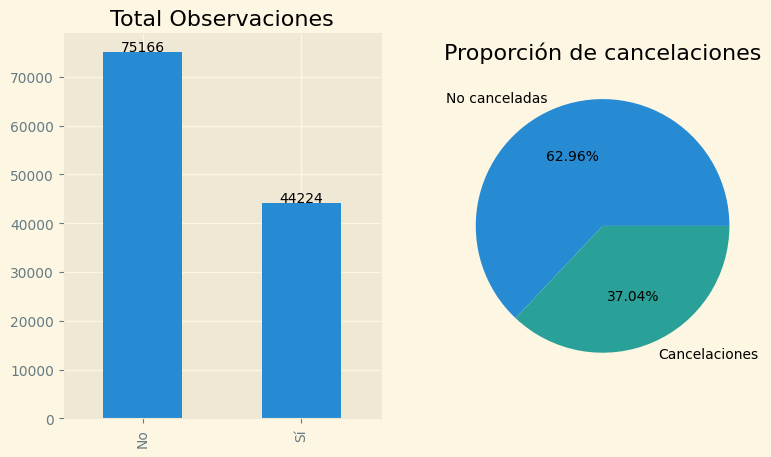

In [25]:
# Crear una figura y dos subplots
plt.figure(figsize=(figsize_default))

plt.subplot(1, 2, 1)  # Subplot 1: Gráfico de barras
cancel_counts = df_reservas['is_canceled'].value_counts()
cancel_counts.plot.bar()
plt.title('Total Observaciones')

# Modificar las etiquetas del eje x
plt.xticks([0, 1], ['No', 'Sí'])

# Agregar etiquetas a las barras
for i, count in enumerate(cancel_counts):
    plt.text(i, count + 100, str(count), ha='center')

plt.subplot(1, 2, 2)  # Subplot 2: Gráfico de pastel
plt.pie(df_reservas['is_canceled'].value_counts(), labels=["No canceladas", "Cancelaciones"], autopct='%1.2f%%')
plt.title('Proporción de cancelaciones')

plt.show()

Actualmente, el 63 % de las observaciones corresponden a reservas no canceladas. Esto sugiere un desbalanceo inicial en la variable objetivo, lo que podría influir en el rendimiento de ciertos modelos de análisis predictivo. Será importante considerar estrategias de manejo de desbalanceo para garantizar resultados precisos y equilibrados en el análisis y modelado de datos.

## Reducción de características

El primer paso consistirá en eliminar las características que no serán útiles en análisis posteriores. Esto permitirá agilizar el procesamiento de los datos en etapas posteriores.

Las siguientes columnas serán eliminadas del DataFrame, a excepción de '**company**', ya que fueron creadas artificialmente por el autor del conjunto de datos para proporcionar contexto adicional. La característica '**company**' se eliminará del DataFrame debido a que más del 94% de sus observaciones tienen valores NaN, lo que limita su utilidad para el análisis.

In [26]:
try:
    df_reservas.drop(columns=['email','phone-number','credit_card', 'name','company'], inplace=True)
    print("Se eliminaron las características solicitadas.")
except KeyError as e:
    print(f"Error: {e} - Una o varias columnas no existen en el DataFrame.")

Se eliminaron las características solicitadas.


La característica '**reservation_status**' parece ser redundante con '**is_canceled**'. Busca agrupar las observaciones para determinar si se conserva dicha columna.

In [27]:
try:
    print(df_reservas.groupby('is_canceled')['reservation_status'].value_counts())
except KeyError as e:
    print(f"Error: {e} - Una o ambas columnas 'is_canceled' y 'reservation_status' no existen en el DataFrame.")

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64


Se elimina la característica '**reservation_status**' por se un dato que se puede obtener con '**is_canceled**'.

In [28]:
try:
    df_reservas.drop(columns=['reservation_status'], inplace=True)
    print("Se eliminaron las características solicitadas.")
except KeyError as e:
    print(f"Error: {e} - La columna 'reservation_status' no existe en el DataFrame.")

Se eliminaron las características solicitadas.


## Valores Duplicados

Busca las observaciones duplicadas en el dataframe y si las encuentra, procede a eliminarlas. Se decide eliminarlas, dado que no pueden existir observaciones completamente iguales. Eso se debe a un error durante la generación inicial del dataset original.

In [29]:
total_duplicados = df_reservas.duplicated().sum()

if total_duplicados > 0:
    print("En total de filas duplicadas en el DataFrame:", total_duplicados)
    df_reservas.drop_duplicates(inplace=True)
    print("Se eliminaron las filas duplicadas.")
else:
    print("El DataFrame no tiene filas duplicadas.")

En total de filas duplicadas en el DataFrame: 32003
Se eliminaron las filas duplicadas.


## Valores NaN

Durante el análisis del DataFrame, se identificaron observaciones que contienen valores NaN (Not a Number). En esta etapa, se abordarán diversas estrategias para el manejo de estos valores faltantes, buscando optimizar la integridad y calidad de los datos.

Durante el análisis inicial del DataFrame, se detectaron valores NaN en las características 'agent' y 'children'. Sin embargo, dado que el porcentaje de valores faltantes fue muy insignificante, se ha decidido completar estas observaciones con el valor cero (0).

In [30]:
# Los códigos faltantes de las agencias de turismo se reemplazan con el valor de la MODA
df_reservas["agent"].fillna(df_reservas["agent"].mode()[0], inplace=True)

# Reemplaza los Nan por 0 en la característica 'children'
df_reservas['children'].replace(np.nan, 0, inplace=True)

In [31]:
# Reemplaza los Nan por la MODA en la característica 'country'
df_reservas['country'].fillna(df_reservas['country'].mode()[0], inplace=True)

In [32]:
df_reservas['country'].unique()

array(['PRT', 'SWE', 'FRA', 'USA', 'AUT', 'DEU', 'ITA', 'IRL', 'GBR',
       'EGY', 'MAR', 'DNK', 'ISR', 'CHE', 'BEL', 'ESP', 'NLD', 'JEY',
       'AGO', 'POL', 'BRA', 'EST', 'RUS', 'JPN', 'LTU', 'IND', 'DOM',
       'CN', 'HUN', 'CHN', 'NOR', 'IRN', 'CZE', 'AUS', 'GEO', 'MEX',
       'FIN', 'CPV', 'UKR', 'DZA', 'LUX', 'TUR', 'BHR', 'ROU', 'VEN',
       'SRB', 'BIH', 'SVN', 'CUB', 'PER', 'IDN', 'CYP', 'TWN', 'GIB',
       'SYR', 'CHL', 'IRQ', 'BOL', 'QAT', 'ARG', 'GRC', 'BGR', 'KOR',
       'CAF', 'ARE', 'MKD', 'MUS', 'LBN', 'ALB', 'TUN', 'MYS', 'PHL',
       'LVA', 'ISL', 'GHA', 'HRV', 'VNM', 'SEN', 'CRI', 'MOZ', 'SGP',
       'ECU', 'PRY', 'JOR', 'COL', 'ZAF', 'NZL', 'ZMB', 'SUR', 'TJK',
       'TMP', 'THA', 'SVK', 'SAU', 'URY', 'KWT', 'CIV', 'KAZ', 'BLR',
       'TGO', 'GAB', 'AND', 'COM', 'LKA', 'IMN', 'OMN', 'ZWE', 'PAN',
       'MAC', 'BHS', 'AZE', 'UMI', 'HKG', 'SYC', 'LBY', 'MDV', 'BGD',
       'CMR', 'FRO', 'MCO', 'NGA', 'CYM', 'PRI', 'GGY', 'SLV', 'LAO',
       'GNB', 'PAK', 

## Valores erroneos

Estos valores, considerados incorrectos según las normativas del negocio o la lógica inherente a los datos, serán identificados y tratados en esta sección del análisis.

Analiza la característica '**children**', la cual contiene valores NaN. Identificando los valores unicos.

In [33]:
df_reservas['children'].value_counts()

0.0     79023
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [34]:
# Elimina el valor mayor o igual a 10 por ser un outlier dentro de la muestra
df_reservas = df_reservas[~(df_reservas['children'] >= 10)]

 Borra las observaciones cuando adultos, niños y bebés son todos cero (0), lo cual resulta en un error al capturar los datos para constituir el dataset original.

In [35]:
total_registros_con_cero = (
    (df_reservas['children'] + df_reservas['adults'] + df_reservas['babies']) == 0
).sum()

total_registros_sin_adultos = ((df_reservas['adults'] == 0)).sum()

if total_registros_con_cero:
    print("Total registros con suma de niños, adultos y bebés igual a 0:", total_registros_con_cero)
    print("Total registros sin adultos:", total_registros_sin_adultos)

    # Tratamiento de los registros con error
    df_reservas = df_reservas[~((df_reservas['children'] + df_reservas['adults'] + df_reservas['babies']) == 0)]
    print("\nSe eliminaron del DataFrame", total_registros_con_cero, "observaciones con error.")
    df_reservas['adults'].replace(0, df_reservas['adults'].mode()[0], inplace=True)
    print("Se reemplazaron con el valor MODA", total_registros_sin_adultos, "observaciones sin adultos")
else:
    print("No se encontraron registros con errores.")

Total registros con suma de niños, adultos y bebés igual a 0: 166
Total registros sin adultos: 385

Se eliminaron del DataFrame 166 observaciones con error.
Se reemplazaron con el valor MODA 385 observaciones sin adultos


Analizamos la característica '**country**', dado que tiene valores perdidos.

In [36]:
# El código de la característica debe ser de 3 letras
df_reservas['country'].dropna().unique()[[len(str(country)) != 3 for country in df_reservas['country'].dropna().unique()]]

array(['CN'], dtype=object)

Este error lo manejaremos más adelante con el conjunto de datos externos.

Busca y reemplaza los registros donde '**adr**' es menor o igual que 0, dado que constituye un error, por el valor de la **MEDIA**.

In [37]:
total_registros_adr_cero = (df_reservas['adr'] <= 0).sum()
print("Total de registros con adr menor o igual a cero (0):", total_registros_adr_cero)

Total de registros con adr menor o igual a cero (0): 1644


In [38]:
# Reemplaza el valor 0 por la mediana de la característica.
df_reservas['adr'] = df_reservas['adr'].apply(lambda x: df_reservas['adr'].median() if x <= 0 else x)
df_reservas['adr'].describe()

count    87220.000000
mean       108.370865
std         52.886862
min          0.260000
25%         74.800000
50%         98.200000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

## Transformación de los tipos de datos.

In [39]:
# Transforma el tipo de dato float a int64
df_reservas['children'] = df_reservas['children'].astype('int64')

#Transformación a formato Fecha
df_reservas["reservation_status_date"] = pd.to_datetime(df_reservas["reservation_status_date"])

## Etiquetado de variables
Realiza el etiquetado de variables categóricas utilizando LabelEncoder.

In [40]:
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Lista de columnas categóricas
columnas_categoricas = ['hotel', 'country', 'meal', 'distribution_channel',
                        'deposit_type', 'market_segment', 'reserved_room_type',
                        'assigned_room_type', 'customer_type']

# Iterar sobre cada columna categórica
for columna in columnas_categoricas:
    # Aplicar el etiquetado de la variable categórica y agregar una nueva columna al DataFrame con el sufijo "_le"
    df_reservas[columna + '_le'] = label_encoder.fit_transform(df_reservas[columna])


Analiza como queda el DataFrame luego de realizados los cambios.

In [41]:
analizar_dataframe(df_reservas, porcentaje_tolerancia= 0)

Finalizamos este procesamiento con un DataFrame principal depurado.

In [42]:
print("Luego del proceso de Data Wranglig, el DataFrame ahora contiene un total de", df_reservas.value_counts().sum(), "obsevaciones." )

Luego del proceso de Data Wranglig, el DataFrame ahora contiene un total de 87220 obsevaciones.


In [43]:
print(fecha_hora_local())

2024-02-21 12:27:05 -03-0300


## Ingeniería de atributos

Introducimos nuevas características que enriquecerán nuestra comprensión de los datos y potenciarán el rendimiento de nuestros modelos de aprendizaje automático. Estas características están diseñadas para capturar aspectos específicos y relevantes de nuestros datos, permitiendo una exploración más profunda y una modelización más precisa. Al incorporar estas nuevas variables, fortalecemos nuestro enfoque de análisis de datos desde una perspectiva de ciencia de datos, lo que nos capacita para descubrir patrones más sutiles, identificar relaciones ocultas y tomar decisiones más informadas en el proceso de modelado predictivo y análisis exploratorio.

Crea el campo '**fecha_arribo**' para futuras operaciones, tomando los datos de las columnas '**arrival_date_year**', '**arrival_date_month**' y '**arrival_date__day_of_month**'.

In [44]:
df_reservas['mes_arribo_numero'] = df_reservas["arrival_date_month"].map(orden_meses)

df_reservas['fecha_arribo'] = pd.to_datetime(df_reservas['arrival_date_year'].astype(str) + '-'
                                             + df_reservas['arrival_date_month'].astype(str) + '-'
                                             + df_reservas['arrival_date_day_of_month'].astype(str))

# Convertir 'fecha_arribo' a tipo datetime
df_reservas['fecha_arribo'] = pd.to_datetime(df_reservas['fecha_arribo'])
df_reservas['fecha_arribo'].sample(5)

50287   2017-06-03
5216    2015-11-18
51793   2017-04-08
98457   2016-09-28
51207   2017-05-21
Name: fecha_arribo, dtype: datetime64[ns]

Nueva característica '**total_pasajeros**', que suma el total de pasajeros adultos y menores de edad, por observación.

In [45]:
df_reservas['total_pasajeros'] = df_reservas[['adults', 'children', 'babies']].sum(axis=1)
df_reservas['total_pasajeros'].unique()

array([ 2,  1,  3,  4,  5, 26, 40, 12, 55, 20, 27, 50, 10,  6])

Nueva característica '**total_estadia**', que calcula el total de noches por observación.

In [46]:
df_reservas['total_estadia'] = df_reservas[['stays_in_week_nights', 'stays_in_weekend_nights']].sum(axis=1)
df_reservas['total_estadia'].unique()

array([ 2,  4,  7,  5,  1,  3,  6,  8, 30,  9, 10,  0, 11, 14, 29, 12, 15,
       22, 13, 21, 19, 42, 28, 35, 25, 16, 18, 56, 48, 17, 20, 38, 24, 33,
       26, 60, 23, 45, 27, 34, 46, 69])

Busca identificar los outliers existen entre la característica '**adr**' y la nueva característica '**total_pasajeros**'

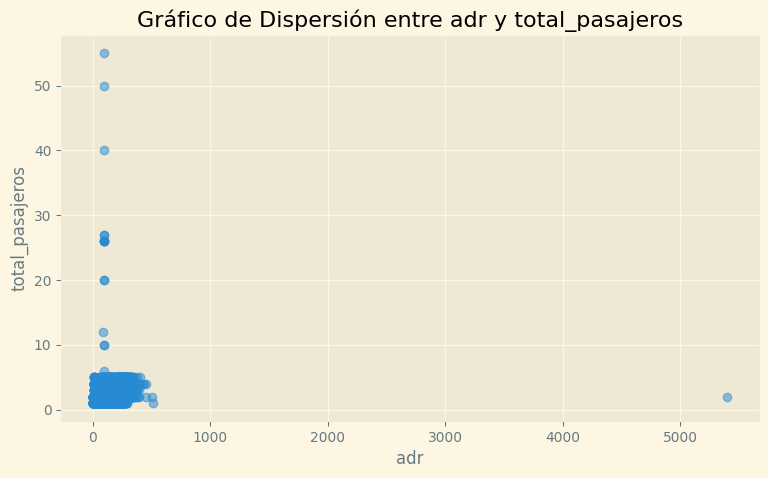

In [47]:
graficar_scatter_plot(df_reservas, 'adr', 'total_pasajeros', tamano_grafico=(figsize_default))

La nueva característica **total_pasajeros** permite identificar valores outliers en el **adr**.
Reemplaza los valores mayores a 1.000 de la característica '**adr**'y les asigna el valor del promedio.

In [48]:
df_reservas['adr'] = df_reservas['adr'].where(df_reservas['adr'] <= 1000, df_reservas['adr'].mean())

Crea la nueva característica '**grupo_pasajeros**', y le asigna una categoria a la observación según las siguientes clasificaciones para grupos de pasajeros:


* 'solteros': 1 adulto, sin hijos ni bebes,
* 'solteros_con_hijos': 1 adulto, con hijos/bebes,
* 'parejas': 2 adultos, sin hijos ni bebes,
* 'familia_chica': 2 adultos con 1 hijo o bebe,
* 'familia_mediana': 2 adultos con 2 hijo o bebe,
* 'familia_grande': 2 adultos con mas de 2 hijos o bebes
* 'grupos': mas de 2 adultos

In [49]:
# Definir una función lambda para categorizar las reservas por grupos de pasajeros
categorizar_pasajeros = lambda row: (
    'solteros' if row['adults'] == 1 and row['babies'] == 0 and row['children'] == 0
    else 'solteros_con_hijos' if row['adults'] == 1 and (row['babies'] + row['children']) >= 1
    else 'parejas' if row['adults'] == 2 and row['babies'] == 0 and row['children'] == 0
    else 'familia_chica' if row['adults'] == 2 and (row['babies'] + row['children']) == 1
    else 'familia_mediana' if row['adults'] == 2 and (row['babies'] + row['children']) == 2
    else 'familia_grande' if row['adults'] == 2 and (row['babies'] + row['children']) > 2
    else 'grupos' if row['adults'] > 2
    else 'indefinidos'
)

df_reservas['grupo_pasajeros'] = df_reservas.apply(categorizar_pasajeros, axis=1)

df_reservas[['adults','children','babies', 'total_pasajeros', 'grupo_pasajeros']].sample(5)

adults  children  babies  total_pasajeros grupo_pasajeros
78600       2         0       0                2         parejas
10375       2         0       0                2         parejas
96066       2         1       0                3   familia_chica
35585       2         1       0                3   familia_chica
83874       1         0       0                1        solteros

Determina si una observación es un grupo familiar basandose en la ingeniería realizada previamente en la calificación de los pasajeros. Para ello, creamos la nueva característica **es_grupo_familiar**, cuyo valor será un 1 cuando sea verdadero y 0 para falso.

In [50]:
df_reservas['es_grupo_familiar'] = (
    (df_reservas['grupo_pasajeros'].isin(['solteros_con_hijos','familia_chica', 'familia_mediana', 'familia_grande'])).astype(int)
)
df_reservas[['grupo_pasajeros','es_grupo_familiar', 'total_pasajeros']]

grupo_pasajeros  es_grupo_familiar  total_pasajeros
0               parejas                  0                2
1               parejas                  0                2
2              solteros                  0                1
3               parejas                  0                2
4                grupos                  0                3
...                 ...                ...              ...
119385  familia_mediana                  1                4
119386          parejas                  0                2
119387          parejas                  0                2
119388          parejas                  0                2
119389          parejas                  0                2

[87220 rows x 3 columns]

Con la '**fecha_arribo**' y la cantidad total de noches de la estadia ('**total_estadia**'), se calcula la fecha de check-out del pasajero, creando la nueva característica '**fecha_check_out**'.

In [51]:
df_reservas['fecha_check_out'] = df_reservas['fecha_arribo'] + pd.to_timedelta(df_reservas['total_estadia'], unit='D')
df_reservas['fecha_check_out'].sample(5)

22532   2016-07-17
15019   2016-02-12
26858   2017-07-14
58113   2015-09-18
84268   2017-06-29
Name: fecha_check_out, dtype: datetime64[ns]

In [52]:
# BORRAR ESTO
df_reservas_backup = df_reservas.copy()

## Valores atípicos (outliers)

Los valores atípicos, o outliers, son datos inusuales que difieren significativamente del resto del conjunto. Pueden surgir por errores, variaciones naturales o eventos raros. Identificarlos es esencial en ciencia de datos para evitar distorsiones en análisis y modelos. Se emplean técnicas como el rango intercuartílico o diagramas de caja para detectarlos. Tratarlos adecuadamente mejora la precisión de los modelos y la fiabilidad de las conclusiones.

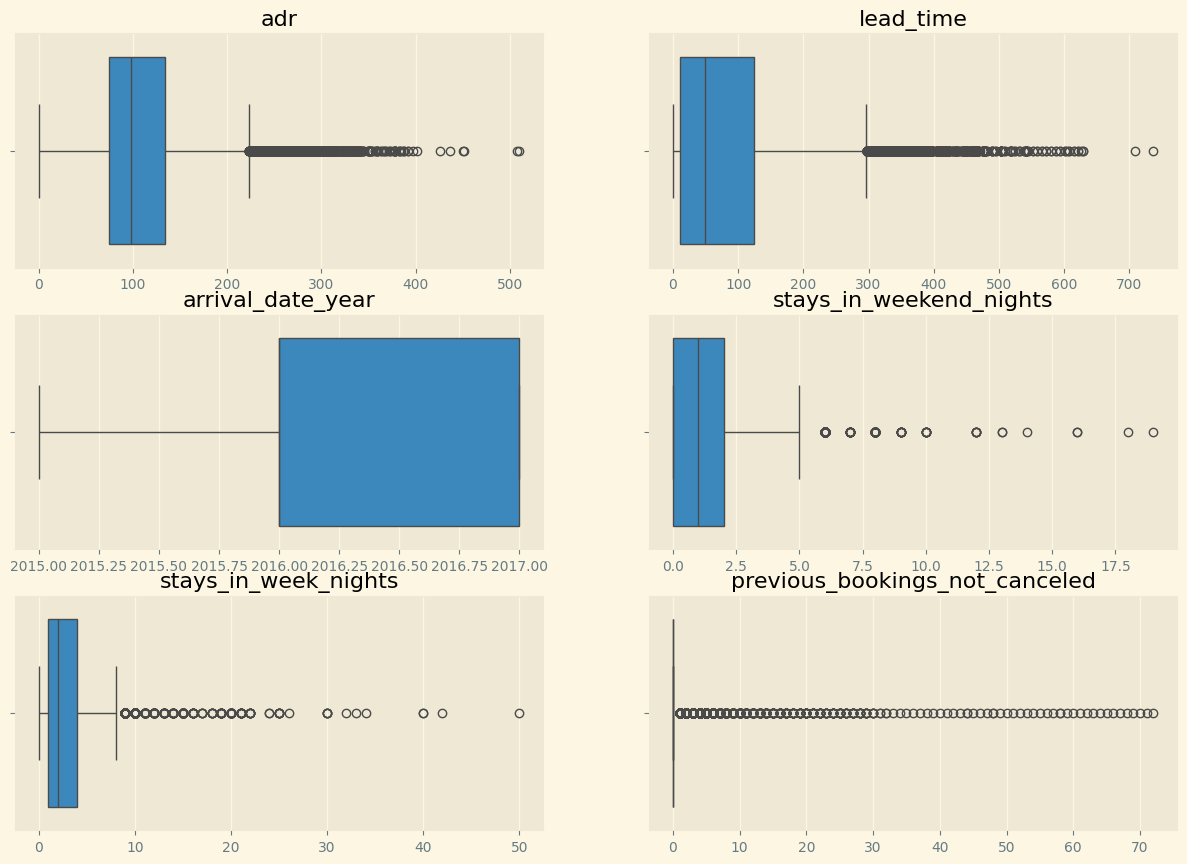

In [53]:
# Realiza un grafico boxplot de algunas las características
plt.figure(figsize=(15,14))
for i,j in zip(range(8),df_reservas[['adr','lead_time','arrival_date_year',
                                     'stays_in_weekend_nights', 'stays_in_week_nights',
                                     'previous_bookings_not_canceled']]):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df_reservas[j])
  plt.title(j)
  plt.xlabel('')

Análisis multivariado

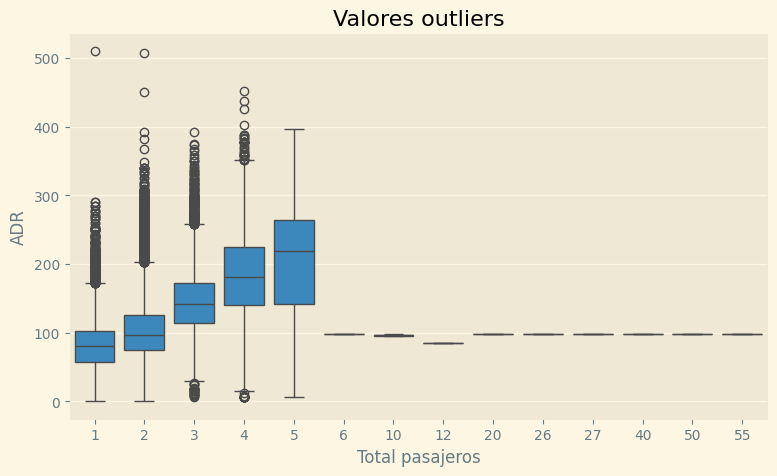

In [54]:
plt.figure(figsize=(figsize_default))
sns.boxplot(data = df_reservas, x='total_pasajeros', y='adr')
plt.xlabel('Total pasajeros')
plt.ylabel('ADR')
plt.title('Valores outliers')
plt.show()

## Método euclideano

In [55]:
def outlier_euclideano_d(x,cutoff=3):
  # x: dataframe con valors numericos normalizados
  result_ = pd.Series([0] * len(x.iloc[:,1]))
  data_mean = x.mean() # media de los datos_
  dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Distancia euclideana
  dist_mean = dist.mean() #media de las distancia
  dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score para las distancias
  result_[((dist_zscore > cutoff))] = 1
  return result_

In [56]:
# Restablecer los índices
df_reservas.reset_index(drop=True, inplace=True)

# Dejar las características númericas
df_reservas_numerico = df_reservas.select_dtypes(include='number').copy()
#analizar_dataframe(df_reservas_numerico, 0)

In [57]:
# Convertir a z score
datos_z = df_reservas_numerico.copy()

for j in df_reservas_numerico.columns[1:]:
    std_dev = df_reservas_numerico[j].std()
    if std_dev != 0:
        datos_z[j] = (df_reservas_numerico[j] - df_reservas_numerico[j].mean()) / std_dev
    else:
        datos_z[j] = 0  # Puedes ajustar este valor predeterminado según tu necesidad

datos_z.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            1  -0.243739           1.150948                 -1.670531   
1            0   1.278439          -0.306663                  1.914219   
2            0  -0.627188           1.150948                 -0.500000   
3            0   2.359069          -1.764274                  1.109480   
4            0  -0.813103          -0.306663                  0.597372   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                   0.813072                -0.004497             -0.796220   
1                   1.378961                -0.977844              0.674591   
2                   0.134006                -0.977844             -0.305949   
3                  -0.431883                 0.968849              1.164861   
4                   0.699894                -0.004497              0.674591   

     adults  children    babies  ...  distribution_channel_le  \
0  0.188037 -0.305008 -0.095384  ...                 0.500183   
1  0.188037 -0.305008 -0.095384  ...                -1.614606   
2 -1.439167 -0.305008 -0.095384  ...                 0.500183   
3  0.188037 -0.305008 -0.095384  ...                -1.614606   
4  1.815240 -0.305008 -0.095384  ...                 0.500183   

   deposit_type_le  market_segment_le  reserved_room_type_le  \
0         7.649583          -0.800124              -0.685715   
1        -0.111405          -1.544073               0.949741   
2        -0.111405          -0.056176              -0.685715   
3        -0.111405          -0.800124               1.494892   
4        -0.111405           0.687773               2.585196   

   assigned_room_type_le  customer_type_le  mes_arribo_numero  \
0              -0.840176         -0.105542          -1.768105   
1               0.679318         -0.105542           1.784398   
2              -0.840176          1.781583          -0.476286   
3               1.692314          1.781583           1.138488   
4               2.198812         -0.105542           0.492578   

   total_pasajeros  total_estadia  es_grupo_familiar  
0        -0.042830      -0.593804          -0.330052  
1        -0.042830       0.135388          -0.330052  
2        -1.299358      -0.593804          -0.330052  
3        -0.042830       1.229175          -0.330052  
4         1.213698       0.499984          -0.330052  

[5 rows x 32 columns]

In [58]:
# Aplicar la funcion
datos_z['outlier'] = outlier_euclideano_d(datos_z, 3)
datos_z.sample(5)

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
15913            0  -0.685287          -0.306663                 -1.524215   
20806            0   0.116471           1.150948                  0.231581   
55401            0  -0.917680          -0.306663                 -0.792633   
86539            0  -0.081063          -0.306663                  0.085265   
53671            0  -0.708526           1.150948                 -1.816847   

       arrival_date_day_of_month  stays_in_weekend_nights  \
15913                  -1.224127                -0.977844   
20806                   0.926250                -0.004497   
55401                  -0.431883                -0.977844   
86539                  -1.110949                -0.977844   
53671                  -0.545061                -0.977844   

       stays_in_week_nights    adults  children    babies  ...  \
15913             -0.305949  0.188037 -0.305008 -0.095384  ...   
20806             -0.305949  0.188037 -0.305008 -0.095384  ...   
55401             -0.305949 -1.439167 -0.305008 -0.095384  ...   
86539              0.184321  0.188037 -0.305008 -0.095384  ...   
53671              0.674591  1.815240 -0.305008 -0.095384  ...   

       deposit_type_le  market_segment_le  reserved_room_type_le  \
15913        -0.111405          -1.544073              -0.685715   
20806        -0.111405           0.687773              -0.685715   
55401        -0.111405          -2.288022              -0.685715   
86539        -0.111405           0.687773              -0.685715   
53671        -0.111405          -1.544073               0.949741   

       assigned_room_type_le  customer_type_le  mes_arribo_numero  \
15913               1.185816         -0.105542          -1.445151   
20806              -0.840176         -0.105542           0.169623   
55401               0.679318          1.781583          -0.799241   
86539              -0.840176         -0.105542           0.169623   
53671               0.679318         -0.105542          -1.768105   

       total_pasajeros  total_estadia  es_grupo_familiar  outlier  
15913        -0.042830      -0.593804          -0.330052        0  
20806        -0.042830      -0.229208          -0.330052        0  
55401        -1.299358      -0.593804          -0.330052        0  
86539        -0.042830      -0.229208          -0.330052        0  
53671         1.213698       0.135388          -0.330052        0  

[5 rows x 33 columns]

In [59]:
# Muesta las observaciones con valores outliers detectados
datos_z[datos_z['outlier'] == 1]

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
13               1   1.650268          -1.764274                  0.816847   
50               1  -0.778244           1.150948                 -1.670531   
52               0  -0.650428          -1.764274                  1.255796   
74               0  -0.871201           1.150948                 -1.816847   
217              1   1.987239          -0.306663                 -1.012108   
...            ...        ...                ...                       ...   
86600            0   2.208013          -0.306663                 -0.719475   
86733            1   2.103436           1.150948                 -0.719475   
86866            0  -0.882821           1.150948                 -1.816847   
86985            1   4.055541          -0.306663                  0.890005   
87162            0   1.034425          -0.306663                 -0.938949   

       arrival_date_day_of_month  stays_in_weekend_nights  \
13                     -0.092350                -0.004497   
50                      0.926250                 6.808927   
52                      1.152605                 7.782273   
74                     -0.658239                -0.977844   
217                     0.699894                -0.977844   
...                          ...                      ...   
86600                   0.473539                -0.977844   
86733                   1.492139                 0.968849   
86866                  -0.771416                -0.004497   
86985                   0.813072                -0.977844   
87162                   1.718494                -0.977844   

       stays_in_week_nights    adults  children    babies  ...  \
13                 1.164861  0.188037 -0.305008 -0.095384  ...   
50                 9.499453 -1.439167 -0.305008 -0.095384  ...   
52                 9.009183 -1.439167 -0.305008 -0.095384  ...   
74                 0.184321 -1.439167 -0.305008 -0.095384  ...   
217                0.184321  0.188037 -0.305008 -0.095384  ...   
...                     ...       ...       ...       ...  ...   
86600              0.674591  0.188037 -0.305008 -0.095384  ...   
86733             -0.796220  0.188037 -0.305008 -0.095384  ...   
86866              0.184321 -1.439167 -0.305008 -0.095384  ...   
86985             -0.305949  0.188037 -0.305008 -0.095384  ...   
87162              0.184321 -1.439167 -0.305008 -0.095384  ...   

       deposit_type_le  market_segment_le  reserved_room_type_le  \
13            7.649583          -0.800124              -0.685715   
50           -0.111405           0.687773              -0.685715   
52           -0.111405          -3.031971               1.494892   
74           -0.111405          -2.288022              -0.685715   
217           7.649583          -0.800124              -0.685715   
...                ...                ...                    ...   
86600        -0.111405          -0.056176              -0.685715   
86733         7.649583          -0.800124              -0.685715   
86866        -0.111405          -2.288022              -0.685715   
86985        -0.111405          -0.800124              -0.685715   
87162        15.410572          -0.800124              -0.685715   

       assigned_room_type_le  customer_type_le  mes_arribo_numero  \
13                 -0.840176         -0.105542           0.815533   
50                 -0.840176         -0.105542          -1.768105   
52                  3.211809          1.781583           1.138488   
74                 -0.840176         -0.105542          -1.768105   
217                -0.840176         -0.105542          -1.122196   
...                      ...               ...                ...   
86600               0.679318          1.781583          -0.799241   
86733              -0.840176         -0.105542          -0.799241   
86866              -0.840176         -0.105542          -1.768105   
86985              -0.840176         

<Axes: xlabel='is_canceled', ylabel='total_pasajeros'>

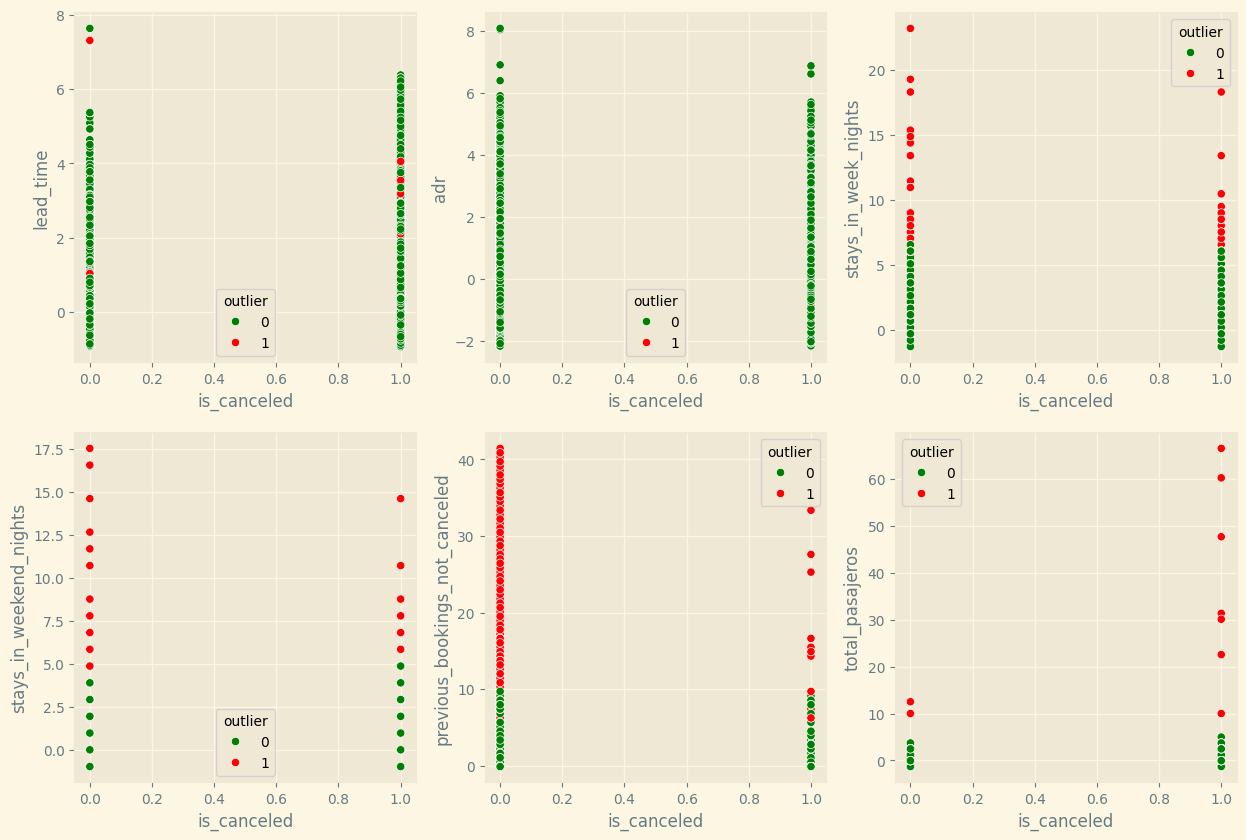

In [60]:
df_z = datos_z.copy()

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.scatterplot(x="is_canceled",y="lead_time", data = df_z, hue="outlier", palette=["green","red"])
plt.subplot(2,3,2)
sns.scatterplot(x="is_canceled",y="adr", data = df_z , hue="outlier", palette=["green","red"])
plt.subplot(2,3,3)
sns.scatterplot(x="is_canceled",y="stays_in_week_nights", data = df_z, hue="outlier", palette=["green","red"])
plt.subplot(2,3,4)
sns.scatterplot(x="is_canceled",y="stays_in_weekend_nights",  data = df_z, hue="outlier", palette=["green","red"])
plt.subplot(2,3,5)
sns.scatterplot(x="is_canceled",y="previous_bookings_not_canceled", data = df_z , hue="outlier", palette=["green","red"])
plt.subplot(2,3,6)
sns.scatterplot(x="is_canceled",y="total_pasajeros",  data = df_z , hue="outlier", palette=["green","red"])

In [61]:
# Tratamiento de los valores con el método z-score

## Método IQR

In [62]:
# Mover a funciones
def reemplazar_atipicos(data, estrategia='moda'):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    atipicos = (data < limite_inferior) | (data > limite_superior)

    if estrategia == 'moda':
        valor_reemplazo = data.mode()[0]
    elif estrategia == 'promedio':
        valor_reemplazo = data.mean()
    elif estrategia == 'mediana':
        valor_reemplazo = data.median()
    else:
        raise ValueError("Estrategia de datos no válida. Las opciones válidas son 'moda', 'promedio' y 'mediana'.")

    data[atipicos] = valor_reemplazo

In [63]:
# Reemplazar valores atípicos en la columna 'adr' con la moda de esa columna
reemplazar_atipicos(df_reservas['adr'], estrategia='moda')

Gráfica un boxplot para determinar los valores outliers en la característica '**lead_time**'.

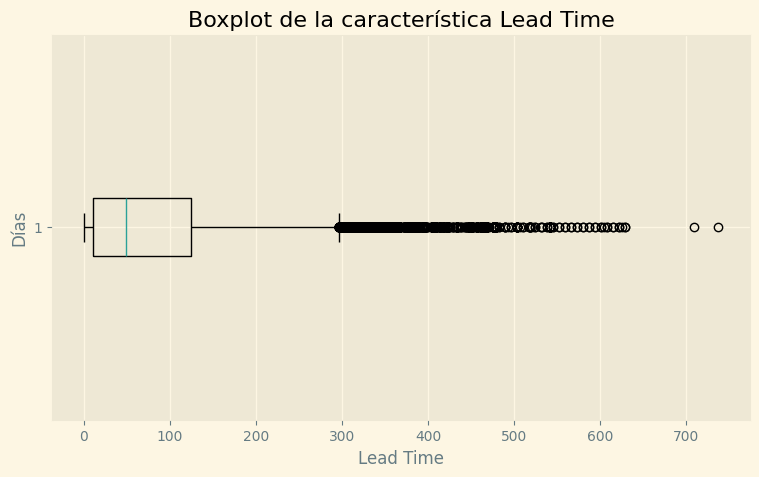

In [64]:
plt.figure(figsize=(figsize_default))
plt.boxplot(df_reservas['lead_time'], vert=False)
plt.xlabel('Lead Time')
plt.ylabel('Días')
plt.title('Boxplot de la característica Lead Time')
plt.show()

In [65]:
# Reemplazar valores atípicos en la columna 'lead_time' con la mediana de esa columna
reemplazar_atipicos(df_reservas['lead_time'], estrategia='mediana')

Buscamos el comportamiento de los valores perdidos entre '**lead_time**' y '**hotel**', según el tipo de hotel.

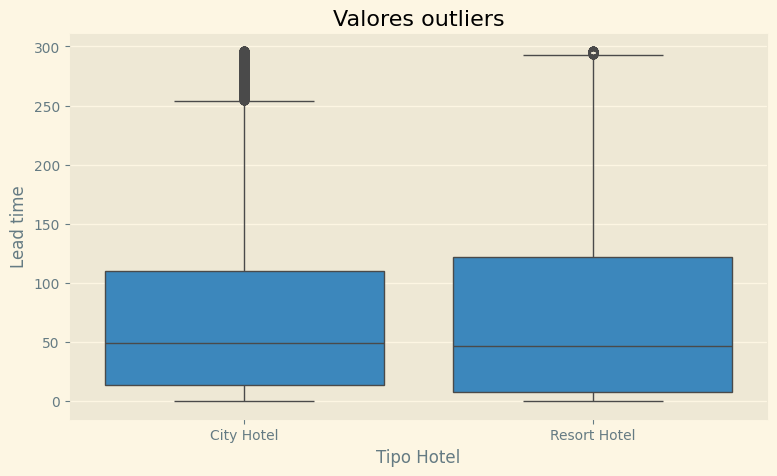

In [66]:
plt.figure(figsize=(figsize_default))
sns.boxplot(data = df_reservas, x='hotel', y='lead_time')
plt.xlabel('Tipo Hotel')
plt.ylabel('Lead time')
plt.title('Valores outliers')
plt.show()

In [67]:
df_reservas[['hotel','lead_time']].describe()

lead_time
count  87220.000000
mean      71.668379
std       72.447218
min        0.000000
25%       11.000000
50%       49.000000
75%      115.000000
max      296.000000

Como se comporta la variable **total_pasajeros** según el tipo de hotel de la característica **hotel**.

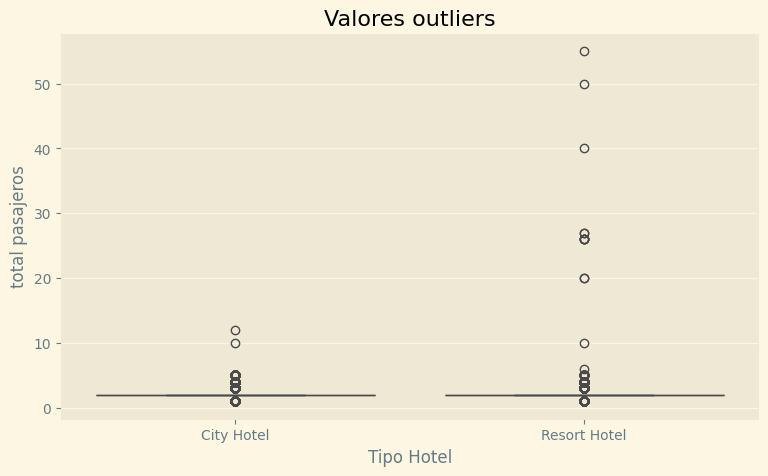

In [68]:
plt.figure(figsize=(figsize_default))
sns.boxplot(data = df_reservas, x='hotel', y='total_pasajeros')
plt.xlabel('Tipo Hotel')
plt.ylabel('total pasajeros')
plt.title('Valores outliers')
plt.show()

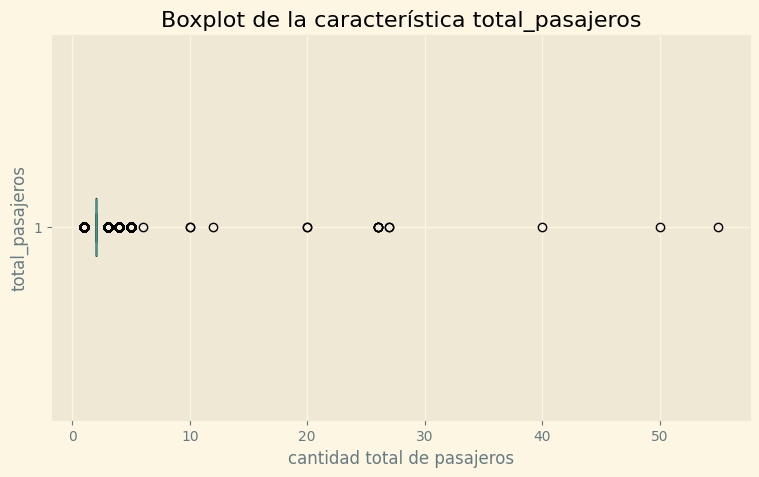

In [69]:
plt.figure(figsize=(figsize_default))
plt.boxplot(df_reservas['total_pasajeros'], vert=False)
plt.xlabel('cantidad total de pasajeros')
plt.ylabel('total_pasajeros')
plt.title('Boxplot de la característica total_pasajeros')
plt.show()

## Países

Trabajamos con los datos obtenidos de la API, con el fin de enriquecer los graficos y análisis futuros.

In [70]:
analizar_dataframe(df_paises_coordenadas, porcentaje_tolerancia=0)

Limpia los países que no tienen código de país.

In [71]:
df_paises_coordenadas = df_paises_coordenadas[df_paises_coordenadas['country'] != 0]
df_paises_coordenadas.head()

country            name    region   lat   lon
0     PRT        Portugal    Europe  39.5  -8.0
1     GBR  United Kingdom    Europe  54.0  -2.0
2     USA   United States  Americas  38.0 -97.0
3     ESP           Spain    Europe  40.0  -4.0
4     IRL         Ireland    Europe  53.0  -8.0

Busca los posibles países duplicados basado en las coordenadas.

In [72]:
duplicados = df_paises_coordenadas[df_paises_coordenadas.duplicated('name', keep=False)]
print(duplicados[['name','country', 'lat','lon']])

     name country   lat    lon
14  China      CN  35.0  105.0
32  China     CHN  35.0  105.0


Busca los valores para cada código de país cuando se trata del mismo.

In [73]:
resultado_lista = df_paises_coordenadas[df_paises_coordenadas.duplicated('name', keep=False)]['country'].tolist()
total = df_reservas[df_reservas['country'].isin(resultado_lista)]['country'].value_counts()
print(total)

CN     1093
CHN     814
Name: country, dtype: int64


Unifica los códigos de país del país duplicado.

In [74]:
df_reservas = df_reservas.replace({'country': {'CN': 'CHN'}})

total = df_reservas[df_reservas['country'] == 'CHN']['country'].value_counts()
print(total)

CHN    1907
Name: country, dtype: int64


In [75]:
df_paises_coordenadas.drop(df_paises_coordenadas[df_paises_coordenadas['country'] == 'CN'].index, inplace=True)

Junta los dataframe en uno solo para luego utilizarlo en las vizualizaciones y demás.

In [76]:
# Calcular el total de pasajeros por país
df_total_pasajeros_pais = df_reservas.groupby('country')['total_pasajeros'].sum().reset_index()

# Calcular el total de reservas canceladas y confirmadas por país
df_totales = df_reservas.groupby(['country', 'is_canceled']).size().unstack(fill_value=0).reset_index()
df_totales.columns = ['country', 'canceladas', 'confirmadas']

# Ordenar por reservas canceladas
df_totales = df_totales.sort_values(by='canceladas', ascending=False)

# Combinar DataFrames
df_paises_reservas = pd.merge(left=df_paises_coordenadas, right=df_totales, on='country', how='left')
df_paises_reservas = pd.merge(left=df_total_pasajeros_pais, right=df_paises_reservas, on='country', how='left')

# Eliminar países sin nombre
df_paises_reservas = df_paises_reservas.dropna(subset=['name'])

# Sumar las columnas 'canceladas' y 'confirmadas'
df_paises_reservas['total_reservas'] = df_paises_reservas[['canceladas', 'confirmadas']].sum(axis=1)

# Ordenar por reservas confirmadas
df_paises_reservas = df_paises_reservas.sort_values(by='confirmadas', ascending=False)
df_paises_reservas.head()

country  total_pasajeros            name  region        lat        lon  \
134     PRT            52837        Portugal  Europe  39.500000  -8.000000   
58      GBR            21413  United Kingdom  Europe  54.000000  -2.000000   
50      ESP            15709           Spain  Europe  40.000000  -4.000000   
55      FRA            18705          France  Europe  46.000000   2.000000   
80      ITA             6521           Italy  Europe  42.833333  12.833333   

     canceladas  confirmadas  total_reservas  
134     17987.0       9808.0         27795.0  
58       8439.0       1984.0         10423.0  
50       5382.0       1862.0          7244.0  
55       7091.0       1732.0          8823.0  
80       1986.0       1075.0          3061.0

Analiza los DataFrames para ver el resultado del Data Wrangling y comprobar las tareas realizadas.

In [77]:
analizar_dataframe(df_paises_reservas, porcentaje_tolerancia=0)

## Grabar archivo
Almacena físicamente en un archivo CSV los datos procesados.

In [78]:
grabar_csv("df_reservas_ya_procesado_", df_reservas)

Fecha y hora: 2024-02-21_15-28-16
Los datos se han guardado en el archivo CSV: df_reservas_ya_procesado__2024-02-21_15-28-16.csv


# **Análisis exploratorio de datos (EDA)**

---

El Análisis Exploratorio de Datos es una fase fundamental en el proceso de análisis de datos que se centra en comprender y explorar un conjunto de datos antes de realizar análisis más avanzados o tomar decisiones basadas en los datos.

In [79]:
principales_datos_dataset()

El dataframe contiene un total de 46 características y 87220 observaciones.

Los principales datos de interés son:

Total de reservas confirmadas: 63214
Total de reservas canceladas: 24006

Total observaciones del tipo hotel resort: 33950
Total observaciones del tipo hotel de ciudad: 53270

Distribución poblacional:

Total adultos: 164361
Total bebes: 946
Total menores: 12106

El promedio de pasajeros por observación es: 2.03
El valor promedio de ADR por observación es: 103.33


array([[<Axes: title={'center': 'is_canceled'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_date_year'}>,
        <Axes: title={'center': 'arrival_date_week_number'}>,
        <Axes: title={'center': 'arrival_date_day_of_month'}>,
        <Axes: title={'center': 'stays_in_weekend_nights'}>],
       [<Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>,
        <Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>],
       [<Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'agent'}>,
        <Axes: title={'center': 'days_in_waiting_list'}>,
        <Axes: title={'center': 'adr'}>,
        <Axes: title={'center': 'required_car_parking_spaces'}>],
       [<Axes: title={'ce

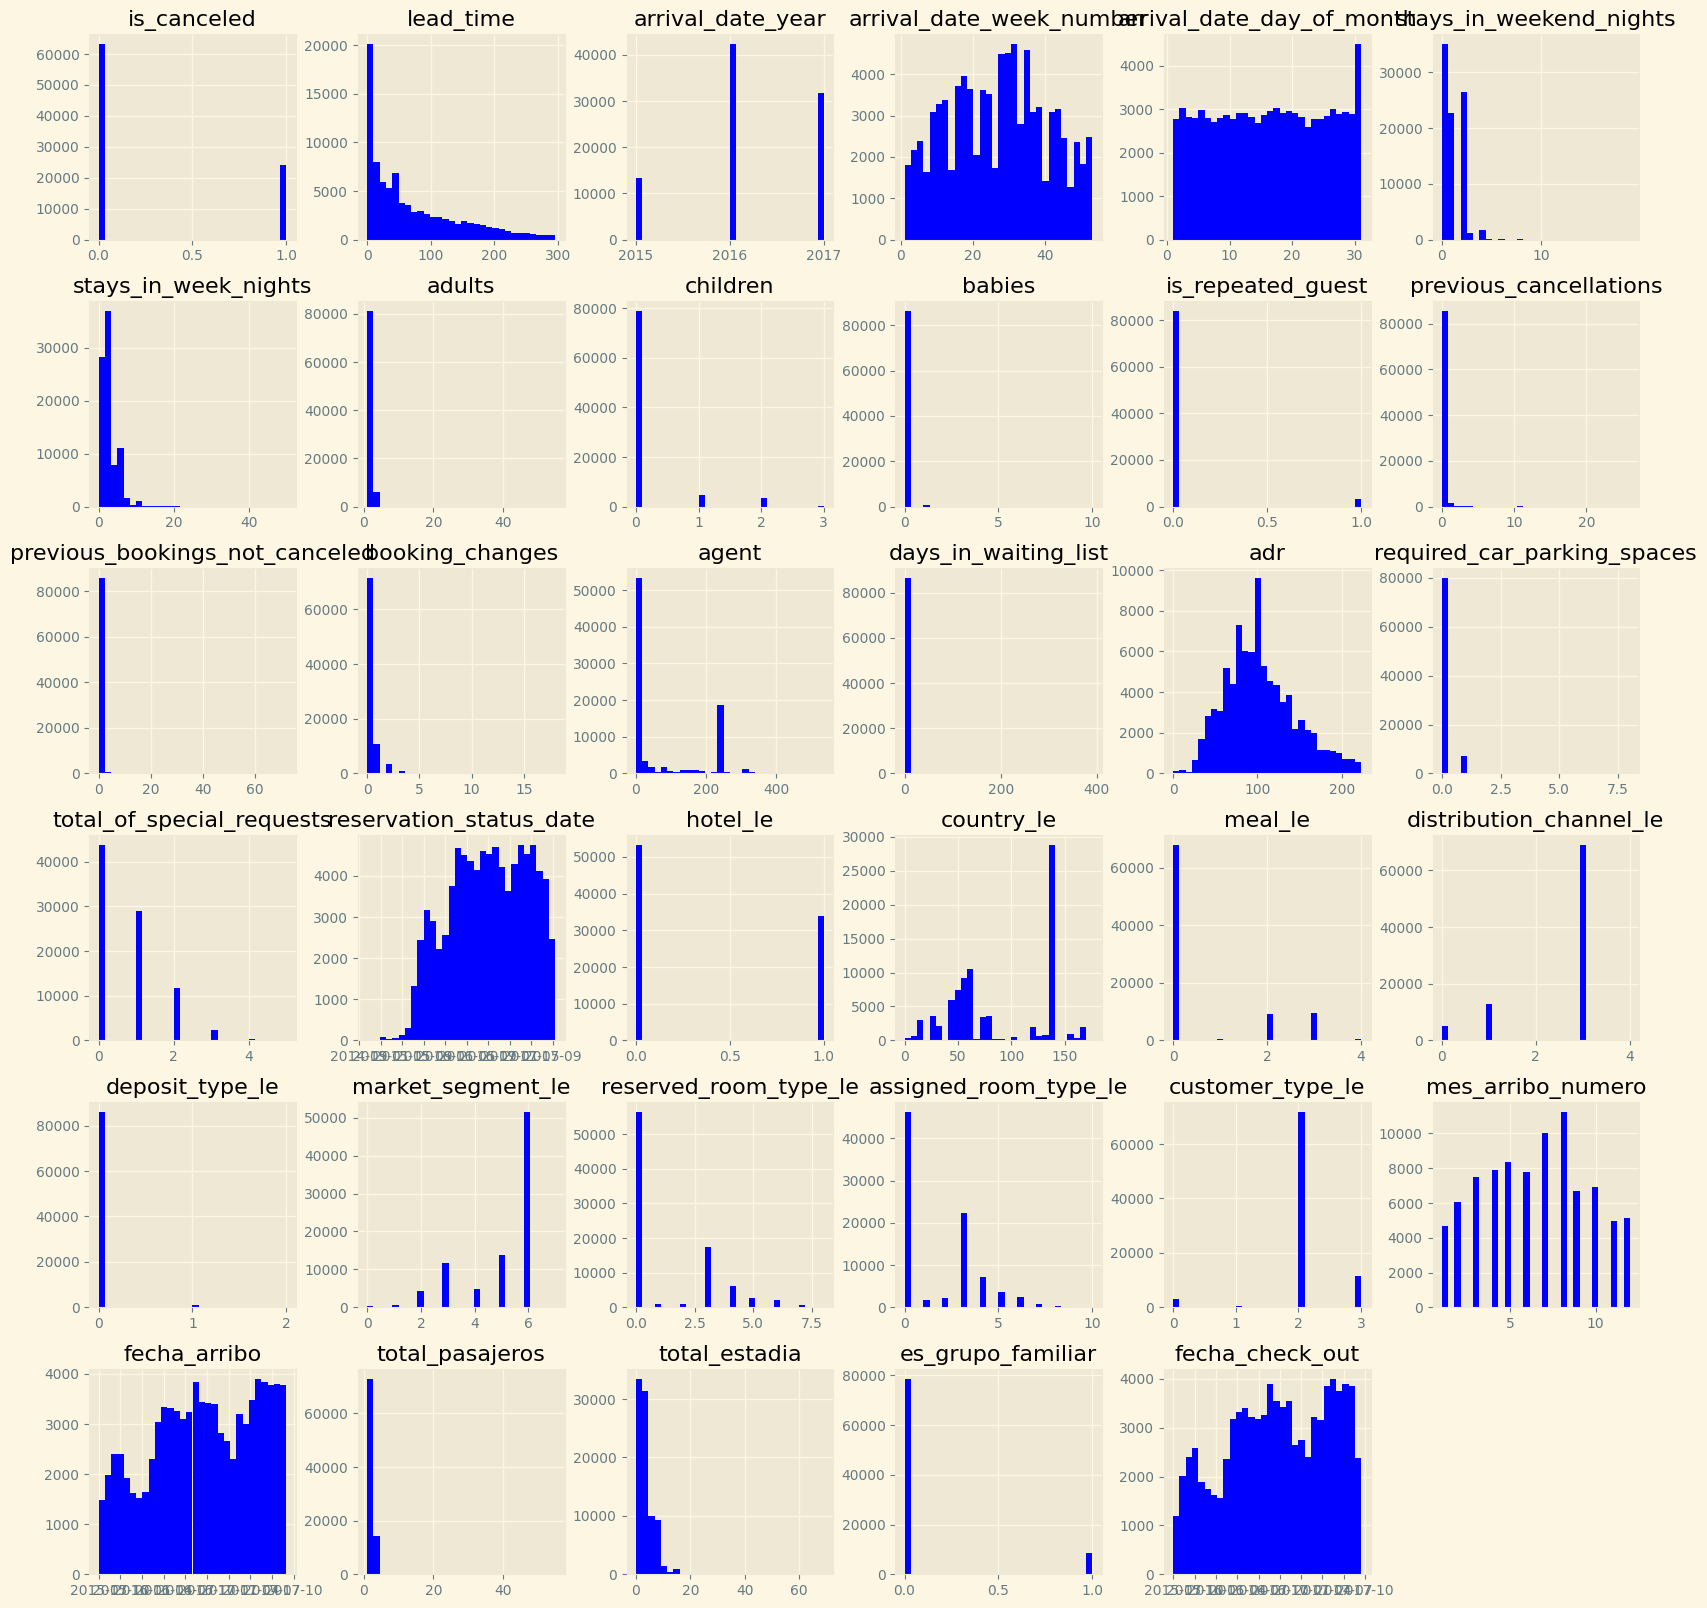

In [80]:
df_reservas.hist(bins = 30, figsize=(20,20), color = 'b')

Busca la relación entre las características **adr** y **total_pasajeros** según la cantidad de estos últimos que componen cada observación.

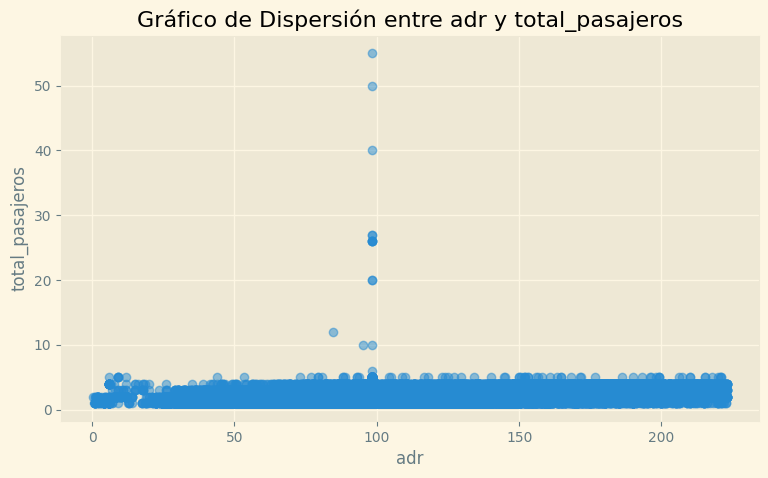

In [81]:
graficar_scatter_plot(df_reservas, 'adr', 'total_pasajeros', tamano_grafico=(figsize_default))

## Reservas confirmadas

Establecer cuál es el país con el mayor número de reservas confirmadas, y realizar un ranking con los 10 principales países de origen de las reservas confirmadas, utilizando la variable 'is_canceled'  cuando el valor es '0', agrupada por 'country'.

In [82]:
primer_registro = df_paises_reservas.nlargest(1, 'confirmadas').iloc[0]
print(f"País con mayor cantidad de reservas confirmadas: {primer_registro['name']} {primer_registro['confirmadas']}")

País con mayor cantidad de reservas confirmadas: Portugal 9808.0


Ranking de los 10 países con mayor cantidad de reservas confirmadas.

In [83]:
df_paises_reservas.sort_values(by='confirmadas', ascending=False)\
                  [['name', 'confirmadas']].head(10)\
                  .style.hide_index()\
                  .background_gradient(cmap='Blues',
                                       subset=['confirmadas'])

Según los datos obtenidos del DataFrame, Portugal es el país con mayor número de reservas confirmadas. La mayoría de los demás países que se encuentran entre los 10 primeros con mayor número de reservas confirmadas son países de Europa occidental, con excepción de Brasil en el septimo lugar, China en el noveno y Estados Unidos en la decima posición.

Gráfico de barras con la distribución de reservas totales  confirmadas por país de origen de los pasajeros.

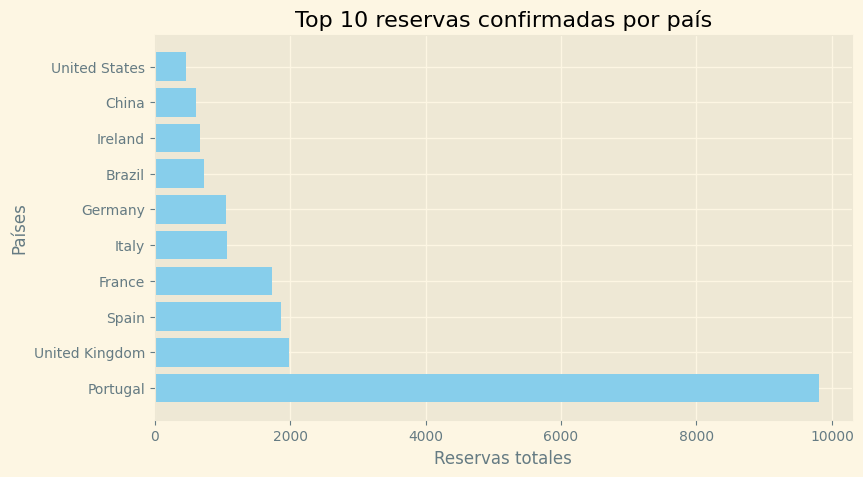

In [84]:
total_reservas = df_paises_reservas[['name', 'confirmadas']].head(10).sort_values(by='confirmadas', ascending=False)

plt.figure(figsize=(figsize_default))
plt.barh(total_reservas['name'], total_reservas['confirmadas'], color='skyblue')

plt.title('Top 10 reservas confirmadas por país')
plt.ylabel('Países')
plt.xlabel('Reservas totales')

plt.show()

Se confirma que Portugal es por mucho, el mayor emisor de turistas dentro de la muestra analizada.

Una forma diferente de comprender los resultados, es observar el mapa mundial de reservas por total de pasajeros. Este mapa muestra que la mayor cantidad de pasajeros provienen de Europa occidental, con Portugal a la cabeza como el principal generador de turistas de salida.


In [85]:
fig = px.scatter_mapbox(df_paises_reservas, lat="lat", lon="lon", hover_name="name",
                        zoom=1, height=300, size='total_pasajeros')

fig.update_layout(mapbox_style="open-street-map",
                  margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.show()

Distribución del total de reservas agrupadas por región geográfica, contemplando la diferenciación entre canceladas y confirmadas.

In [86]:
df_paises_reservas.groupby('region')[['total_reservas',
                                      'canceladas',
                                      'confirmadas']].sum().reset_index().sort_values(by='total_reservas',
                                                                                      ascending=False)

region  total_reservas  canceladas  confirmadas
4     Europe         77663.0     56777.0      20886.0
1   Americas          4474.0      3146.0       1328.0
3       Asia          3606.0      2364.0       1242.0
0     Africa          1024.0       572.0        452.0
5    Oceania           447.0       350.0         97.0
2  Antarctic             3.0         3.0          0.0

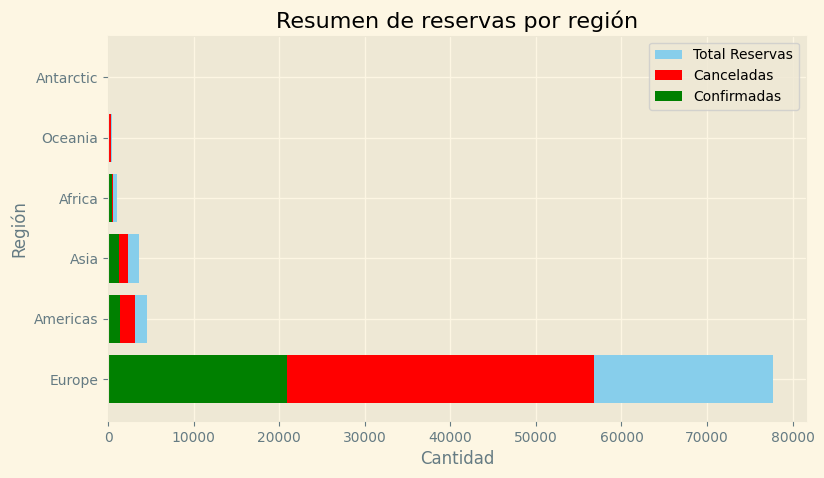

In [87]:
# Agrupar por región y sumar las reservas
df_resumen = df_paises_reservas.groupby('region')[['total_reservas', 'canceladas', 'confirmadas']].sum().reset_index().sort_values(by='total_reservas', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(figsize_default))
plt.barh(df_resumen['region'], df_resumen['total_reservas'], color='skyblue', label='Total Reservas')
plt.barh(df_resumen['region'], df_resumen['canceladas'], color='red', label='Canceladas')
plt.barh(df_resumen['region'], df_resumen['confirmadas'], color='green', label='Confirmadas')

plt.xlabel('Cantidad')
plt.ylabel('Región')
plt.title('Resumen de reservas por región')
plt.legend()
plt.show()

Utilizando este último gráfico de barras, se ha podido discernir la necesidad de enfocar esfuerzos en la penetración de los mercados asiáticos y americanos con miras a incrementar su presencia en futuras estrategias. De manera reveladora, se constata una equitativa proporción de indicadores entre reservas concretadas y canceladas en estos dos continentes, evidenciando la complejidad y la igualdad de oportunidades en dichos mercados.

**Conclusiones**

1. A pesar de que los europeos lideran en número de reservas, es importante destacar que también son los responsables de una proporción significativa de cancelaciones.

2. Europa se posiciona como el principal mercado emisor de turistas, dominando el ranking con una abrumadora representación del 90%.

3. Existe una brecha considerable entre el país líder en emisión de turistas y el segundo clasificado, con el líder triplicando la cantidad de visitantes.

4. El análisis del Average Daily Rate (ADR) en relación con el Total de Pasajeros revela la presencia de valores atípicos. A pesar de ello, se observa una estabilidad en el valor cuando el número de pasajeros por reserva es inferior a 10. Se sugiere investigar más a fondo las razones detrás de estas fluctuaciones.

## Reservas canceladas

Comparativa de la relación entre la característica '**is_canceled**' ( cuando el valor es '0', no cancelada ) y la característica 'mes de reserva'.

Ranking Top 10 de paises con mayor número de cancelaciones


In [88]:
df_paises_reservas.sort_values(by='canceladas', ascending=False)\
                  [['name', 'canceladas']].head(10)\
                  .style.hide_index()\
                  .background_gradient(cmap='Reds',
                                       subset=['canceladas'])

Crea una panel con los 10 principales países ordenado por el **total de reservas**.

In [89]:
df = df_paises_reservas.sort_values(by='total_reservas', ascending=False).head(10)[['name', 'canceladas', 'confirmadas','total_reservas']]
df

name  canceladas  confirmadas  total_reservas
134        Portugal     17987.0       9808.0         27795.0
58   United Kingdom      8439.0       1984.0         10423.0
55           France      7091.0       1732.0          8823.0
50            Spain      5382.0       1862.0          7244.0
42          Germany      4332.0       1053.0          5385.0
80            Italy      1986.0       1075.0          3061.0
75          Ireland      2347.0        668.0          3015.0
15          Belgium      1670.0        411.0          2081.0
25           Brazil      1266.0        727.0          1993.0
122     Netherlands      1560.0        350.0          1910.0

Muestra el gráfico de barras de reservas totales por país, indicando reservas confirmadas y canceladas.

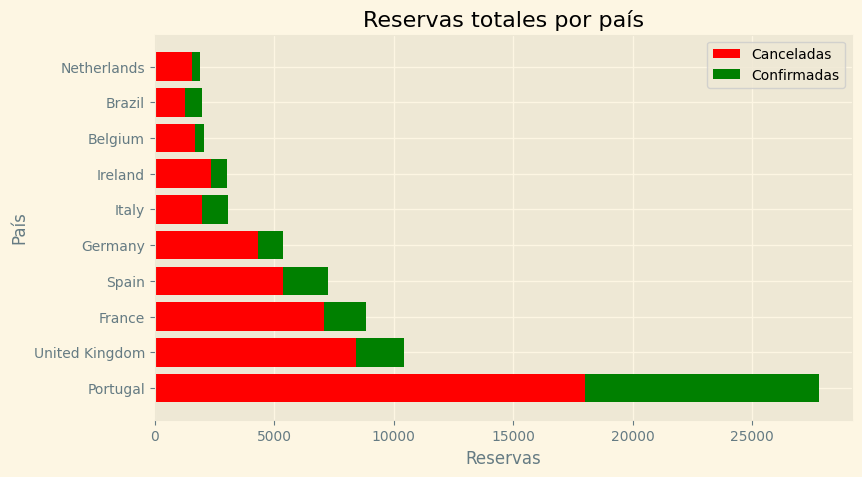

In [90]:
plt.figure(figsize=(figsize_default))
plt.barh(df['name'], df['canceladas'], label='Canceladas', color='red')
plt.barh(df['name'], df['confirmadas'], left=df['canceladas'], label='Confirmadas', color='green')

plt.xlabel('Reservas')
plt.ylabel('País')
plt.title('Reservas totales por país')
plt.legend()
plt.show()

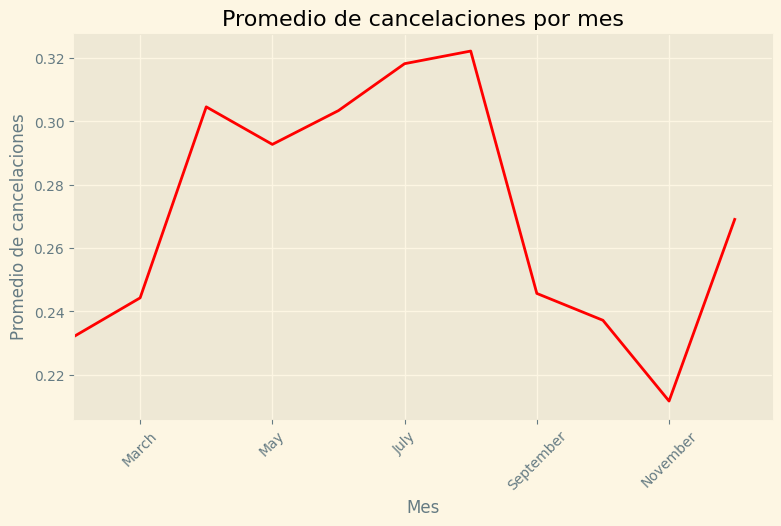

In [91]:
df_reservas['arrival_date_month'] = pd.Categorical(df_reservas['arrival_date_month'],
                                                   categories=orden_meses.keys(),
                                                   ordered=True)
df_reservas = df_reservas.sort_values('arrival_date_month')

df_cancelaciones_por_mes = df_reservas.groupby('arrival_date_month')['is_canceled'].mean().copy()

plt.figure(figsize=(figsize_default))
df_cancelaciones_por_mes.plot(kind='line', color='red')
plt.title('Promedio de cancelaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de cancelaciones')
plt.xticks(rotation=45)
plt.xlim(left=1)
plt.show()

El promedio de cancelaciones por mes calendario permite identificar los meses con mayor número de estas. Para ello, se considera el mes de la cancelación como el mes de arribo, independientemente de la fecha en la que se realizó la cancelación.


**Conclusiones**


* Considerando que la muestra no abarca años calendario completos, es fundamental reconocer que este análisis es puramente descriptivo y no puede extrapolarse como un reflejo absoluto de la realidad.

* Se observa que, en promedio, la mayor cantidad de cancelaciones ocurre durante los meses de abril a junio, señalando un período de mayor volatilidad en las reservas.

* Por otro lado, entre los meses de septiembre y marzo, se aprecia una disminución en el número de cancelaciones, evidenciando una tendencia a la estabilidad durante este período.


## Tiempo de demora

Relación entre la variable '**lead_time**' y la variable '**is_canceled**' cuando no es una cancelación.

Text(0.5, 1.0, 'Diferencia de días entre la reserva y el check-in')

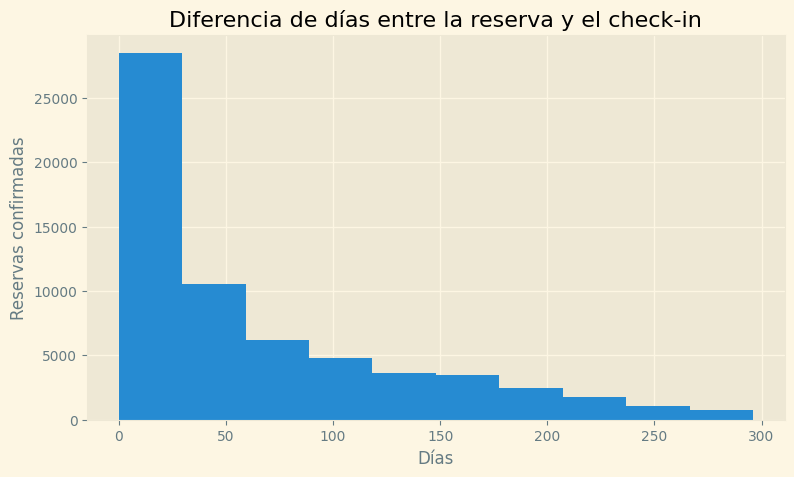

In [92]:
df_histograma = df_reservas[df_reservas['is_canceled'] == 0][['is_canceled', 'lead_time']].copy()

fig, ax = plt.subplots(figsize=(figsize_default))
ax.hist(x= df_histograma['lead_time'], bins=None, density=False, orientation='vertical')
ax.set_xlabel('Días')
ax.set_ylabel('Reservas confirmadas')
ax.set_title('Diferencia de días entre la reserva y el check-in')

**Conclusiones**

El análisis del DataFrame muestra que el 75% de las reservas se utilizan dentro de los 112 días posteriores a su creación. La media de días para efectivizar una reserva es de 71. Podemos determinar que la mayor cantidad de reservas, son para viajes espontaneos o con escasa planificación de largo plazo.


*   Más de la mitad de las reservas tienen un tiempo de espera menor a los 90 días.
*   Pocas reservas que se ejecutan, superan el año de antelación, por lo cual se infiere que pocas personas planifican sus reservas con más de seis meses de antelación.
*   Se detectan valores outliers cuando el tiempo de arribo supera los 300 días de diferencia entre la reserva y el check-in.

## Distribución de adultos-mes de reserva

Determinar la relación entre las variables '**mes_arribo_numero**', '**adults**' y '**adr**'.


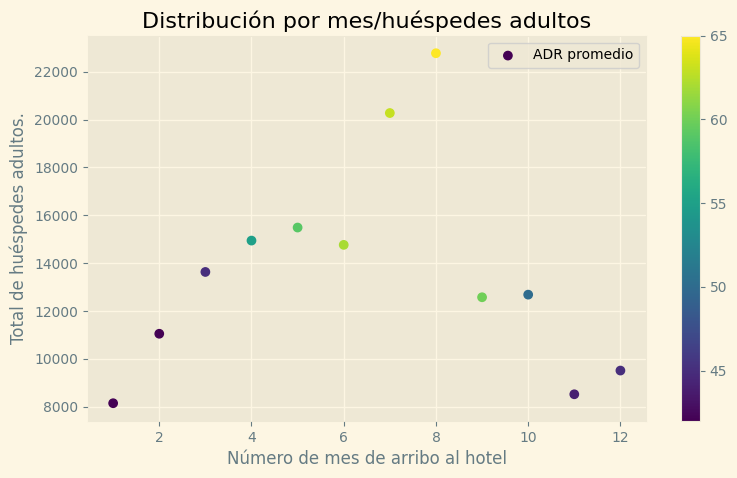

In [93]:
fig, ax = plt.subplots(figsize=(figsize_default))

# Agrupar por 'mes_arribo_numero' y sumar 'adults' y calcular la media de 'adr'
df_distribucion = df_reservas.groupby('mes_arribo_numero')[['adults', 'adr']].sum().reset_index()
df_distribucion['promedio'] = (df_distribucion['adr'] / df_distribucion['adults']).round(0)

# Graficar la dispersión y asignar el mapeo de colores
mapeo_colores = ax.scatter(df_distribucion['mes_arribo_numero'], df_distribucion['adults'],
                           c=df_distribucion['promedio'], alpha=1, label="ADR promedio")
fig.colorbar(mapeo_colores, ax=ax)

# Mostrar la leyenda
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

# Establecer título y etiquetas de los ejes
ax.set_title('Distribución por mes/huéspedes adultos')
ax.set_xlabel('Número de mes de arribo al hotel')
ax.set_ylabel('Total de huéspedes adultos.')

plt.show()


**Conclusiones**

* Al analizar la distribución del total de adultos por mes de arribo y valor del ADR, se observa que los importes más bajos se registran durante el fin del otoño europeo y el comienzo del invierno, comprendiendo los meses entre **noviembre** y **enero**.

* En febrero comienza a subir el valor promedio del ADR, ya que comienza la primavera en **Europa**.

*   El ADR se ve influenciado dado el mayor número de huéspedes, pero aún más cuando se trata de los meses de **julio** y **agosto**, especialmente.
*   Los meses septiembre y octubre, parecen ser meses en donde se realizan reservas para grupos mayores a 20 huspedes por reserva.


## Relación ADR-Mes/Año de arribo

Busca la relación entre el promedio de la característica 'ADR' y las características '**arrival_date_year**' y '**arrival_date_month**'.


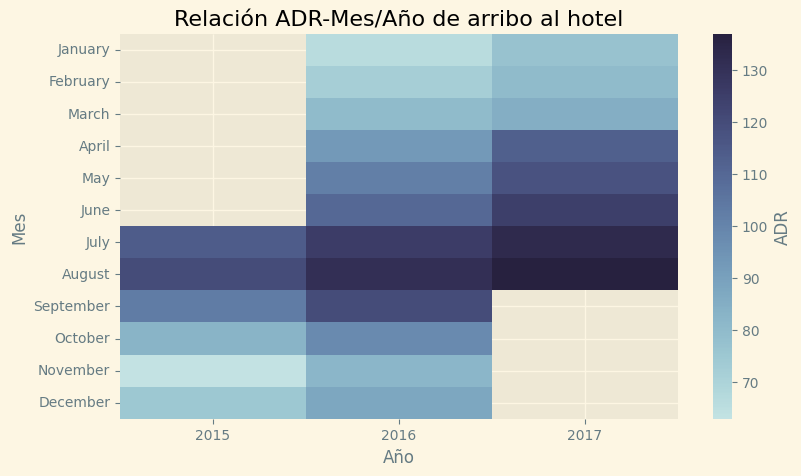

In [94]:
# Calcular el promedio de adr por año y mes
df_totales_year_month = df_reservas.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].mean().reset_index()
df_totales_year_month['adr'] = df_totales_year_month['adr'].round(0)

# Pivotear los datos para el gráfico de calor
df_totales_year_month = df_totales_year_month.pivot(index="arrival_date_month",
                                                    columns="arrival_date_year",
                                                    values="adr")

plt.figure(figsize=(figsize_default))
sns.heatmap(df_totales_year_month, cmap=sns.color_palette("ch:start=.2,rot=-.3",
                                                          as_cmap=True))

plt.xlabel("Año")
plt.ylabel("Mes")
plt.title("Relación ADR-Mes/Año de arribo al hotel")

colorbar = plt.gca().collections[0].colorbar
colorbar.set_label('ADR')

plt.show()

Gracias a este análisis, se logra apreciar que existen datos acotados en el dataframe para ser comparados en mayor detalle, pudiendo ser por mes, día o semana. Los meses de julio y agosto tienen tres períodos de datos completos.

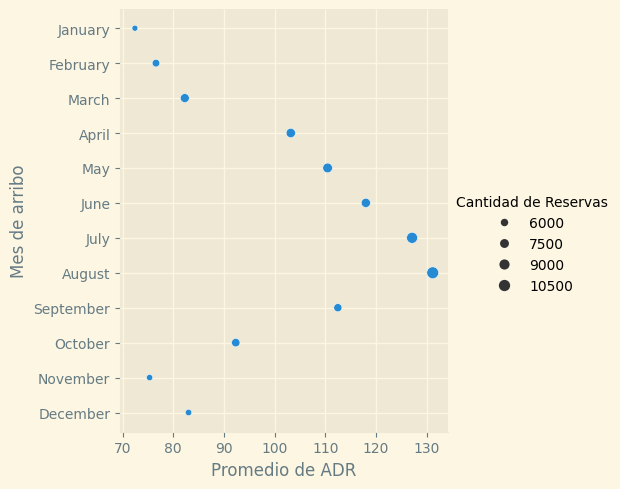

In [95]:
# Agrupar por mes de llegada y calcular cantidad de reservas y promedio de ADR
df_agrupado = df_reservas.groupby('arrival_date_month').agg({'hotel': 'count', 'adr': 'mean'}).reset_index()
df_agrupado = df_agrupado.rename(columns={'hotel': 'Cantidad de Reservas', 'adr': 'Promedio de ADR'})

g = sns.relplot(data=df_agrupado, x="Promedio de ADR", y="arrival_date_month",
                size="Cantidad de Reservas", legend="auto", height=5)

g.set_axis_labels("Promedio de ADR", "Mes de arribo")
plt.show()

## Noches de estadía y servicio de comida

Se analiza la relación entre la características '**hotel**', '**mes_arribo_numero**' y '**stays_in_week_nights**'

Además, se busca establecer la relación entre '**meal**' y '**customer_type**'.

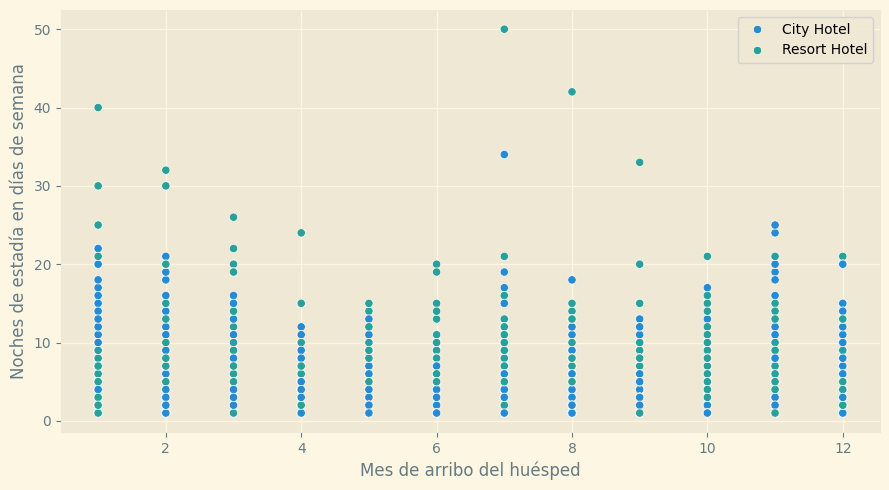

In [96]:
# Filtrar reservas con al menos una noche de estadía en días de semana
df_noches = df_reservas[df_reservas['stays_in_week_nights'] > 0][['mes_arribo_numero', 'stays_in_week_nights', 'hotel']]

# Crear el gráfico de dispersión
fig, ax = plt.subplots(figsize=(figsize_default))
sns.scatterplot(data = df_noches,
                x="mes_arribo_numero",
                y="stays_in_week_nights", hue="hotel", ax=ax)

ax.set_xlabel("Mes de arribo del huésped")
ax.set_ylabel("Noches de estadía en días de semana")
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

fig.tight_layout()
plt.show()

Se observa una tendencia creciente desde principios de año, que se corrige hacia la baja a partir de octubre. Comprobamos que en cada mes, la cantidad de reservas de hoteles del tipo city, supera a las reservas resort.


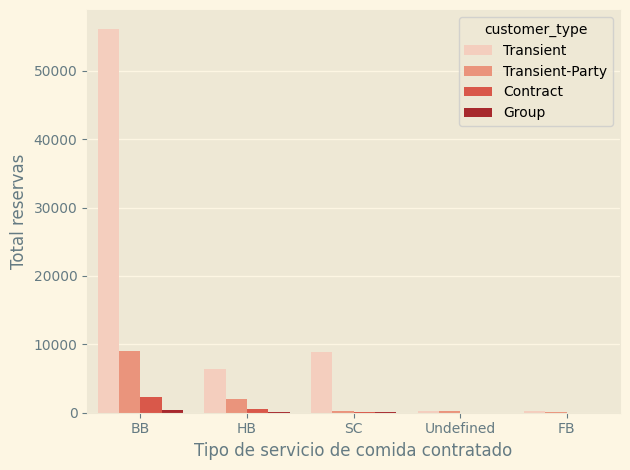

In [97]:
df_meals = df_reservas[['customer_type', 'meal']].copy()

sns.countplot(data= df_meals, x="meal", hue="customer_type", palette="Reds")
plt.xlabel("Tipo de servicio de comida contratado")
plt.ylabel("Total reservas")
plt.tight_layout()
plt.show()

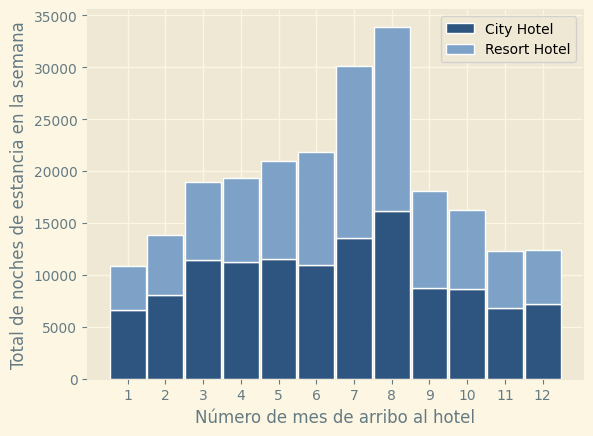

In [98]:
# Agrupar por mes de arribo y tipo de hotel, y sumar las noches de estancia en días de semana
df_agrupado = df_reservas.groupby(['mes_arribo_numero', 'hotel'])['stays_in_week_nights'].sum().reset_index()

# Pivotar los datos para tener un formato adecuado para el gráfico de barras
df_pivotado = df_agrupado.pivot(index='mes_arribo_numero',
                                columns='hotel',
                                values='stays_in_week_nights').reset_index()

fig, ax = plt.subplots()
plt.rcParams['axes.labelweight'] = 'bold'

# Definir las variables para las barras
bars1 = df_pivotado['City Hotel']
bars2 = df_pivotado['Resort Hotel']
r = df_pivotado['mes_arribo_numero']
barWidth = 0.95

plt.bar(r, bars1, color= color_barra_city, edgecolor='white', width=barWidth, label='City Hotel')
plt.bar(r, bars2, bottom=bars1, color= color_barra_resort, edgecolor='white', width=barWidth, label='Resort Hotel')

plt.xlabel("Número de mes de arribo al hotel")
plt.ylabel("Total de noches de estancia en la semana")
plt.xticks(r, df_pivotado['mes_arribo_numero'])
plt.legend()

plt.show()

**Conclusiones**

*   Julio y agosto son los meses donde más noches de semana del tipo hotel resort se realizan.
*   El servicio de comida más solicitado por el tipo de cliente en tránsito (eventual), es el servicio que únicamente incluye desayuno (BB).

## Pasajeros

Realiza un análisis de los pasajeros de las reservas, aprovechando las nuevas características que fueron generadas durante el proceso de ingeniería de características

In [99]:
df_pasajeros = df_reservas.groupby('grupo_pasajeros').size().apply(lambda x: 100 * x / len(df_reservas))
df_pasajeros.sort_values(ascending=False)

grupo_pasajeros
parejas               64.869296
solteros              18.415501
grupos                 6.891768
familia_chica          5.170832
familia_mediana        4.033479
solteros_con_hijos     0.498739
familia_grande         0.120385
dtype: float64

Vemos que dos grupos componen el ~84 % de todas las reservas del dataframe.

Calcula el porcentaje de reservas por grupo de pasajeros y tipo de hotel.

In [100]:
# Agrupa las reservas por tipo de hotel y calcula el porcentaje correspondiente a cada uno.
df_pasajeros_hoteles = df_reservas.groupby('grupo_pasajeros').agg(
    hotel_Resort_Hotel=pd.NamedAgg(column='hotel', aggfunc=lambda x: 100 * len(x[x == 'Resort Hotel']) / len(x)),
    hotel_City_Hotel=pd.NamedAgg(column='hotel', aggfunc=lambda x: 100 * len(x[x == 'City Hotel']) / len(x)),
)
df_pasajeros_hoteles

hotel_Resort_Hotel  hotel_City_Hotel
grupo_pasajeros                                         
familia_chica                37.317073         62.682927
familia_grande               24.761905         75.238095
familia_mediana              46.219443         53.780557
grupos                       23.706538         76.293462
parejas                      40.948055         59.051945
solteros                     36.664176         63.335824
solteros_con_hijos           30.574713         69.425287

Realiza un gráfico de barras agrupadas mostrando como se distribuyen (en porcentajes) las reservas según el tipo de hotel y el grupo de pasajeros.

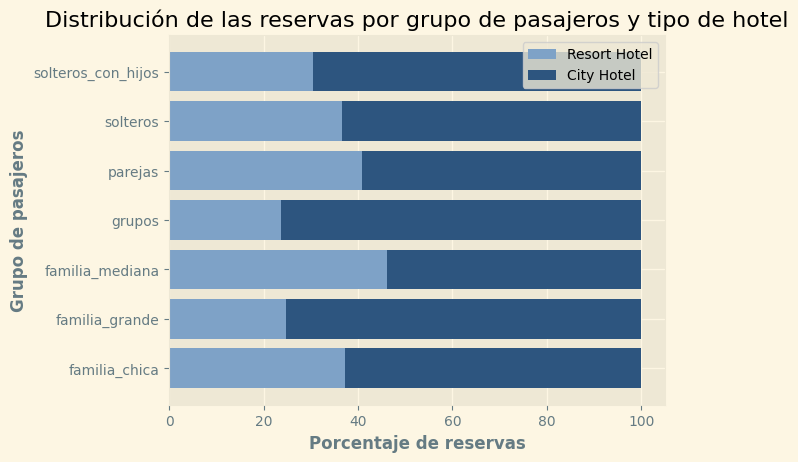

In [101]:
plt.barh(df_pasajeros_hoteles.index, df_pasajeros_hoteles['hotel_Resort_Hotel'],
         color= color_barra_resort, label='Resort Hotel')
plt.barh(df_pasajeros_hoteles.index, df_pasajeros_hoteles['hotel_City_Hotel'],
         left=df_pasajeros_hoteles['hotel_Resort_Hotel'],
         color= color_barra_city, label='City Hotel')

plt.xlabel('Porcentaje de reservas')
plt.ylabel('Grupo de pasajeros')
plt.title('Distribución de las reservas por grupo de pasajeros y tipo de hotel')

plt.legend()
plt.show()

Se contempla una amplia mayoría de reservas en hoteles del tipo 'ciudad' en la mayoría de los grupos de pasajeros.

In [102]:
# Calcular el promedio de ADR para cada grupo de pasajeros y tipo de hotel en una sola línea
df_pasajeros_hoteles = df_reservas.pivot_table(index='grupo_pasajeros', columns='hotel', values='adr', aggfunc='mean')

# Resetear el índice para tener 'grupo_pasajeros' como una columna en lugar de índice
df_pasajeros_hoteles.reset_index(inplace=True)
df_pasajeros_hoteles

hotel     grupo_pasajeros  City Hotel  Resort Hotel
0           familia_chica  127.891730    121.319424
1          familia_grande  114.864177    123.338846
2         familia_mediana  147.957976    131.315990
3                  grupos  146.952963    128.759923
4                 parejas  105.795156     93.380953
5                solteros   96.804950     59.184272
6      solteros_con_hijos  119.947086    118.217744

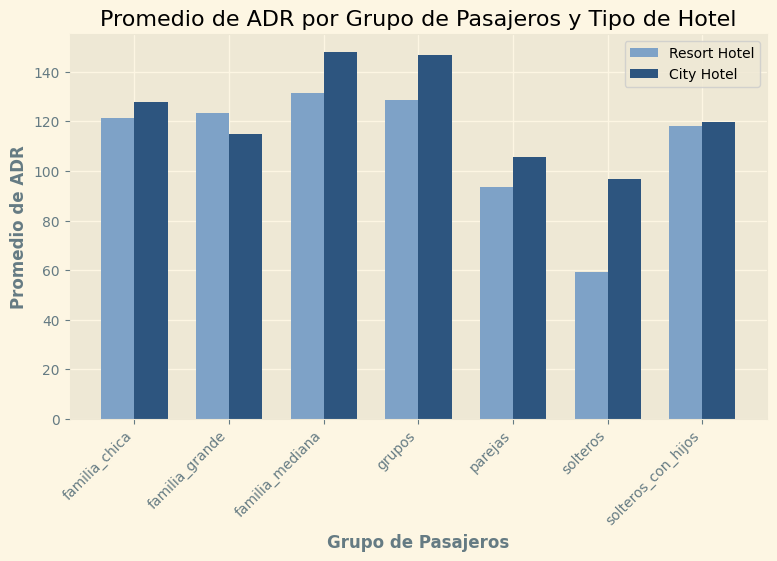

In [105]:
# Obtener los grupos de pasajeros y los promedios de ADR por tipo de hotel
grupos_pasajeros = df_pasajeros_hoteles['grupo_pasajeros']
promedio_adr_resort = df_pasajeros_hoteles['Resort Hotel']
promedio_adr_city = df_pasajeros_hoteles['City Hotel']

# Configurar la posición de las barras
bar_width = 0.35
index = np.arange(len(grupos_pasajeros))

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(figsize_default))

# Graficar las barras para Resort Hotel
ax.bar(index, promedio_adr_resort, bar_width, color = color_barra_resort, label='Resort Hotel')

# Graficar las barras para City Hotel
ax.bar(index + bar_width, promedio_adr_city, bar_width, color = color_barra_city, label='City Hotel')

# Añadir etiquetas y título
ax.set_xlabel('Grupo de Pasajeros')
ax.set_ylabel('Promedio de ADR')
ax.set_title('Promedio de ADR por Grupo de Pasajeros y Tipo de Hotel')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grupos_pasajeros)
ax.legend()

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')
plt.show()

* Tras completar este análisis, se evidencia que el segmento de '**solteros**' es el que más se beneficia al seleccionar hoteles de tipo resort, ya que registran el valor promedio de ADR más bajo.
* Dentro de la categoría de '**solteros**', aquellos sin hijos presentan un promedio de gasto aproximadamente la mitad en comparación con su estadía en hoteles resort.

Muestra como están distribuidas las reservas, según la nueva característica '**grupo_pasajeros**'.

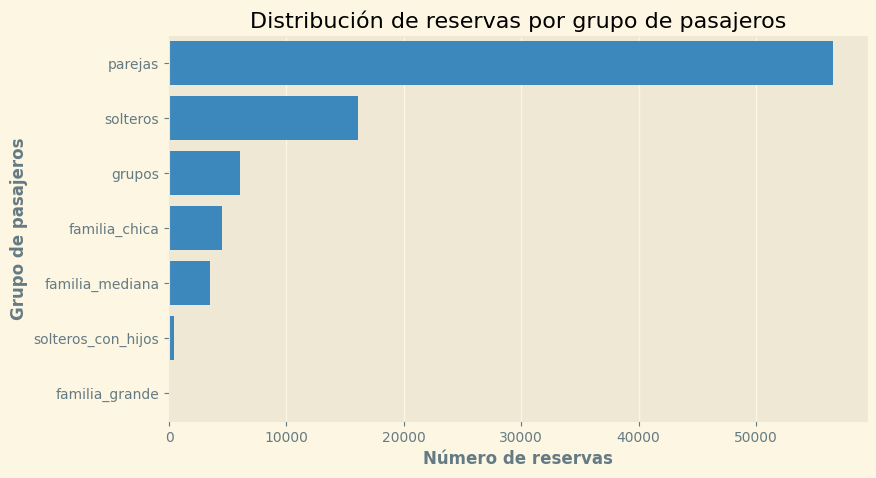

In [104]:
# Agrupar por 'grupo_pasajeros' y contar
df_grouped = df_reservas.groupby('grupo_pasajeros').size().reset_index(name='count')

# Ordenar por 'count'
df_grouped = df_grouped.sort_values(by='count', ascending=False)

# Graficar barras horizontales
plt.figure(figsize=(figsize_default))
sns.barplot(y='grupo_pasajeros', x='count', data=df_grouped)

# Añadir título y etiquetas de los ejes
plt.title('Distribución de reservas por grupo de pasajeros')
plt.xlabel('Número de reservas')
plt.ylabel('Grupo de pasajeros')
plt.show()

**Conclusiones**
* El grupo '**parejas**' es el que mayor número de reservas realiza, superando ampliamente al segundo, siendo este '**solteros**'.
* Se determina que las reservas están muy concentradas en dos grupos que representan ~84 % de todas las reservas del dataframe. Ambos grupos tienen en común que no tienen menores de edad.
* Las familias del tipo 'mediana', prefieren los hoteles del tipo Resort. Este segmente es en el único en donde se superan las reservas del tipo hotel de ciudad.

---

## Conclusiones del análisis exploratorio de datos.


*   La información relevada incluye los valores del ADR entre Julio 2015 y Agosto 2017
*   Los precios más altos se abonan durante los meses de julio y agosto, mientras que entre noviembre y febrero se encuentran las bandas de precios más bajos.
*   Se observa que el mes de agosto tiene alta demanda de reservas, por lo cual el precio ADR es más alto en comparación con el mes de enero, donde se abona el menor valor promedio por reserva.
*   Pudiendose realizar la reserva durante el mes de septiembre, se logra un ahorro promedio de 35 dólares versus el mes de agosto.

# **Selección de características**

---

El proceso de elegir un subconjunto de las características (variables o atributos) disponibles en un conjunto de datos que son más relevantes para el problema en cuestión. La selección de características tiene como objetivo mejorar la precisión y la eficiencia de los modelos de aprendizaje automático al eliminar características redundantes, irrelevantes o ruidosas.

Los métodos que a continuación aplicaremos al análisis son:
* Forward Selection
* Backward Selection
* Stepwise

### Dividir el dataframe

Divide el dataframe númerico para realizar los entrenamientos y testeos correspondientes.

In [111]:
# Deja unicamente las características númericas y toma una muestra de los datos
df_reservas_numerico = df_reservas.select_dtypes(include='number').sample(5000)

In [112]:
# X, y
X = df_reservas_numerico.drop(variable_objetivo, axis=1)
y = df_reservas_numerico[variable_objetivo]

# División de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = my_random_state)

Calcula la correlación de la característica target con todas las demás características

In [113]:
# Metodos de correlación
metodos_correlacion = ['pearson', 'kendall', 'spearman']

# Filtrar las correlaciones con valores absolutos mayores
threshold = 0.15

for metodo in metodos_correlacion:
    # Calcular la correlación de la característica target con todas las demás características
    target_correlation = df_reservas_numerico.corrwith(df_reservas_numerico[variable_objetivo], method = metodo)

    high_correlation = target_correlation[(target_correlation.abs() > threshold) & (target_correlation.index != variable_objetivo)]

    # Mostrar las correlaciones filtradas
    if (len(high_correlation)):
      print("Correlaciones de {} con valores absolutos mayores a {} utilizando el método de {} \n".format(variable_objetivo, threshold, metodo))
      high_correlation = high_correlation.sort_values(ascending=False)
      print(round(high_correlation,2))
      print()
    else:
      print("No existen correlaciones para los parametros ingresados: {} {} {} .".format(variable_objetivo, threshold, metodo))

Correlaciones de is_canceled con valores absolutos mayores a 0.15 utilizando el método de pearson 

market_segment_le              0.17
lead_time                      0.16
required_car_parking_spaces   -0.18
dtype: float64

Correlaciones de is_canceled con valores absolutos mayores a 0.15 utilizando el método de kendall 

market_segment_le              0.18
lead_time                      0.17
previous_cancellations         0.15
required_car_parking_spaces   -0.18
dtype: float64

Correlaciones de is_canceled con valores absolutos mayores a 0.15 utilizando el método de spearman 

lead_time                      0.21
market_segment_le              0.20
previous_cancellations         0.15
required_car_parking_spaces   -0.18
dtype: float64



### Matriz de correlación (Pearson)

Una forma de cuantificar la relación entre dos variables es utilizar el coeficiente de correlación de Pearson. Cuanto más lejos esté el coeficiente de correlación de cero, más fuerte será la relación entre las dos variables.

Toma un valor entre **-1** y **1** donde:

* -1 indica una correlación lineal perfectamente negativa.
* 0 indica que no hay correlación lineal.
* 1 indica una correlación lineal perfectamente positiva.

Es sensible a valores atípicos y asume una distribución normal de los datos.

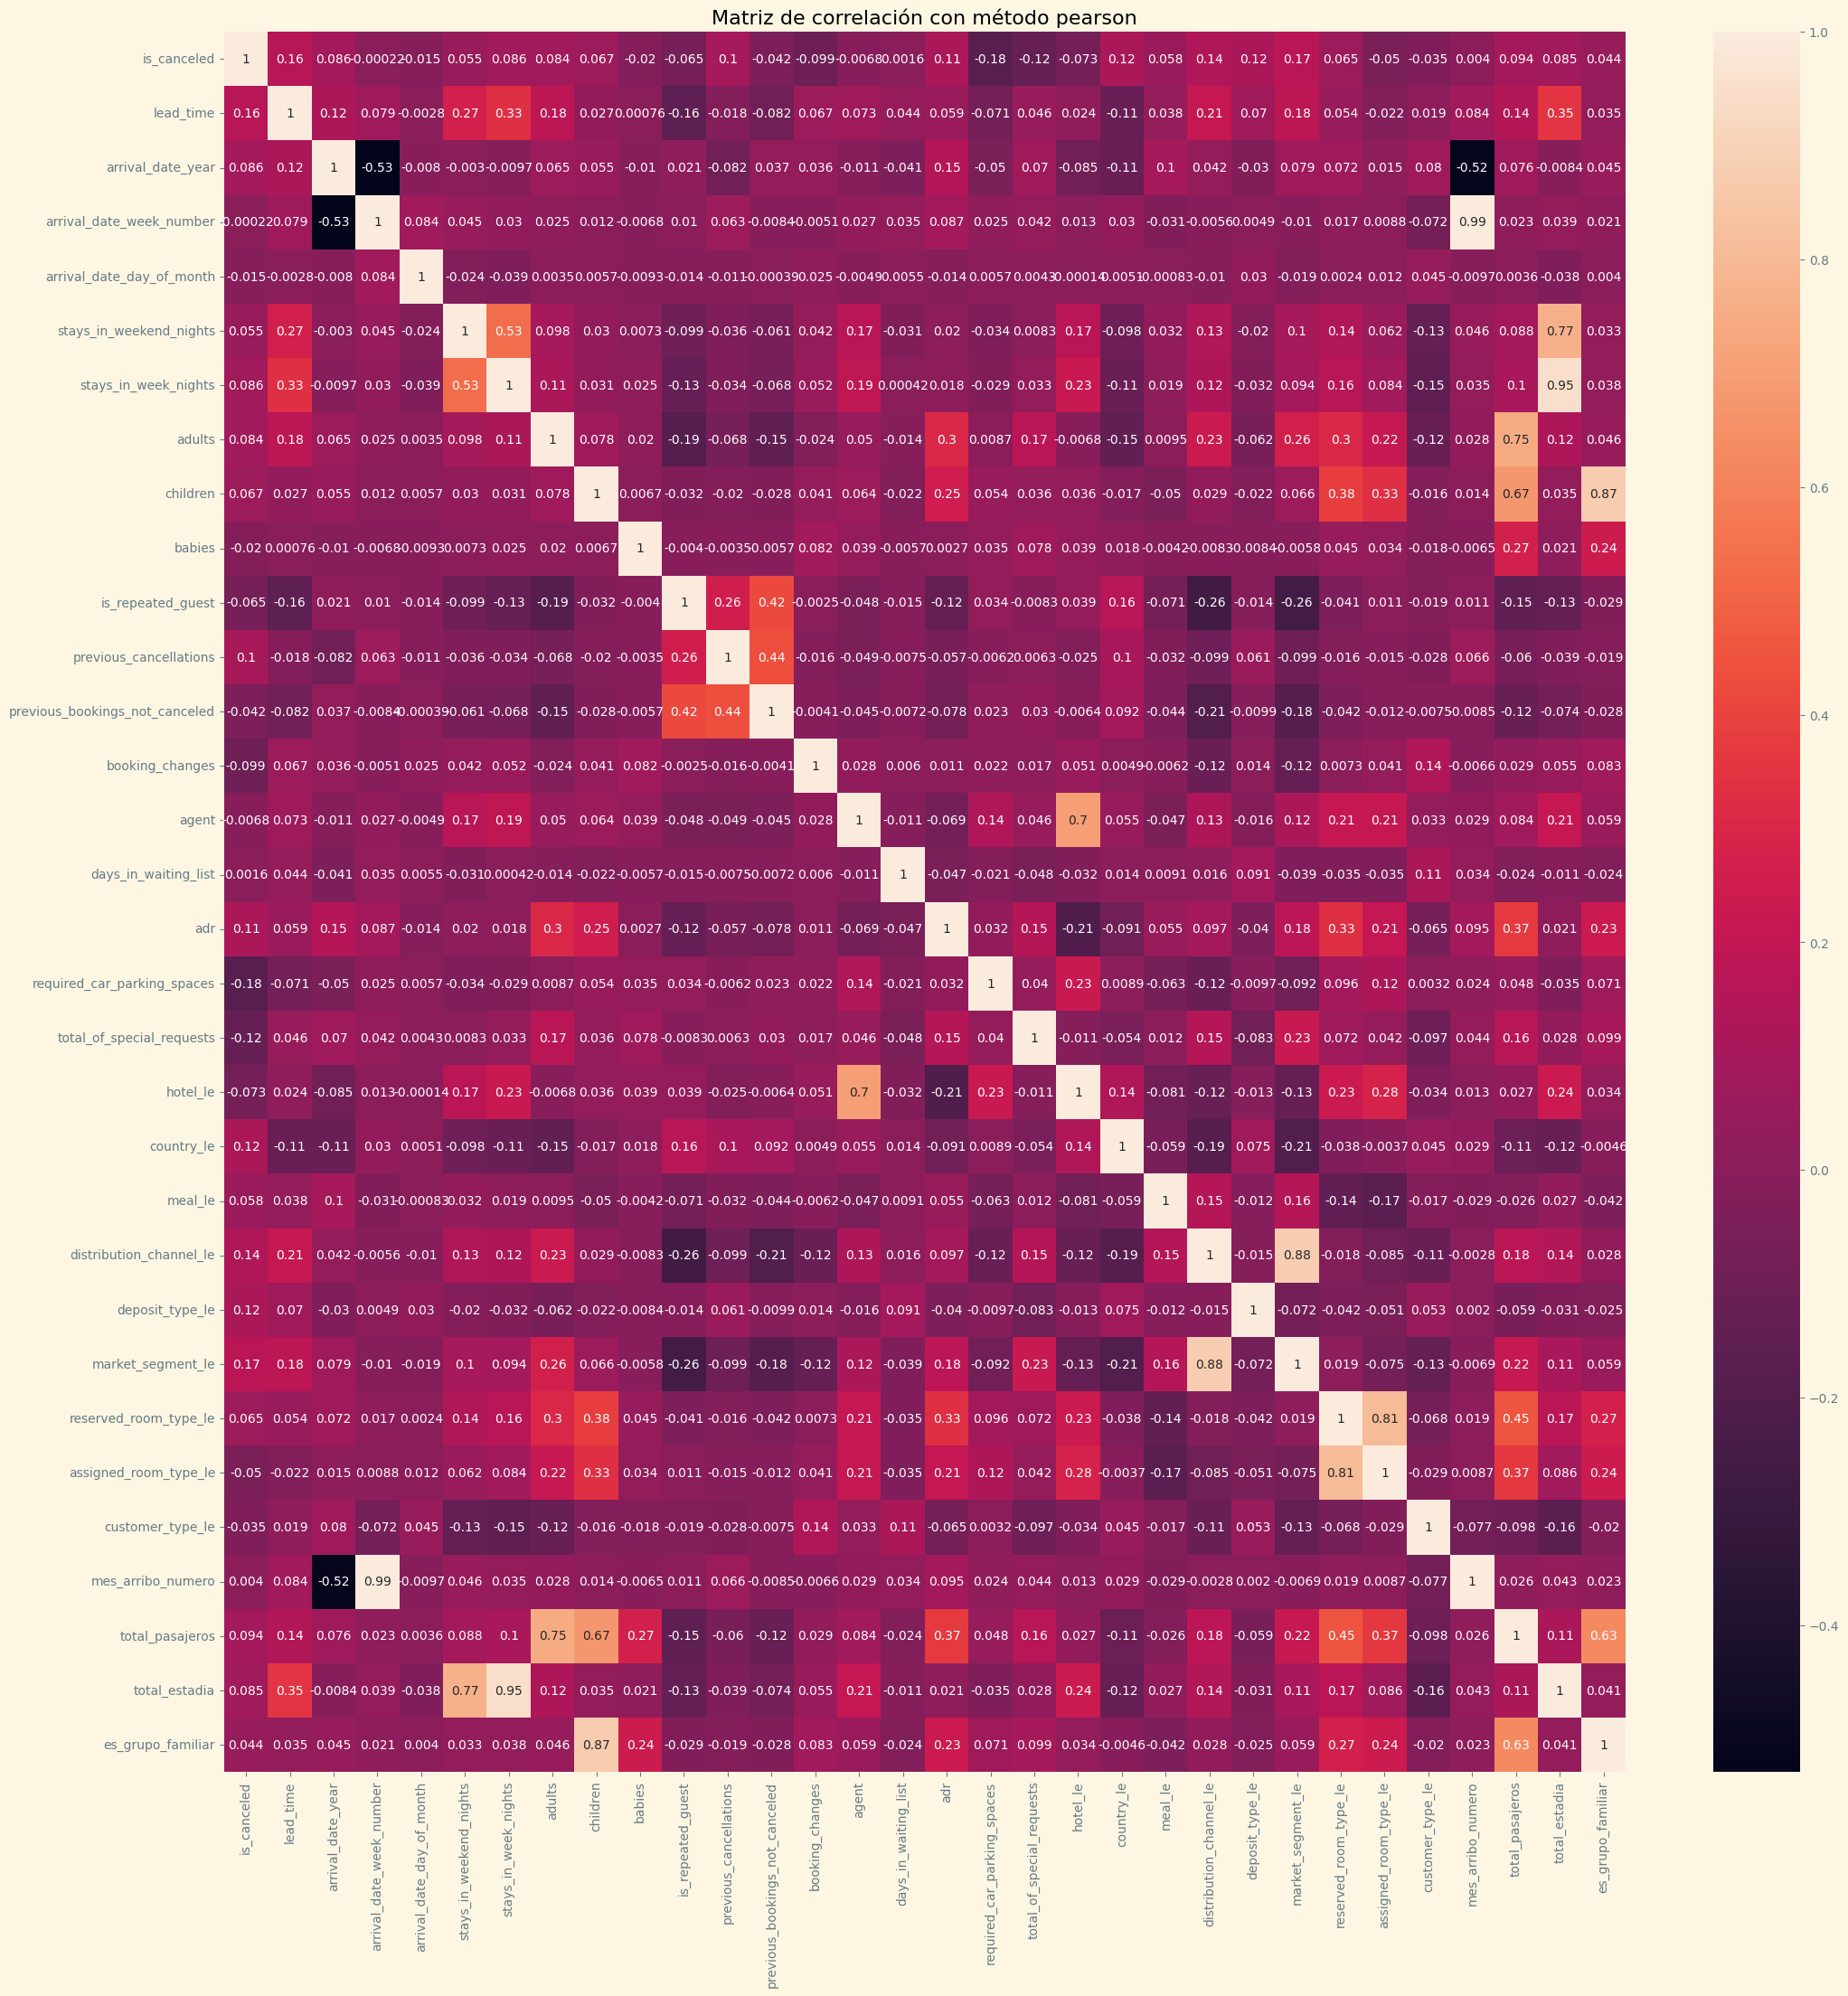

In [114]:
# Calcular la matriz de correlación de Pearson
calcular_matriz_correlacion(df_reservas_numerico, metodo= 'pearson', tamano_grafico=(25,25))

### Matriz de correlación (Spearman)

También conocida como "correlación de rango de Spearman" o "coeficiente de correlación de rango".

* Mide la relación monotónica (no necesariamente lineal) entre dos variables.
* Transforma los valores originales en rangos (números enteros que representan el orden de los valores) antes de calcular la correlación.
* Es menos sensible a valores atípicos y no asume una distribución específica de los datos.
* Puede capturar relaciones no lineales que el coeficiente de Pearson podría pasar por alto.

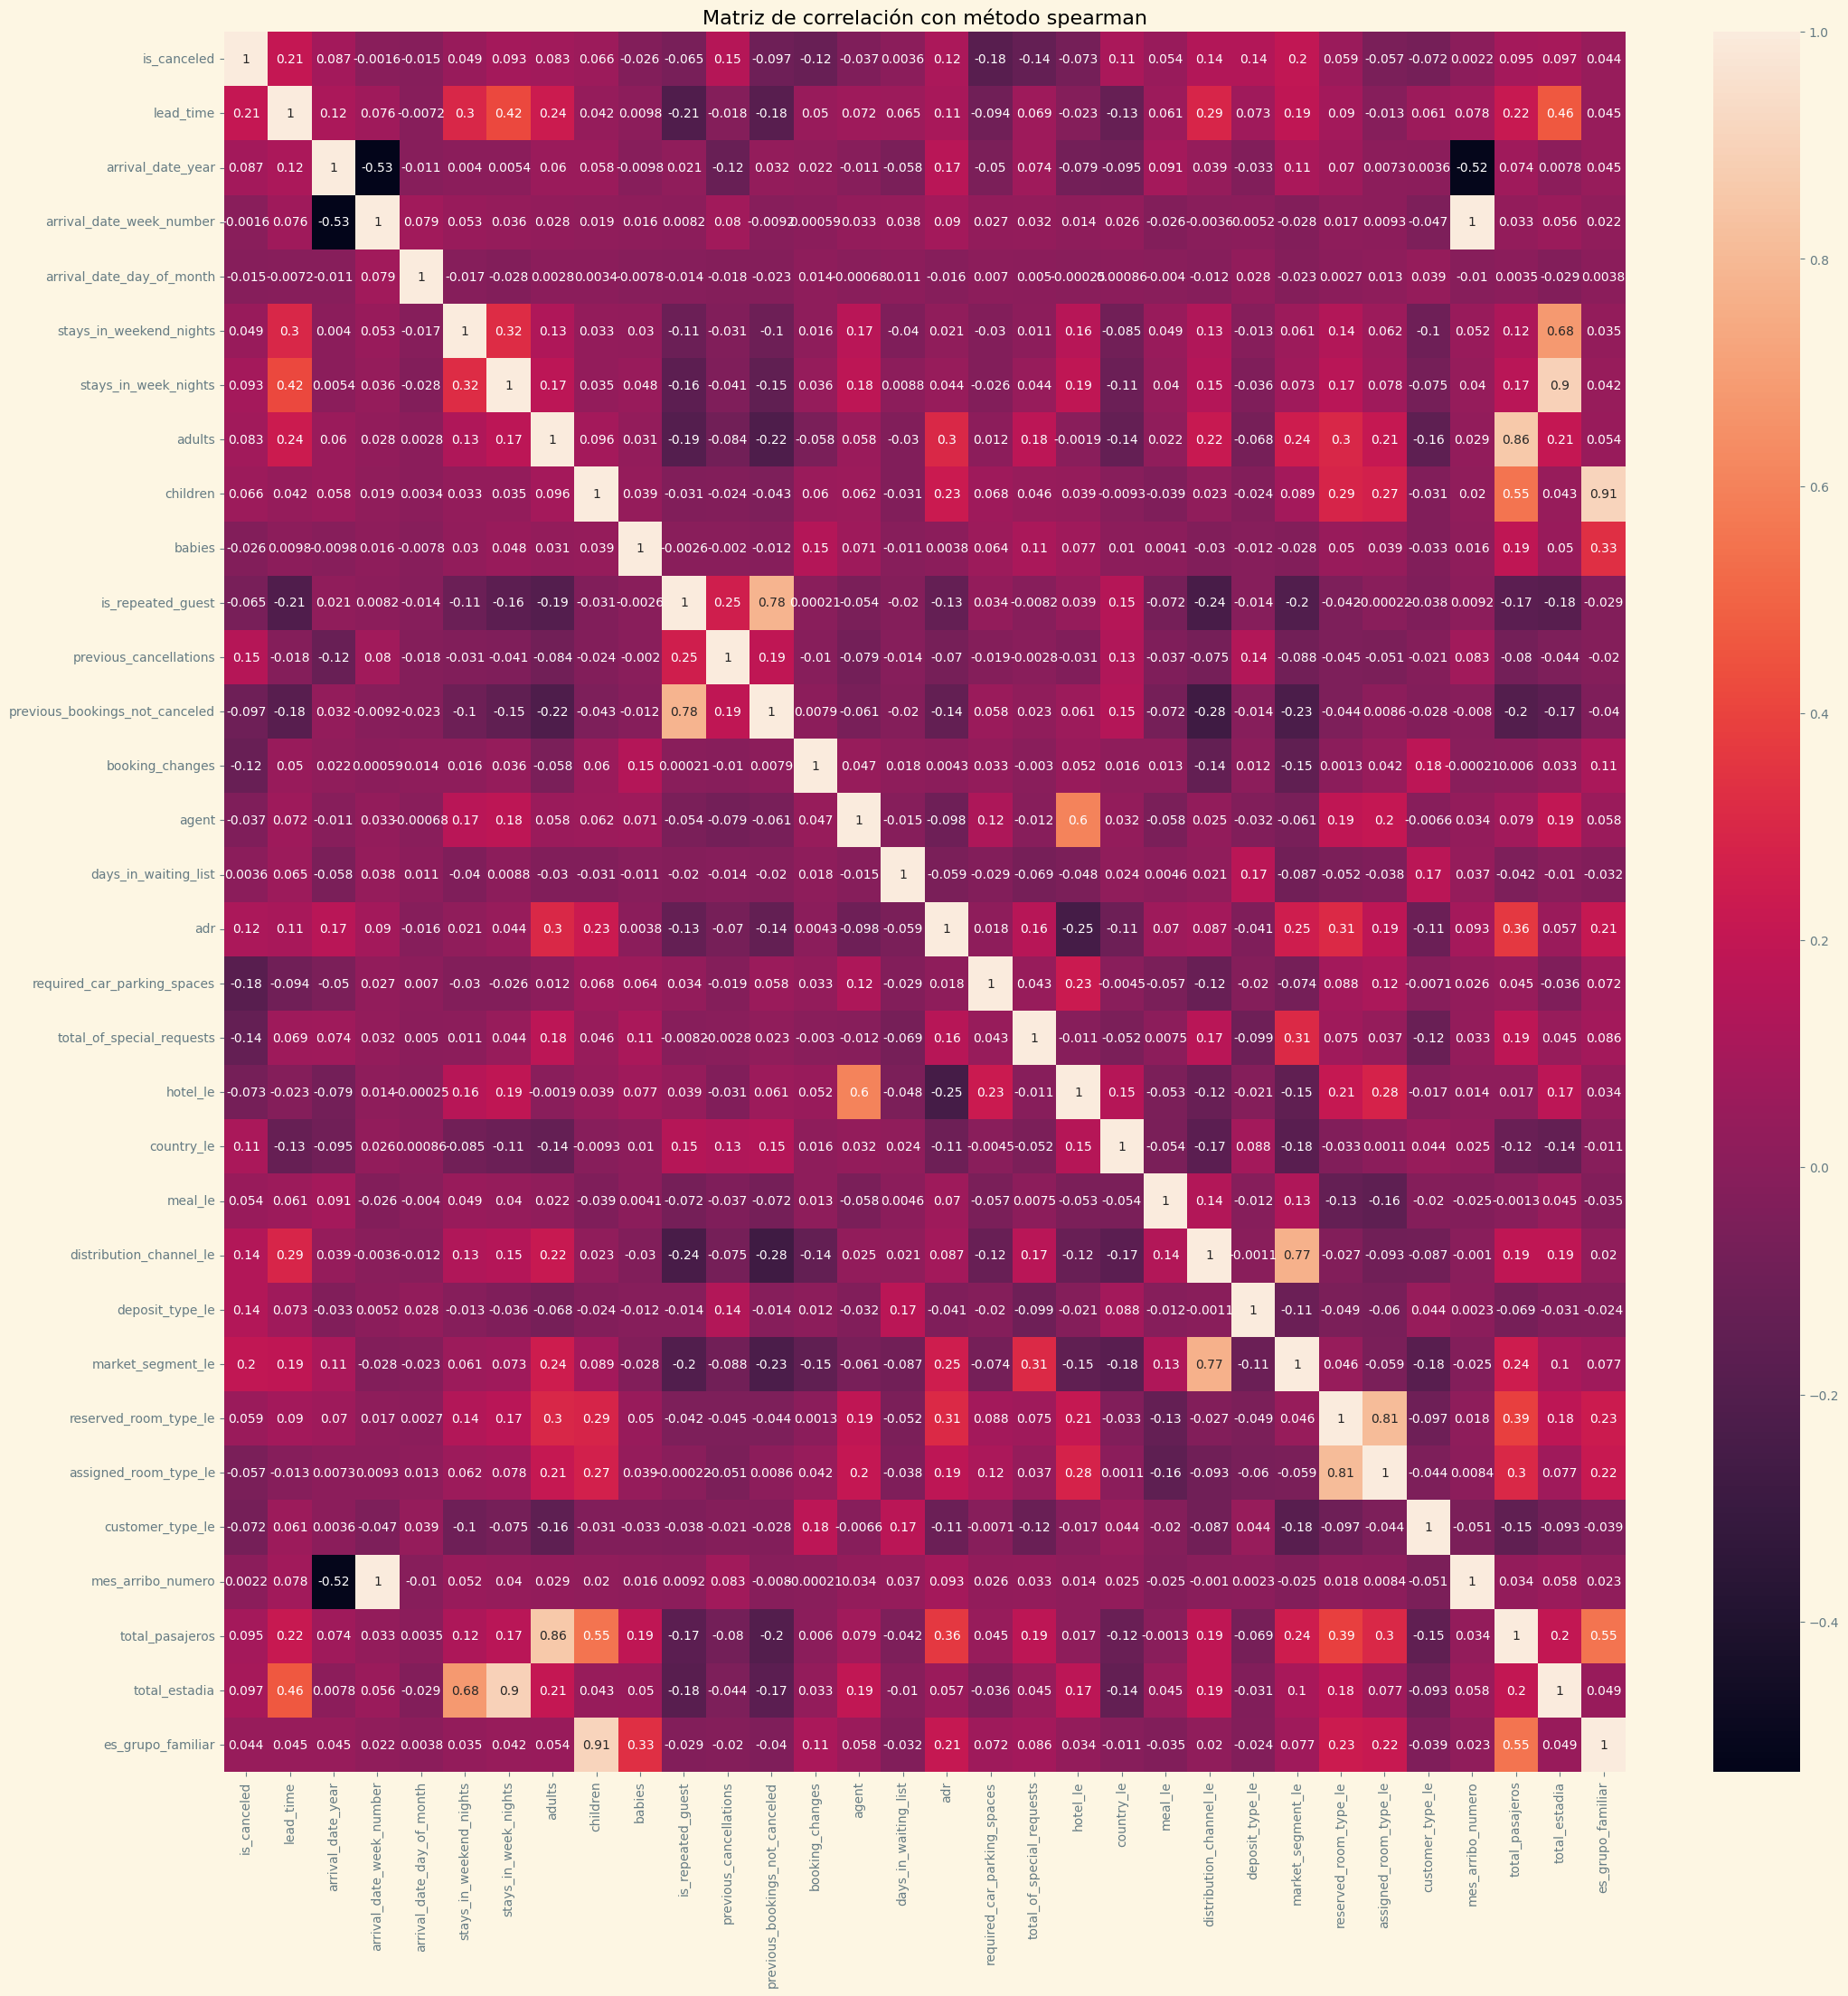

In [115]:
# Calcular la matriz de correlación de Spearman
calcular_matriz_correlacion(df_reservas_numerico ,metodo='spearman', tamano_grafico=(25,25))

### Matriz de correlación (Kendall)

También conocida como "coeficiente de concordancia de Kendall" o "tau de Kendall".
* Mide la concordancia entre las clasificaciones de dos variables.
* Se basa en la concordancia y discordancia de los pares de observaciones en las dos variables.
* A menudo se utiliza para evaluar la correlación en datos categóricos o ordinales, así como en datos continuos.
* Al igual que la correlación de Spearman, es robusta ante valores atípicos y no asume una distribución específica de los datos.

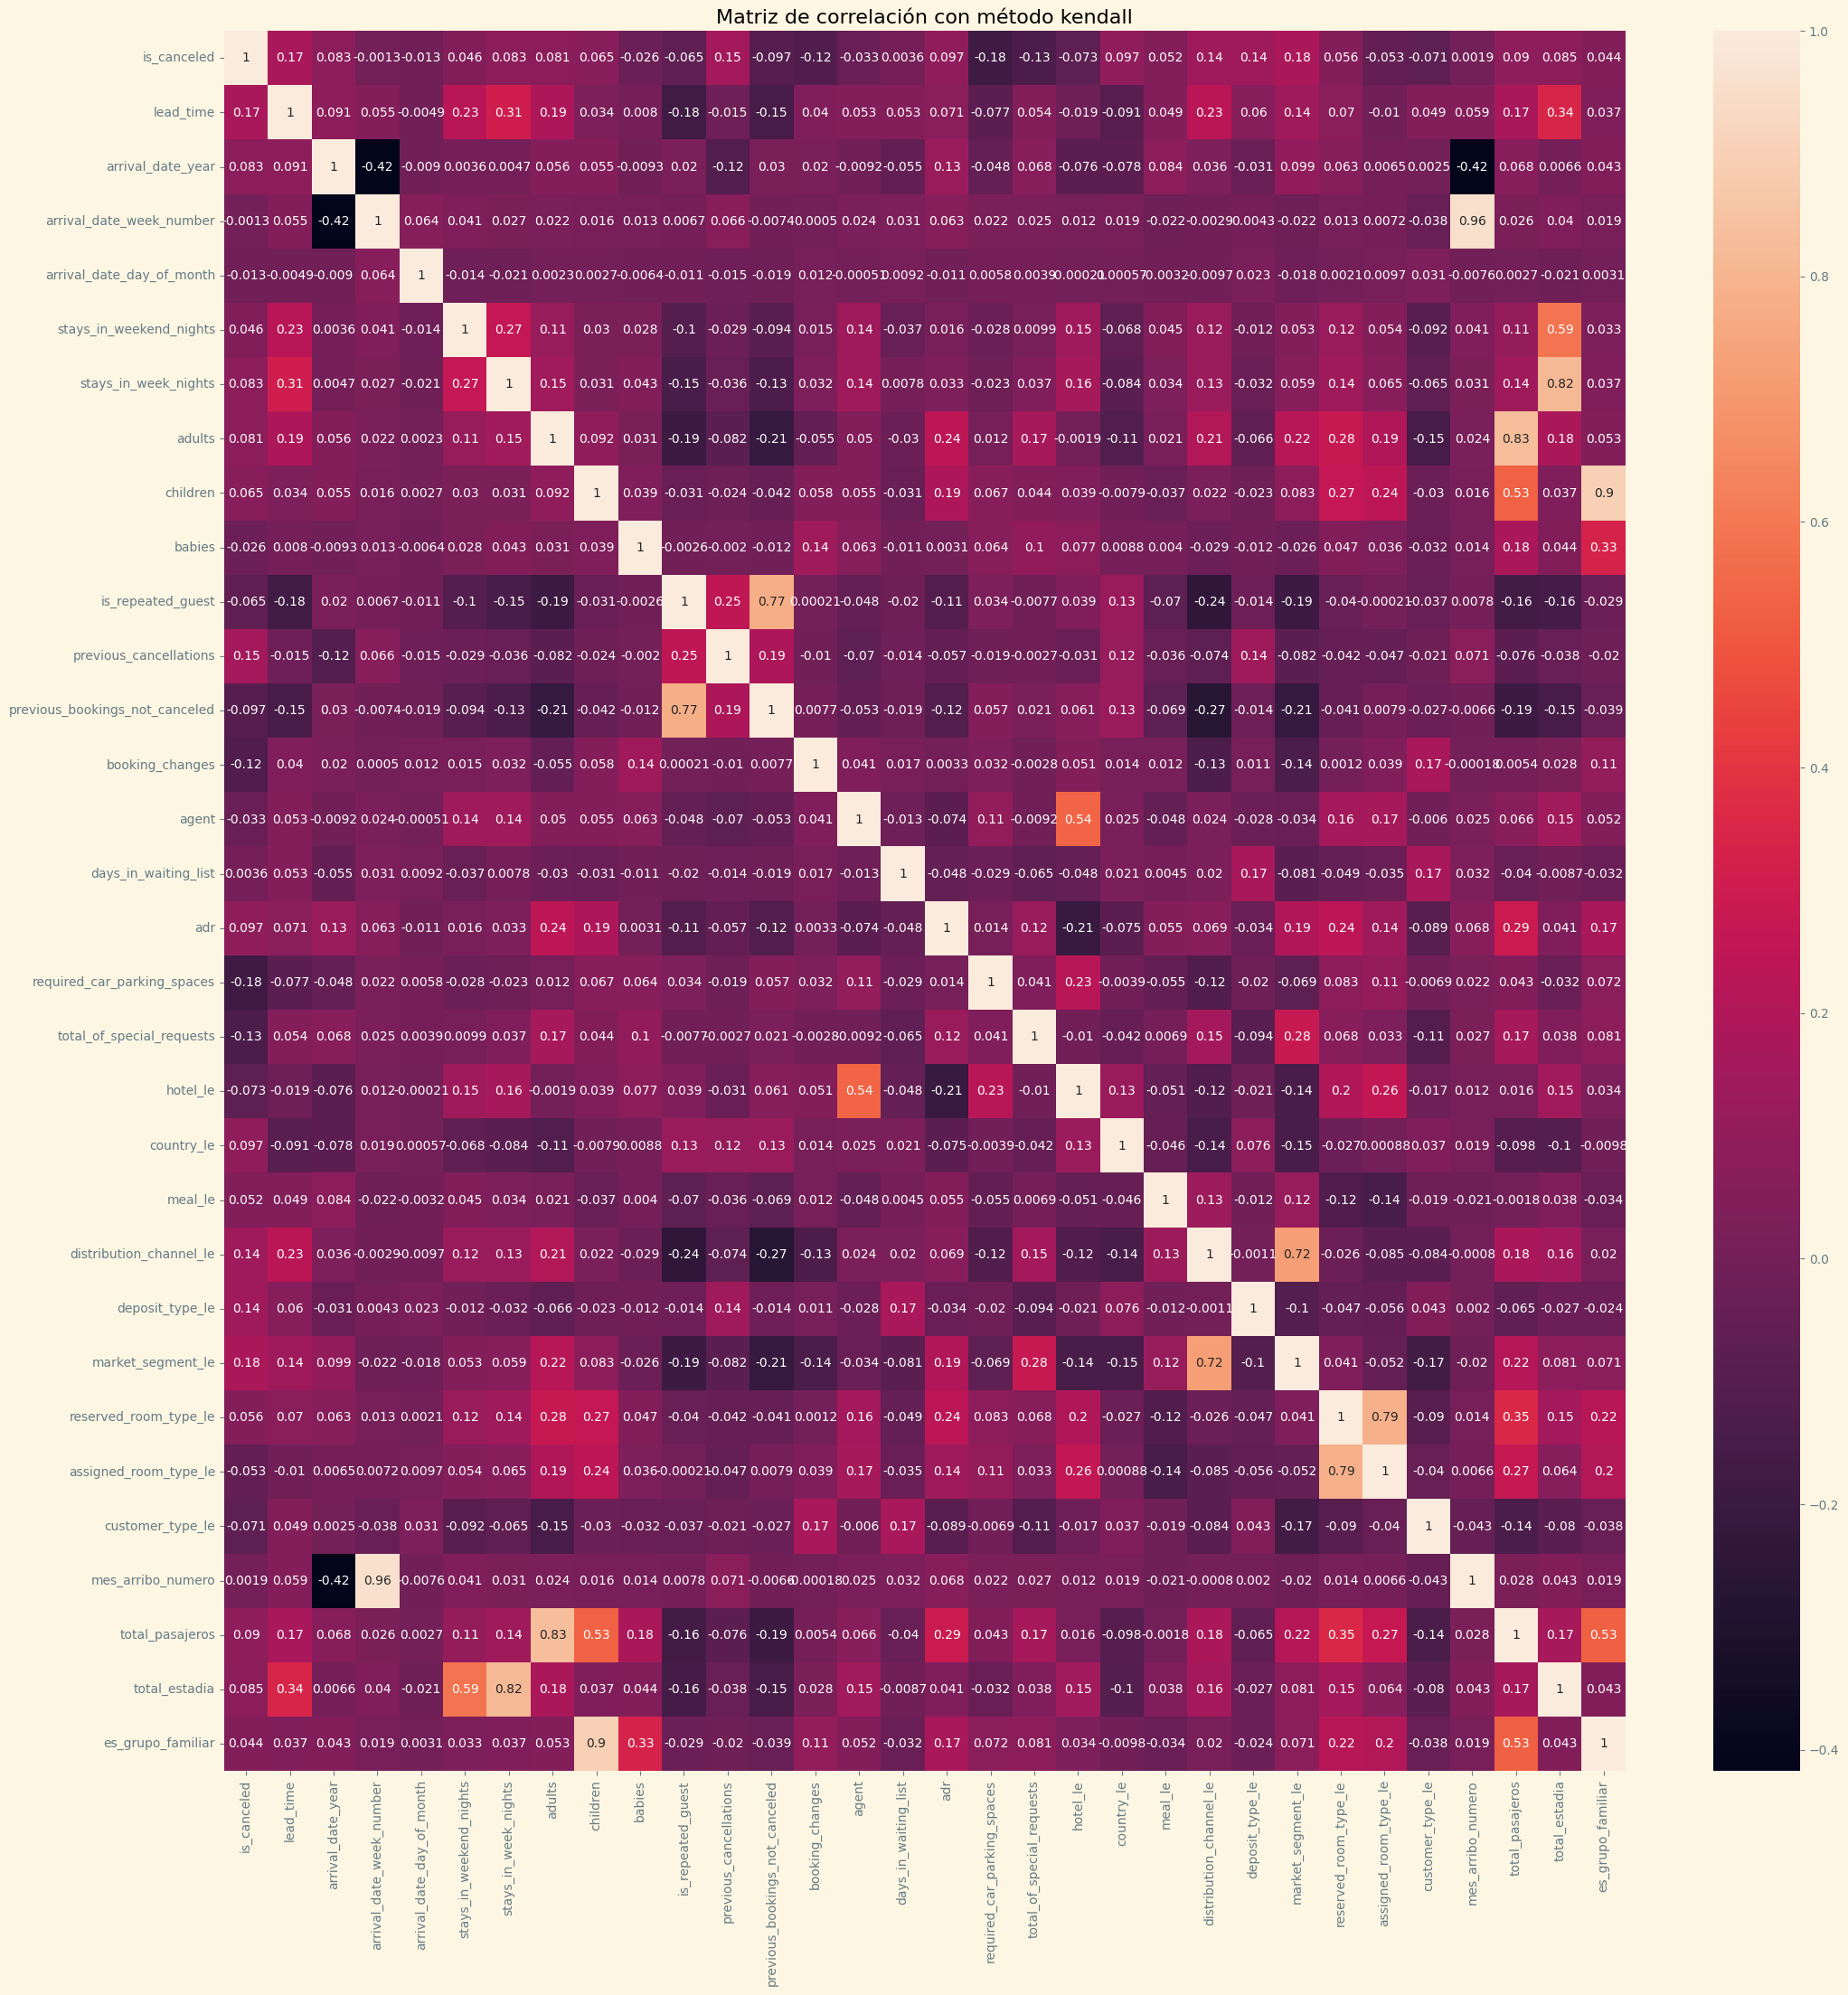

In [116]:
# Calcular la matriz de correlación de Kendall
calcular_matriz_correlacion(df_reservas_numerico, metodo='kendall', tamano_grafico=(25,25))

Conclusiones

Luego de analizar la matriz de correlación, estás son las conclusiones obtenidas:

Utilizando el método Pearson:
* La característica *'lead_time'* está algo correlacionado con *'is_canceled'*.
* *'stays_in_weekend_nights'* está altamente correlacionado con *'stays_in_week_nights'*.
* También se detecto que *'is_repeated_guest'* está  correlacionado la característica *'previous_bookings_not_canceled'*.
* *'adr'* está correlacionado con *'children'* y *'adults'*.

Método Spearman
* La caracterista *'is_canceled'* tiene alta correlación con la característica *'deposit_type'*.
* La característica *'lead_time'* sigue estando correlacionada con *'is_canceled'*.
* Se detecto que *'is_canceled'* tiene correlación con la característica *'previous_cancellations'*.
* *'stays_in_weekend_nights'* está correlacionada con *'stays_in_week_nights'*.
* También se detecto que *'is_repeated_guest'* continua siendo altamente correlacionado con la característica *'previous_bookings_not_canceled'*.
* *'adr'* está correlacionado con *'children'* y *'adults'*.
* *distribution_channel* y *market_segment* tienen alta correlatividad.


Método Kendall
* La característica *'lead_time'* está algo correlacionado con *'is_canceled'*.
* *'is_canceled'* tiene correlación con la característica *'previous_cancellations'*.
* También se detecto que *'is_repeated_guest'* continua siendo altamente correlacionado con la característica *'previous_bookings_not_canceled'*.
* *'adr'* está correlacionado con *'children'* y *'adults'*.


**Resumen**: se contemplan las características 'lead_time', 'previous_bookings_not_canceled', 'is_repeated_guest', 'previous_cancellations', 'adr', 'children' y 'adults' como las más correlacionadas.


### Forward Selection

* Proceso: Comienza con un modelo que no tiene variables predictoras y gradualmente agrega una a la vez, evaluando la contribución de cada variable en términos de mejora del ajuste del modelo.
* Criterio: En cada paso, se selecciona la variable que proporciona la mayor mejora en el ajuste del modelo, según algún criterio predefinido (como el criterio de información bayesiano o el criterio de Akaike).
* Detalles: Este proceso continúa hasta que agregar más variables no mejora significativamente el rendimiento del modelo.

In [117]:
# Inicializa una lista con el método de selección y las características seleccionadas por el mismo
lista_variables_seleccionadas = []

In [118]:
# Crear una lista para almacenar las características seleccionadas
selected_features = []

# Crear un modelo inicial
model = LogisticRegression()

while len(selected_features) < len(X.columns):
    best_feature = None
    best_mse = float('inf')  # Inicializar el error cuadrático medio como infinito

    for feature in X.columns:
        if feature not in selected_features:
            temp_features = selected_features + [feature]

            # Entrenar el modelo con las características temporales
            model.fit(X_train[temp_features], y_train)

            # Realizar predicciones en el conjunto de prueba
            y_pred = model.predict(X_test[temp_features])

            # Calcular el error cuadrático medio
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
    else:
        break

forward_features = selected_features
lista_variables_seleccionadas.append(('forward', forward_features))

print("Características seleccionadas:\n")
forward_features

Características seleccionadas:



['deposit_type_le',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'stays_in_week_nights',
 'required_car_parking_spaces',
 'booking_changes',
 'country_le',
 'market_segment_le',
 'customer_type_le',
 'mes_arribo_numero',
 'is_repeated_guest',
 'arrival_date_year',
 'babies',
 'stays_in_weekend_nights',
 'total_of_special_requests',
 'hotel_le',
 'adults',
 'meal_le',
 'total_estadia',
 'total_pasajeros',
 'lead_time',
 'distribution_channel_le',
 'adr',
 'arrival_date_day_of_month',
 'arrival_date_week_number',
 'days_in_waiting_list',
 'reserved_room_type_le',
 'children',
 'es_grupo_familiar',
 'agent',
 'assigned_room_type_le']

Selección hacia adelante (forward selection) de características utilizando el método de eliminación de características paso a paso basado en valores p (p-value). La idea es comenzar con un conjunto vacío de características y agregar iterativamente la característica que más mejora el modelo según el valor p.

El código 2 utiliza el método de selección hacia adelante basado en valores p (p-values) con la regresión lineal de statsmodels. Este enfoque es más fundamentado desde el punto de vista estadístico y puede proporcionar resultados más interpretables.

In [119]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(dtype='float64', index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_pvalues = forward_selection(X,y)
lista_variables_seleccionadas.append(('forward_pvalues', forward_pvalues))

print("Características seleccionadas:\n")
# Determinamos la lista final de características significativas basadas en valores p a través de la selección hacia adelante.
forward_pvalues

Características seleccionadas:



['required_car_parking_spaces',
 'market_segment_le',
 'total_of_special_requests',
 'country_le',
 'lead_time',
 'adr',
 'previous_cancellations',
 'deposit_type_le',
 'booking_changes',
 'arrival_date_year',
 'stays_in_week_nights',
 'distribution_channel_le',
 'total_pasajeros',
 'assigned_room_type_le',
 'reserved_room_type_le',
 'previous_bookings_not_canceled',
 'mes_arribo_numero']

### Sequential Feature Selector

El Sequential Feature Selector (Selector Secuencial de Características) es una técnica de selección de características en aprendizaje automático que busca encontrar el subconjunto óptimo de características de un conjunto de datos. Utiliza un enfoque iterativo para agregar o eliminar características secuencialmente, evaluando el rendimiento del modelo en cada paso. Su objetivo es mejorar la precisión del modelo al reducir el número de características y eliminar aquellas que no contribuyen significativamente a la predicción.

In [120]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

#Librerias
sfs = SFS(LogisticRegression(),
          k_features= 5,   #jugar con la cantidad de features
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

#Lista final de features con el método aplicado
sfs.fit(X, y)
features_sfs = sfs.k_feature_names_
lista_variables_seleccionadas.append(('sfs', features_sfs))

print("Características seleccionadas:\n")
features_sfs

Características seleccionadas:



('previous_cancellations',
 'previous_bookings_not_canceled',
 'adr',
 'total_of_special_requests',
 'deposit_type_le')

### Backward Selection

* Proceso: Comienza con un modelo que incluye todas las variables predictoras y elimina una a la vez, evaluando la contribución de cada variable en términos de la mejora del ajuste del modelo.
* Criterio: En cada paso, se elimina la variable que tiene la menor contribución al modelo, según algún criterio predefinido.
* Detalles: Este proceso continúa hasta que eliminar más variables no mejora significativamente el rendimiento del modelo.

In [121]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

#Lista final de features con el método aplicado
features_backward = backward_elimination(X,y)

lista_variables_seleccionadas.append(('backward', features_backward))
print("Características seleccionadas:\n")
features_backward

Características seleccionadas:



['lead_time',
 'arrival_date_year',
 'stays_in_week_nights',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'country_le',
 'distribution_channel_le',
 'deposit_type_le',
 'market_segment_le',
 'reserved_room_type_le',
 'assigned_room_type_le',
 'mes_arribo_numero',
 'total_pasajeros']

### Eliminación bidireccional (stepwise)

* Proceso: Combina Forward Selection y Backward Selection, comenzando con un modelo sin variables predictoras y agregando o eliminando variables en cada paso según algún criterio.
* Criterio: En cada paso, se evalúa tanto la adición como la eliminación de variables y se realiza la acción que maximiza la mejora del ajuste del modelo.
* Detalles: Este proceso continúa hasta que ninguna adición o eliminación de variables mejore significativamente el rendimiento del modelo.

In [122]:
def stepwise_selection(data, target, SL_in=0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype='float64', index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

# Lista final de features con el método aplicado
features_stepwise = stepwise_selection(X,y)
lista_variables_seleccionadas.append(('stepwise', features_stepwise))

print("Características seleccionadas:\n")
features_stepwise

Características seleccionadas:



['required_car_parking_spaces',
 'market_segment_le',
 'total_of_special_requests',
 'country_le',
 'lead_time',
 'adr',
 'previous_cancellations',
 'deposit_type_le',
 'booking_changes',
 'arrival_date_year',
 'stays_in_week_nights',
 'distribution_channel_le',
 'total_pasajeros',
 'assigned_room_type_le',
 'reserved_room_type_le',
 'previous_bookings_not_canceled',
 'mes_arribo_numero']

In [123]:
# Convertir a DataFrame de Pandas
df = pd.DataFrame(lista_variables_seleccionadas, columns=['Metodo', 'Caracteristicas'])
df

Metodo                                    Caracteristicas
0          forward  [deposit_type_le, previous_cancellations, prev...
1  forward_pvalues  [required_car_parking_spaces, market_segment_l...
2              sfs  (previous_cancellations, previous_bookings_not...
3         backward  [lead_time, arrival_date_year, stays_in_week_n...
4         stepwise  [required_car_parking_spaces, market_segment_l...

In [124]:
values = df[df['Metodo'] == 'forward']['Caracteristicas'].to_list()
values

[['deposit_type_le',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'stays_in_week_nights',
  'required_car_parking_spaces',
  'booking_changes',
  'country_le',
  'market_segment_le',
  'customer_type_le',
  'mes_arribo_numero',
  'is_repeated_guest',
  'arrival_date_year',
  'babies',
  'stays_in_weekend_nights',
  'total_of_special_requests',
  'hotel_le',
  'adults',
  'meal_le',
  'total_estadia',
  'total_pasajeros',
  'lead_time',
  'distribution_channel_le',
  'adr',
  'arrival_date_day_of_month',
  'arrival_date_week_number',
  'days_in_waiting_list',
  'reserved_room_type_le',
  'children',
  'es_grupo_familiar',
  'agent',
  'assigned_room_type_le']]

In [125]:
df['Metodo']

0            forward
1    forward_pvalues
2                sfs
3           backward
4           stepwise
Name: Metodo, dtype: object

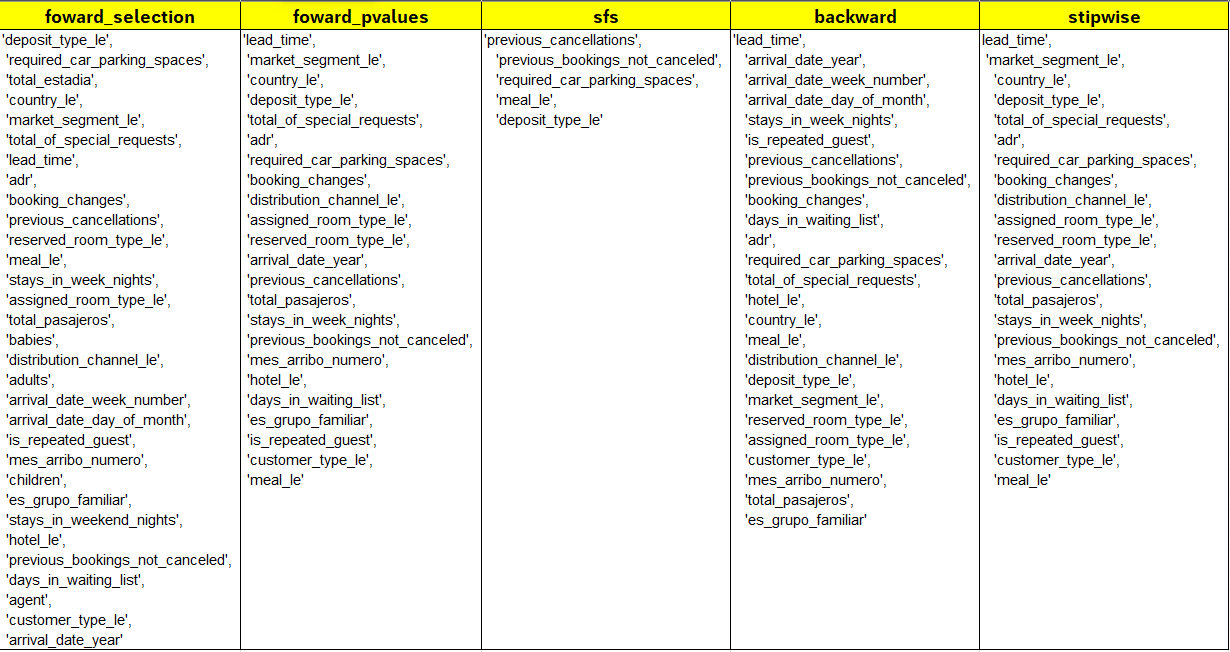

### PCA

El análisis de componentes principales (PCA) es una técnica de reducción de dimensionalidad que se utiliza para simplificar conjuntos de datos multidimensionales. PCA transforma las características originales en un nuevo conjunto de componentes principales, que son combinaciones lineales de las características originales. Los componentes principales se ordenan de acuerdo con la cantidad de variabilidad que explican. Los componentes principales con mayor varianza conservan la mayor parte de la información del conjunto de datos original.

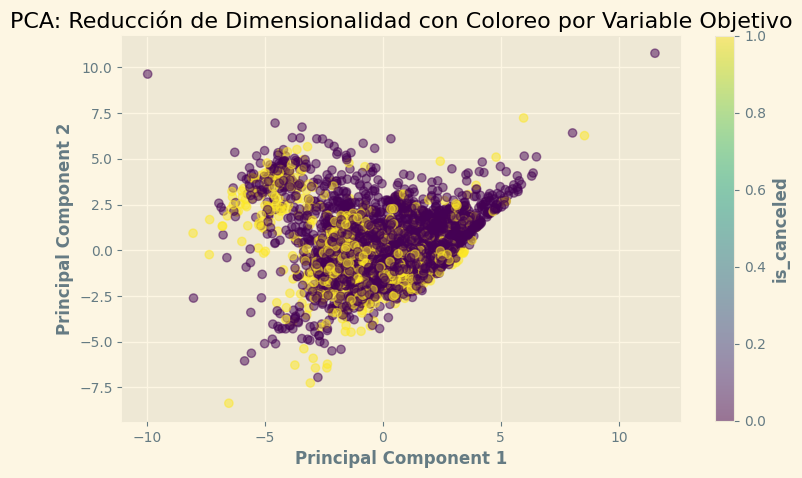

In [126]:
df_pca = df_reservas_numerico.copy()

# Separar las características (X) y la variable objetivo si es aplicable
X = df_pca.drop(variable_objetivo, axis=1)
y = df_pca[variable_objetivo]

# Escalar las características para asegurar que tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con dos componentes principales para la visualización
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame para visualización
df_principal_components = pd.DataFrame(data = principal_components, columns=['PCA_1', 'PCA_2'])
df_principal_components[variable_objetivo] = y.values

# Visualizar los datos en el espacio reducido por PCA
plt.figure(figsize=(figsize_default))
plt.scatter(df_principal_components['PCA_1'], df_principal_components['PCA_2'],
            c = df_principal_components[variable_objetivo], cmap = 'viridis', alpha = 0.5)

plt.title('PCA: Reducción de Dimensionalidad con Coloreo por Variable Objetivo')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='is_canceled')
plt.show()

# **Entrenaniento de modelos**


---

## Random Forest Classifier

Mejores parámetros: {'max_features': 'auto', 'n_estimators': 200}


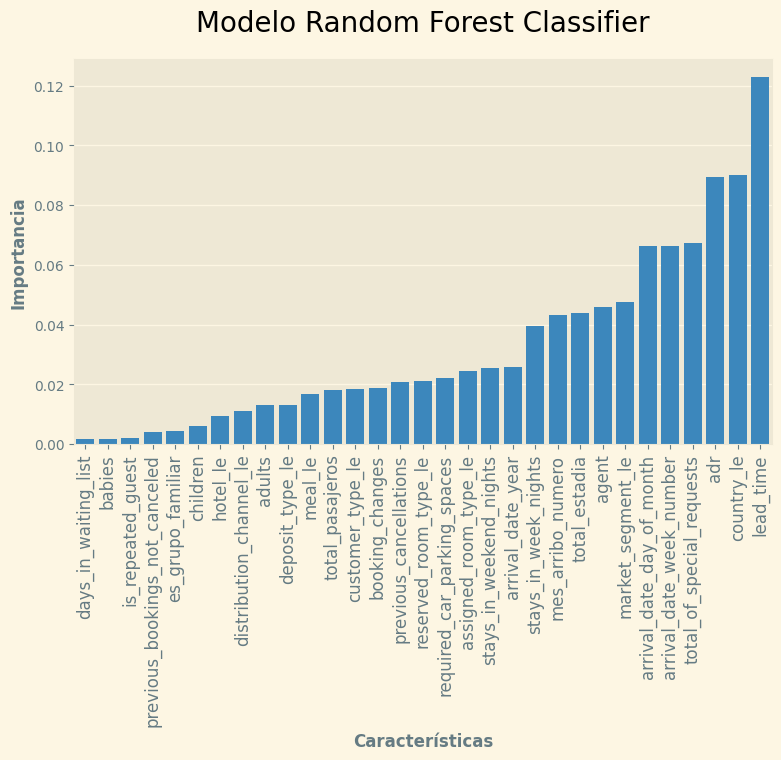

In [127]:
# Crear el modelo RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state= my_random_state)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Realizar la búsqueda en la cuadrícula
grid = GridSearchCV(model, param_grid, cv=5, scoring='recall')
grid.fit(X_train, y_train)

# Obtener los mejores parámetros
best_max_features = grid.best_params_['max_features']
best_estimators = grid.best_params_['n_estimators']
print("Mejores parámetros:", grid.best_params_)

# Crear el modelo RandomForestClassifier con los mejores parámetros
model = RandomForestClassifier(n_estimators = best_estimators,
                               n_jobs = -1,
                               max_features = best_max_features,
                               random_state = my_random_state)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame con las características y sus importancias
df_randomforest = pd.DataFrame({'Características': X.columns, 'Importancia': feature_importances})

# Ordenar el DataFrame por importancias
df_randomforest.sort_values('Importancia', inplace=True)

# Configurar el tamaño de la figura
fig_dims = (figsize_default)
fig, ax = plt.subplots(figsize=fig_dims)

# Crear el gráfico de barras
bp = sns.barplot(x='Características', y='Importancia', data = df_randomforest, ax=ax)
bp.set_title("Modelo Random Forest Classifier", fontsize=20, pad=20)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, fontsize=12)

# Mostrar el gráfico
plt.show()

Dividir el dataframe utilizando la selección de características.

In [128]:
features = lista_variables_seleccionadas[1][1]
features.append(variable_objetivo)
features

['required_car_parking_spaces',
 'market_segment_le',
 'total_of_special_requests',
 'country_le',
 'lead_time',
 'adr',
 'previous_cancellations',
 'deposit_type_le',
 'booking_changes',
 'arrival_date_year',
 'stays_in_week_nights',
 'distribution_channel_le',
 'total_pasajeros',
 'assigned_room_type_le',
 'reserved_room_type_le',
 'previous_bookings_not_canceled',
 'mes_arribo_numero',
 'is_canceled']

In [129]:
df_reservas_numerico = df_reservas_numerico[features]

In [130]:
df_reservas_numerico

required_car_parking_spaces  market_segment_le  \
1056                             0                  6   
5210                             0                  6   
36228                            0                  0   
26513                            1                  6   
4682                             0                  6   
...                            ...                ...   
2907                             0                  6   
3370                             0                  3   
53634                            0                  6   
60135                            0                  5   
54664                            0                  6   

       total_of_special_requests  country_le  lead_time     adr  \
1056                           2          56        100   72.25   
5210                           0          31         14   88.33   
36228                          0          48          4  110.00   
26513                          1          15         80  170.33   
4682                           1          81        158  157.50   
...                          ...         ...        ...     ...   
2907                           2         135         23   68.00   
3370                           0         135        239   82.88   
53634                          0          76        161   81.62   
60135                          0          59        145   72.76   
54664                          1          56         10   95.00   

       previous_cancellations  deposit_type_le  booking_changes  \
1056                        0                0                0   
5210                        0                0                0   
36228                       1                0                0   
26513                       0                0                0   
4682                        0                0                0   
...                       ...              ...              ...   
2907                        0                0                0   
3370                        0                0                0   
53634                       0                0                0   
60135                       0                0                0   
54664                       0                0                0   

       arrival_date_year  stays_in_week_nights  distribution_channel_le  \
1056                2015                     1                        3   
5210                2016                     7                        3   
36228               2017                     1                        0   
26513               2015                     4                        3   
4682                2017                     3                        3   
...                  ...                   ...                      ...   
2907                2017                     3                        3   
3370                2016                     4                        1   
53634               2016                     5                        3   
60135               2016                     1                        3   
54664               2017                     1                        3   

       total_pasajeros  assigned_room_type_le  reserved_room_type_le  \
1056                 2                      0                      0   
5210                 1                      0                      0   
36228                1                      3                      3   
26513                2                      4                      4   
4682                 2                      3                      3   
...                ...                    ...                    ...   
2907                 2                      3                      3   
3370                 2                      0                      0   
53634                3                      4                      4   
60135                2                      0                      0   
54664              

In [131]:
# Deja unicamente las características númericas
df_reservas_numerico = df_reservas_numerico.select_dtypes(include='number')

# X, y
X = df_reservas_numerico.drop(variable_objetivo, axis=1)
y = df_reservas_numerico[variable_objetivo]

# División de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state = my_random_state)

## Regresión Logística

La regresión logística se utiliza para predicciones con salidas binarias con dos posibles valores etiquetados con "0" o "1".
Cancelación o No Cancelación

Busca interpretar la relación entre las variables y '**is_canceled**'.

Precisión del modelo: 75.27%
El modelo podría necesitar mejoras para lograr un rendimiento más alto.


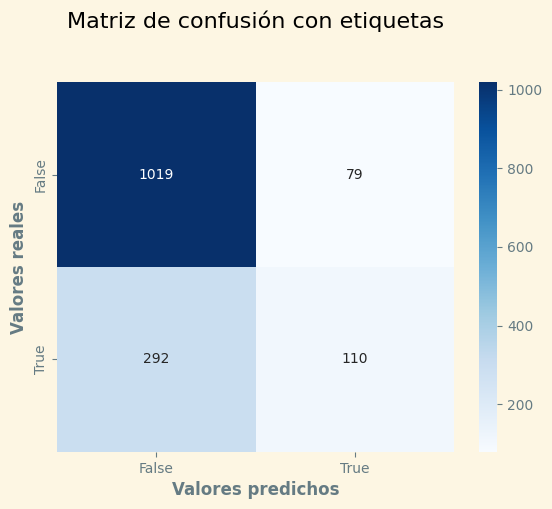



              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1098
           1       0.58      0.27      0.37       402

    accuracy                           0.75      1500
   macro avg       0.68      0.60      0.61      1500
weighted avg       0.72      0.75      0.72      1500



In [132]:
# Regresión logistica
model = LogisticRegression(max_iter = 100, n_jobs= -1)

# Ajustar modelo
model.fit(X_train, y_train)

# Predicciones
predicciones = model.predict(X_test)

# Llama a la función para calcular la precisión del modelo
calcular_precision_modelo(y_test, predicciones )

# Llama a la función de graficar la matriz de confución
graficar_matriz_confusion(y_test, predicciones, style='Blues', labels=['False', 'True'])

**Métricas algoritmos de clasificación**

* TP (True Positive) – Son los valores que el algoritmo clasifica como positivos y que realmente son positivos.
* TN (True Negative) – Son valores que el algoritmo clasifica como negativos (0 en este caso) y que realmente son negativos.
* FP (False Positive) – Falsos positivos, es decir, valores que el algoritmo clasifica como positivo cuando realmente son negativos.
* FN (False Negative) – Falsos negativos, es decir, valores que el algoritmo clasifica como negativo cuando realmente son positivos.

La métrica accuracy representa el porcentaje total de **valores correctamente clasificados**, tanto positivos como negativos.

Accuracy = (TP + TN) / (TP + TN + FP + FN)

In [133]:
accuracy2 = accuracy_score(y_test, predicciones)
print("Precisión del modelo: {:.2f}%".format(accuracy2 * 100))

if accuracy2 > 0.9:
    print("El modelo tiene un alto rendimiento en la clasificación.")
else:
    print("El modelo podría necesitar mejoras para lograr un rendimiento más alto.")

Precisión del modelo: 75.27%
El modelo podría necesitar mejoras para lograr un rendimiento más alto.


La métrica de precisión es utilizada para poder saber qué porcentaje de valores que se han clasificado como positivos son realmente positivos.

Precision = TP / (TP + FP)

In [134]:
# Precisión se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, predicciones, pos_label=1)
precision_negativa = metrics.precision_score(y_test, predicciones, pos_label=0)
print("Precisión del modelo positiva: {:.2f}%".format(precision_positiva * 100))
print("Precisión del modelo negativa: {:.2f}%".format(precision_negativa * 100))

Precisión del modelo positiva: 58.20%
Precisión del modelo negativa: 77.73%


La métrica de recall, también conocida como el ratio de verdaderos positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados.

Recall = TP / (TP + FN)

In [135]:
recall_sensibilidad = metrics.recall_score(y_test, predicciones, pos_label=1)
recall_especificidad = metrics.recall_score(y_test, predicciones, pos_label=0)

print("Precisión de recall_sensibilidad: {:.2f}%".format(recall_sensibilidad * 100))
print("Precisión de recall_especificidad: {:.2f}%".format(recall_especificidad * 100))

Precisión de recall_sensibilidad: 27.36%
Precisión de recall_especificidad: 92.81%


F1 Score

Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado. Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo.

F1 = 2 * ((recall * precision)/(recall + precision))

In [136]:
f1_positivo = metrics.f1_score(y_test, predicciones, pos_label=1)
f1_negativo = metrics.f1_score(y_test, predicciones, pos_label=0)

print("Precisión de f1_positivo: {:.2f}%".format(f1_positivo * 100))
print("Precisión de f1_negativo: {:.2f}%".format(f1_negativo * 100))

Precisión de f1_positivo: 37.23%
Precisión de f1_negativo: 84.60%


## SelectKBest + RandomForestClassifier

SelectKBest y RandomForestClassifier son dos componentes comúnmente utilizados en el proceso de selección de características y clasificación, respectivamente, en el contexto de aprendizaje automático.

* SelectKBest se utiliza para seleccionar las k mejores características (variables) basadas en diversas funciones de puntuación. Puede ser utilizado con varios métodos de puntuación, como la correlación, la información mutua o las pruebas estadísticas.

* RandomForestClassifier es un clasificador basado en la técnica de ensamblado de árboles de decisión, conocido como Bosque Aleatorio.

Precisión del modelo: 82.07%
El modelo podría necesitar mejoras para lograr un rendimiento más alto.


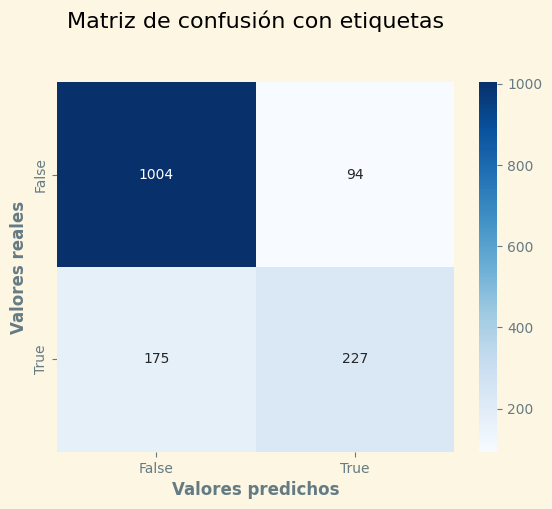



              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1098
           1       0.71      0.56      0.63       402

    accuracy                           0.82      1500
   macro avg       0.78      0.74      0.75      1500
weighted avg       0.81      0.82      0.81      1500



In [137]:
# Aplica SelectKBest para seleccionar las K mejores características
X_new = SelectKBest(k = 10).fit_transform(X_train, y_train)

# Crear un modelo de clasificación usando Random Forest
model = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Llama a la función para calcular la precisión del modelo
calcular_precision_modelo(y_test, y_pred )

# Llama a la función de graficar la matriz de confución
graficar_matriz_confusion(y_test, y_pred, style='Blues', labels=['False', 'True'])

## XGBoost

XGBoost (Extreme Gradient Boosting) es un algoritmo de aprendizaje automático supervisado que se utiliza en problemas de regresión y clasificación.

Precisión del modelo: 81.87%
El modelo podría necesitar mejoras para lograr un rendimiento más alto.


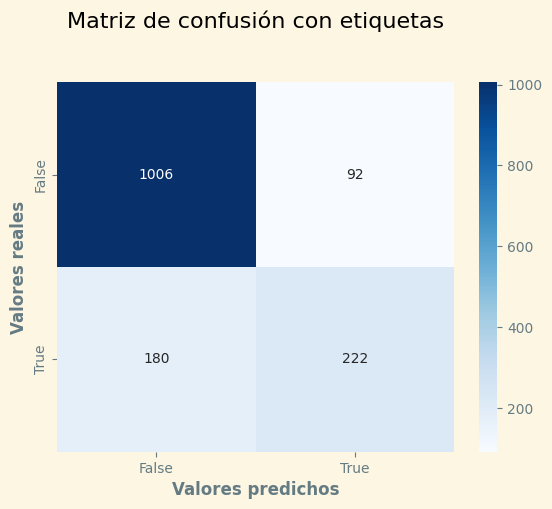



              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1098
           1       0.71      0.55      0.62       402

    accuracy                           0.82      1500
   macro avg       0.78      0.73      0.75      1500
weighted avg       0.81      0.82      0.81      1500



In [138]:
# Crea un objeto DMatrix para los datos de entrenamiento y prueba
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define los parámetros del modelo XGBoost
params = {
          'objective': 'binary:logistic',
          'max_depth': 3,
          'learning_rate': 0.1
}

# Entrena el modelo XGBoost
model = xgb.train(params, dtrain, num_boost_round = 100)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(dtest)

# Convierte las predicciones a etiquetas binarias
# Explicación: utiliza una comprensión de lista para iterar sobre las predicciones y_pred
# y asignar una etiqueta binaria según el valor de la predicción. Si el valor predicho (p)
# es mayor que 0.5, se clasifica como 1, de lo contrario, se clasifica como 0.
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Llama a la función para calcular la precisión del modelo
calcular_precision_modelo(y_test, y_pred_binary)

# Llama a la función de graficar la matriz de confución
graficar_matriz_confusion(y_test, y_pred_binary, style='Blues', labels=['False', 'True'])

## XGBoost + kfold



La combinación de XGBoost y la validación cruzada K-fold es una práctica común para evaluar y entrenar modelos de aprendizaje automático de manera robusta.

In [139]:
# Defino los parámetros del modelo XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,  #5 => 80% | 6 = 81% | 10 = 84% | 12 = 85%
    'learning_rate': 0.1
}

# Configura la validación cruzada con K-Fold
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state = my_random_state)

# Lista para almacenar las puntuaciones de precisión de cada pliegue
scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(params, dtrain, num_boost_round = 100)

    y_pred = model.predict(dtest)
    y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

    accuracy = accuracy_score(y_test, y_pred_binary)
    scores.append(accuracy)

# Calcula el promedio de las puntuaciones de precisión de los pliegues
average_accuracy = sum(scores) / num_folds

print("Precisión promedio con {}-fold cross-validation: {:.2f}%".format(num_folds, average_accuracy * 100))

Precisión promedio con 10-fold cross-validation: 82.16%


El sobreajuste (overfitting) y el subajuste (underfitting) son problemas comunes en el aprendizaje de máquinas.

In [140]:
model = LogisticRegression(random_state = my_random_state)
accuracy, overfitting_score = entrenar_y_evaluar_modelo(X, y, model)

Exactitud: 75.09%
Puntuación de sobreajuste: -0.0051


## SVM (Support Vector Machines)

Es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Es un algoritmo de clasificación binaria por defecto, pero se puede extender para problemas de clasificación multiclase.

Iteración dinamica de modelos SVM

In [141]:
# Inicializo las variables que ejecutaran la función
my_C = 0.1
my_degree = 3
my_test_size = 0.2
my_kernels = {'poly','rbf','linear','sigmoid'}

for k in my_kernels:
  entrenar_y_evaluar_modelo_svm(X, y,
                                kernel= k,
                                C = my_C,
                                degree = my_degree,
                                random_state = my_random_state,
                                my_test_size = my_test_size)

Configuración: Kernel: linear | C: 0.1 | Degree: 3 | Test Size: 0.2
% de aciertos sobre el set de evaluación: 75.7

Configuración: Kernel: rbf | C: 0.1 | Degree: 3 | Test Size: 0.2
% de aciertos sobre el set de evaluación: 72.9

Configuración: Kernel: sigmoid | C: 0.1 | Degree: 3 | Test Size: 0.2
% de aciertos sobre el set de evaluación: 72.9

Configuración: Kernel: poly | C: 0.1 | Degree: 3 | Test Size: 0.2
% de aciertos sobre el set de evaluación: 72.9



Conclusión

Luego de haber entrenado el modelo utilizando cuatro configuraciones diferentes de kernels, con entrenamientos entre 10.000 y 30.000 observaciones, y con variación del tamaño del DataFrame de testing entre el 25 y 35%, se concluye que siempre el mejor porcentaje de acierto se logra utilizando: SVC(C=0.1, kernel='linear',random_state= my_random_state)

## Hypertuning

La optimización de hiper parámetros tiene como objetivo entonces encontrar una combinación que devuelve un modelo óptimo, reduciendo una función de pérdida predefinida y a su vez aumentando la performance del mismo.

In [142]:
#Instanciamos el modelo
random_forest = RandomForestRegressor()

# Limitar el conjunto de datos
#limite_df = 2500  # <<<<<<<<----------------- LIMITAR PARA EJECUCIONES MÁS RÁPIDAS

df_hypertuning = df_reservas_numerico.copy() #.head(limite_df)

# Dividir el conjunto de datos en características
X = df_hypertuning.drop(variable_objetivo, axis=1)
y = df_hypertuning[variable_objetivo]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state = my_random_state)

# Definir el modelo de RandomForestRegressor
random_forest = RandomForestRegressor()

# Definimos los parámetros de búsqueda
params = {
    'n_estimators': [50, 100, 200],
    'max_features': [2, 4, 5, 8],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [4, 5, 8]
}

In [143]:
# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=random_forest,
                           param_grid = params,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           n_jobs= -1)

# Ajustar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)
print(fecha_hora_local())

2024-02-21 10:17:13 -03-0300


In [144]:
# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Los mejores hiperparámetros encontrados fueron: \n")

# Toma los valores de la lista y los pasa como parametros
my_criterion = best_params.get('criterion', '')
my_max_depth = best_params.get('max_depth', '')
my_max_features = best_params.get('max_features', '')
my_n_estimators = best_params.get('n_estimators', '')

print(my_criterion)
print(my_max_depth)
print(my_max_features)
print(my_n_estimators)

Los mejores hiperparámetros encontrados fueron: 

friedman_mse
8
8
200


Error Cuadrático Medio (Mean Squared Error - MSE):

Es la media de los cuadrados de las diferencias entre las predicciones y los valores reales. Cuanto menor sea el MSE, mejor será el rendimiento del modelo.

In [145]:
# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calcular el Error Cuadrático Medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {round(mse, 2)}")

Error Cuadrático Medio en el conjunto de prueba: 0.13


Conclusión: Un MSE de 0.06 indicaría un bajo error en la predicción del modelo en el conjunto de prueba.

Nuevo entremaniento con los hiperparametros encontrados

In [146]:
random_forest_nuevo = RandomForestRegressor(criterion = my_criterion,
                                            max_depth = my_max_depth,
                                            max_features = my_max_features,
                                            n_estimators = my_n_estimators)

In [147]:
# Entrenar el nuevo modelo con los hiperparametros encontrados
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=8, max_features=8,
                      n_estimators=200)

In [148]:
# Predecir en el conjunto de prueba
random_forest_nuevo.predict(X_train)
random_forest_nuevo.predict(X_test)

array([0.59589797, 0.32679699, 0.07611696, ..., 0.19790827, 0.27840188,
       0.2240361 ])

In [149]:
X_test1= X_test.copy()
X_test1['Prediccion']=np.round(random_forest_nuevo.predict(X_test),0)
X_test1

required_car_parking_spaces  market_segment_le  \
30998                            0                  6   
4597                             0                  6   
13222                            0                  3   
77016                            0                  6   
14333                            0                  6   
...                            ...                ...   
34151                            0                  6   
16102                            0                  3   
7770                             0                  6   
26330                            0                  6   
59591                            0                  3   

       total_of_special_requests  country_le  lead_time     adr  \
30998                          1         135         83   98.20   
4597                           1         135         20   85.00   
13222                          0          56         12  139.33   
77016                          0         133         51   97.00   
14333                          0          25         94  168.30   
...                          ...         ...        ...     ...   
34151                          1          51         16  197.00   
16102                          0         135          0   77.00   
7770                           3          59         29  166.25   
26330                          1         140         17   58.00   
59591                          0          59        235   80.80   

       previous_cancellations  deposit_type_le  booking_changes  \
30998                       0                0                0   
4597                        0                0                0   
13222                       0                0                0   
77016                       0                0                0   
14333                       0                0                0   
...                       ...              ...              ...   
34151                       0                0                0   
16102                       0                0                1   
7770                        0                0                0   
26330                       0                0                0   
59591                       0                0                1   

       arrival_date_year  stays_in_week_nights  distribution_channel_le  \
30998               2017                     8                        3   
4597                2017                     0                        3   
13222               2015                     1                        1   
77016               2015                     2                        3   
14333               2016                     0                        3   
...                  ...                   ...                      ...   
34151               2017                     2                        3   
16102               2016                     0                        1   
7770                2016                     2                        3   
26330               2016                     2                        3   
59591               2016                     6                        1   

       total_pasajeros  assigned_room_type_le  reserved_room_type_le  \
30998                2                      3                      3   
4597                 2                      2                      0   
13222                2                      0                      0   
77016                2                      3                      3   
14333                3                      3                      3   
...                ...                    ...                    ...   
34151                3                      4                      4   
16102                2                      0                      0   
7770                 2                      3                      3   
26330                2                      3                      3   
59591              

In [150]:
# Predecir en el conjunto de prueba
y_pred = random_forest_nuevo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {round(mse, 2)}")

# Calcular el coeficiente de determinación (R-squared)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R-squared): {round(r2, 2)}")

Error Cuadrático Medio (MSE): 0.13
Coeficiente de Determinación (R-squared): 0.33


Validación cruzada del modelo

In [151]:
realizar_cross_validation(random_forest_nuevo,
                          df_hypertuning.drop(variable_objetivo, axis=1),
                          df_hypertuning[variable_objetivo], cv = 5)


Puntuaciones de validación cruzada (5 divisiones):
 [0.30797866 0.3412697  0.33412434 0.3509001  0.38058362]

Media de la validación cruzada: 34.3

Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.13

Coeficiente de Determinación (R-squared) en el conjunto de prueba: 0.34


([30.8, 34.13, 33.41, 35.09, 38.06], 34.14)

Conclusiones

Aunque la precisión media es moderada, podría ser beneficioso explorar otras estrategias de modelado, probar diferentes algoritmos o ajustar aún más los hiperparámetros para mejorar el rendimiento. Además, es importante considerar la calidad y la cantidad de datos disponibles para el entrenamiento.

En resumen, los resultados indican un rendimiento aceptable del modelo, pero hay margen para la mejora. La eficacia de las estrategias de ajuste de hiperparámetros y la elección del algoritmo son aspectos clave a considerar en futuras iteraciones del proceso de modelado.



---



## Entrenamiento masivo de modelos

In [152]:
# Limite de observaciones para entrenamiento/testing
#limite_df = 2500   # <<<<<<<<----------------- LIMITAR PARA EJECUCIONES MÁS RÁPIDAS

# Copio el DataFrame original con limite de observaciones
#df_prueba = df_reservas_numerico.sample(limite_df).copy()

#X = df_prueba.drop(variable_objetivo, axis=1)
#y = df_prueba[variable_objetivo]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
#                                                    random_state = my_random_state,
#                                                    shuffle=True)

Validamos 10 modelos distintos en busca de los mejores.

In [153]:
model1 = LogisticRegression(max_iter = 500)
model2 = SVC(random_state = my_random_state)
model3 = GaussianNB()
model4 = MLPClassifier(random_state = my_random_state, max_iter = 500)
model5 = SGDClassifier(random_state = my_random_state)
model6 = KNeighborsClassifier()
model7 = DecisionTreeClassifier(random_state = my_random_state)
model8 = RandomForestClassifier(random_state = my_random_state, class_weight = "balanced")
model9 = GradientBoostingClassifier(random_state = my_random_state)
model10 = XGBClassifier(random_state = my_random_state, use_label_encoder = False)

Arma un DataFrame para almacenar los resultados de las pruebas de validación cruzada.

In [154]:
# Agrupa los modelos en una lista
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]

# Con la lista de modelos, crea un DataFrame dinamico
columnas = []

for model in models:
    columnas.append(model.__class__.__name__)

# Las filas seran los paramatros de CV
rows = ['cv=3','cv=5','cv=8', 'cv=10' ]

ranking_modelos_ml = pd.DataFrame(index=rows, columns=columnas)
ranking_modelos_ml.fillna(0, inplace=True)

# Este DF se utilizará para almacenar los resultados de cada validación
ranking_modelos_ml

LogisticRegression  SVC  GaussianNB  MLPClassifier  SGDClassifier  \
cv=3                    0    0           0              0              0   
cv=5                    0    0           0              0              0   
cv=8                    0    0           0              0              0   
cv=10                   0    0           0              0              0   

       KNeighborsClassifier  DecisionTreeClassifier  RandomForestClassifier  \
cv=3                      0                       0                       0   
cv=5                      0                       0                       0   
cv=8                      0                       0                       0   
cv=10                     0                       0                       0   

       GradientBoostingClassifier  XGBClassifier  
cv=3                            0              0  
cv=5                            0              0  
cv=8                            0              0  
cv=10                           0              0

Este proceso, cicla entre la combinación de modelos y los valores de CV (puede tarde según el tamaño de DataFrame).

In [155]:
# Lista para almacenar resultados del procesamiento
ranking_modelos = []

# Iterar sobre las filas y columnas del DataFrame
for index, row in ranking_modelos_ml.iterrows():
    for column in ranking_modelos_ml.columns:
        # Obtener el nombre del modelo y el número de cv
        modelo = column
        try:
            cv = int(index.split('=')[-1])
        except ValueError:
            print(f"Error: No se pudo convertir '{index.split('=')[-1]}' a un entero en la fila {index}")
            continue  # Pasar a la siguiente iteración si hay un error de conversión

        # Iterar sobre cada modelo
        for m in range(len(models)):
            if modelo == models[m].__class__.__name__:  # Comparar el nombre del modelo con el nombre de la clase
                model = models[m]

                try:
                    scores = cross_val_score(model, X, y, scoring='roc_auc', cv= cv)  # Curva Roc
                    promedio = np.mean(scores)
                except Exception as e:
                    print(f"Error al evaluar el modelo {modelo} con cv {cv}: {e}")
                    continue  # Pasar a la siguiente iteración si hay un error durante la validación cruzada

                ranking_modelos_ml.loc[index, column] = round(promedio,4)

                ranking_modelos.append((modelo, cv, promedio))
                print(f"Para el modelo {modelo} y cv {cv}: {promedio} ")

print(fecha_hora_local())

Para el modelo LogisticRegression y cv 3: 0.7850329253792316 
Para el modelo SVC y cv 3: 0.6785313019928916 
Para el modelo GaussianNB y cv 3: 0.7524334735393676 
Para el modelo MLPClassifier y cv 3: 0.7889925390394089 
Para el modelo SGDClassifier y cv 3: 0.6640483496391274 
Para el modelo KNeighborsClassifier y cv 3: 0.6721903428831872 
Para el modelo DecisionTreeClassifier y cv 3: 0.6779710400440129 
Para el modelo RandomForestClassifier y cv 3: 0.8576833244643322 
Para el modelo GradientBoostingClassifier y cv 3: 0.8725607260645706 
Para el modelo XGBClassifier y cv 3: 0.8638865730620567 
Para el modelo LogisticRegression y cv 5: 0.7803603745113883 
Para el modelo SVC y cv 5: 0.6907265888828564 
Para el modelo GaussianNB y cv 5: 0.7537998768144807 
Para el modelo MLPClassifier y cv 5: 0.7872526496897206 
Para el modelo SGDClassifier y cv 5: 0.6677120736091021 
Para el modelo KNeighborsClassifier y cv 5: 0.6723973220270828 
Para el modelo DecisionTreeClassifier y cv 5: 0.68247394188

In [156]:
ranking_modelos_ml

LogisticRegression     SVC  GaussianNB  MLPClassifier  SGDClassifier  \
cv=3               0.7850  0.6785      0.7524         0.7890         0.6640   
cv=5               0.7804  0.6907      0.7538         0.7873         0.6677   
cv=8               0.7813  0.7000      0.7530         0.7887         0.6684   
cv=10              0.7812  0.6816      0.7523         0.7814         0.6678   

       KNeighborsClassifier  DecisionTreeClassifier  RandomForestClassifier  \
cv=3                 0.6722                  0.6780                  0.8577   
cv=5                 0.6724                  0.6825                  0.8600   
cv=8                 0.6724                  0.6907                  0.8642   
cv=10                0.6712                  0.6903                  0.8613   

       GradientBoostingClassifier  XGBClassifier  
cv=3                       0.8726         0.8639  
cv=5                       0.8728         0.8650  
cv=8                       0.8736         0.8695  
cv=10                      0.8744         0.8688

In [157]:
ranking_modelos.sort(key=lambda x: x[2], reverse=True)

print("Ranking de los 10 mejores modelos (Modelo | Parametro CV | Curva Roc ):\n")
ranking_modelos[:10]

Ranking de los 10 mejores modelos (Modelo | Parametro CV | Curva Roc ):



[('GradientBoostingClassifier', 10, 0.8744112584049532),
 ('GradientBoostingClassifier', 8, 0.8735569395246162),
 ('GradientBoostingClassifier', 5, 0.872789042447636),
 ('GradientBoostingClassifier', 3, 0.8725607260645706),
 ('XGBClassifier', 8, 0.8695277606653319),
 ('XGBClassifier', 10, 0.8687969765206134),
 ('XGBClassifier', 5, 0.8649799643196985),
 ('RandomForestClassifier', 8, 0.8642368063042251),
 ('XGBClassifier', 3, 0.8638865730620567),
 ('RandomForestClassifier', 10, 0.8613101847898456)]

**RE-ESCRIBIR**

Conclusiones

Para un total de 30.000 observaciones, se entrenaron 10 modelos, utilizando un 25% del DataFrame para pruebas. El orden de los mejores modelos, es el siguiente:

* XGBClassifier = 85.4 %
* RandomForestClassifier = 84.8 %
* GradientBoostingClassifier = 84.2 %
* MLPClassifier = 81.6 %
* LogisticRegression = 79.4 %
* KNeighborsClassifier = 77.8
* GaussianNB = 76.6 %
* DecisionTreeClassifier = 74.6 %
* SVC = 72.6 %
* SGDClassifier = 72.4 %

Cuando se lo entrenó con 100.000 observaciones, los mejores resultados se obtuvieron con estos modelos:

* RandomForestClassifier = 87.0 %
* XGBClassifier = 86.8 %
* GradientBoostingClassifier = 84.2 %
* MLPClassifier = 82.4 %
* KNeighborsClassifier = 82.0 %
* LogisticRegression = 79.4 %
* DecisionTreeClassifier = 78.0 %
* GaussianNB = 76.6 %
* SGDClassifier = 75.2 %
* SVC = 74.0

# **Resultados finales del proyecto**


---

**Establecer si una reserva será cancelada.**

Después de entrenar varios modelos utilizando diversas técnicas de selección de características, hemos logrado desarrollar un modelo que ofrece una precisión del 87%. Este logro se ha alcanzado al combinar SelectKBest con RandomForestClassifier.

Nuestro modelo es capaz de predecir con una precisión del 87% si una reserva será cancelada o no, tal como se mencionó anteriormente.

# **Conclusiones y recomendaciones finales**

---


Luego de completar el procesamiento y transformación de los datos, generar las matrices de correlación, entrenar los modelos de aprendizaje y generar las respuestas a las preguntas, podemos presentar las conclusiones obtenidas, y las recomendaciones propuestas:

*   El modelo de aprendizaje obtuvo buenos resultados con una variable etiquetada ('deposit_type'), dado que el 100% de las observaciones cuenta con este dato. Se logró una presición del 86.99%.

*   Más del 50% de las reservas se realizan con un tiempo de anticipación inferior a 90 días. Con esta información, es posible generar campañas de marketing dirigidas a captar huéspedes espontáneos, dispuestos a viajar con mayor frecuencia y con menor planificación.

*   Los países europeos dominan el ranking de los principales emisores de turistas, representando nueve de cada diez visitantes. Esto puede tratarse de una carencia en los datos. Se recomienda ampliar la búsqueda de observaciones para ampliar la característica 'country' y poder comprobar este resultado obtenido.

*   Se infiere que pocas personas planifican sus reservas con más de seis meses de antelación. Poder contar mayor tiempo entre la reserva y el check-in, permite a los hoteles una mejor gestión de los stocks de productos y servicios ofrecidos a los huéspedes en cada estación del año.

*   El ADR no se ve modificado en cuanto al mayor número de huéspedes, pero si en cuanto al mes arribo al hotel. Por el mapa de calor, se pudo inferir que en el mes de agosto, el valor del ADR es el más alto del año, seguido por el mes de julio.

*   El servicio de comida más solicitado por el tipo de cliente en transito (eventual), es el servicio que unicamente incluye desayuno (BB).

*   Agosto registra una alta demanda de reservas, por lo cual el precio ADR es más alto en comparación con el mes de enero, donde se abona el menor valor promedio por reserva.

*   Pudiendose realizar la reserva durante el mes de septiembre, el husped logra un ahorro promedio de 35 dólares versus el mes de agosto. Con este dato, es posible influir en la decisión del futuro huésped, generando campañas por medio de agencias de turismo asociadas.

*   Se recomienda implementar políticas de cancelación flexibles durante los meses de abril a junio para reducir las mismas.

# Referencias

Librería seaborn: statistical data visualization: https://seaborn.pydata.org/

Métricas de clasficiación: https://www.themachinelearners.com/metricas-de-clasificacion/


# Change log



1.   20/08/2023 Versión inicial
2.   Desafío 1 - Elección de Datasets potenciales
3.   Desafío 2 - Práctica integradora: Visualizaciones en Python
4.   Desafío 3 - Estructurando un Proyecto de DS (parte I)
5.   Desafío 4 - Estructurando un Proyecto de DS (parte II)
6.   Desafío 5 - Práctica integradora / Evaluando modelos ML
7.   Pre-entrega - Primera entrega de tu Proyecto final
8.   Desafío 6 - Descarga de datos desde APIs públicas
9.   Desafío 7 - Data Wrangling
10.  Desafío 8 - Data Storytelling
11.  Desafío 9 - Análisis bivariado / Obtención de insights
12.  Pre-entrega - Obtención de insights a partir de visualizaciones
13.  Desafío 10 - Entrenando un algoritmo de Machine Learning
14.  Desafío 11 - Evaluando modelos de Machine Learning
15.  Desafío 12 - Ingeniería de atributos y selección de variables
16.  Desafío 13 - Crossvalidation y mejora de modelos de ML



Fin